In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor, ExtraTreesRegressor, StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import math
from scipy.stats import skew
from catboost import CatBoostRegressor
import statsmodels.api as sm
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import bartlett
#import pingouin as pg
from scipy.stats import levene
import seaborn as sns
from scipy import stats
from scipy.special import boxcox1p
from scipy.special import boxcox

In [3]:
scaler = StandardScaler()

In [4]:
df_house = pd.read_csv('C:/Users/thsong/df_house_wool_tmp2.csv')
df_house_extracted_wool = pd.read_csv('C:/Users/thsong/df_house_extracted_wool_tmp.csv')
df_house_test = pd.read_csv('C:/Users/thsong/Downloads/house-prices-advanced-regression-techniques/test.csv')
df_house_test_extracted = pd.read_csv('C:/Users/thsong/df_house_test_extracted_tmp.csv')

In [ ]:
df_house = pd.read_csv('C:/Users/thsong/df_house_wool_tmp2.csv')

In [5]:
df_house.to_csv('C:/Users/thsong/df_house_wool_colab.csv')
df_house_extracted_wool.to_csv('C:/Users/thsong/df_house_extracted_wool_colab.csv')
df_house_test.to_csv('C:/Users/thsong/df_house_test_colab.csv')
df_house_test_extracted.to_csv('C:/Users/thsong/df_house_test_extracted_colab.csv')

In [7]:
df_house.columns[50:]

Index(['HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice', 'MSZoning_', 'LotShape_', 'LotConfig_',
       'Neighborhood_', 'BldgType_', 'HouseStyle_', 'House_Age', 'Garage_Age',
       'RoofStyle_', 'Exterior1st_', 'Exterior2nd_', 'Exterior_Avg',
       'MasVnrType_', 'ExterQual_', 'Foundation_', 'BsmtQual_', 'BsmtCond_',
       'BsmtExposure_', 'BsmtFinType1_', 'HeatingQC_', 'KitchenQual_',
       'FireplaceQu_', 'GarageType_', 'GarageFinish_'],
      dtype='object')

In [73]:
df_house.SaleCondition.value_counts()

Normal     1184
Partial     122
Abnorml      98
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [8]:
df_house['SaleCondition_'] = 0
for i in range(len(df_house)):
    if df_house.SaleCondition.iloc[i] == 'Normal':
        df_house.SaleCondition_.iloc[i] = 1184
    elif df_house.SaleCondition.iloc[i] == 'Partial':
        df_house.SaleCondition_.iloc[i] = 122
    elif df_house.SaleCondition.iloc[i] == 'Abnorml':
        df_house.SaleCondition_.iloc[i] = 98
    elif df_house.SaleCondition.iloc[i] == 'Family':
        df_house.SaleCondition_.iloc[i] = 20
    elif df_house.SaleCondition.iloc[i] == 'Alloca':
        df_house.SaleCondition_.iloc[i] = 12
    elif df_house.SaleCondition.iloc[i] == 'AdjLand':
        df_house.SaleCondition_.iloc[i] = 4

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [68]:
df_house_extracted_wool = pd.read_csv('C:/Users/thsong/df_house_extracted_wool_tmp.csv')

In [69]:
df_house_extracted_wool.columns

Index(['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg', 'SalePrice', 'MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled

In [9]:
######################################################################################
######################################################################################
#############    U S E R - D E F I N E D      F U N C T I O N S      #################
######################################################################################
######################################################################################
### define a fuction for printing RMSLE values of each regression model
def print_rmsle_values(model, X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    ### print and return RMSLE values of each model
    print('#'*5, model.__class__.__name__,'#'*5)
    # not to make nan values from np.log1p
    y_test_ = y_test - y_test.min() + 1
    # plug y_test_ into np.log1p
    log_y = np.log1p(y_test_)
    # not to make nan values from np.log1p
    pred_ = pred - pred.min() + 1
    # plug pred_ into np.log1p
    log_pred = np.log1p(pred_)
    # get squared error
    squared_error = (log_y - log_pred)**2 
    rmsle = np.sqrt(np.mean(squared_error))
    # print RMSLE value
    print('RMSLE : {}'.format(rmsle))
    # return RMSLE value
    return rmsle
###-------------------------------------------------------------------------------------------------
### define a function for printing best parameters for modeling
def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X, y) # the same result as .fit(X_train,y_train)
    rmse = np.sqrt(-1*grid_model.best_score_)
    print('when the model {0} is taken with grid search cv = 5 the best avg rmse value is : {1}, and the best parameter is : {2}'.format(model.__class__.__name__, np.round(rmse,4), grid_model.best_params_))
###---------------------------------------------------------------------------------------------------
def print_best_params2(model, params):
    grid_model = GridSearchCV(model, param_grid=params, scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X, y) # the same result as .fit(X_train,y_train)
    rmse = np.sqrt(-1*grid_model.best_score_)
    print('when the model {0} is taken with grid search cv = 5 the best avg rmse value is : {1}, and the best parameter is : {2}'.format(model.__class__.__name__, np.round(rmse,4), grid_model.best_params_))
    
    return grid_model.best_params_
###------------------------------------------
# Ex : 5
# Gd : 4
# TA : 3
# Fa : 2
# Po : 1
def ordinal_encoder(col_name):
 
    str_col4orginal = col_name
    str_col4orginal_ = str_col4orginal + '_'
    df_house[str_col4orginal_] = 0
    #--------------------------------------
    for i in range(len(df_house)):
        if df_house[str_col4orginal].iloc[i] == 'TA':
            df_house[str_col4orginal_].iloc[i] = 3
        elif df_house[str_col4orginal].iloc[i] == 'Gd':
            df_house[str_col4orginal_].iloc[i] = 4
        elif df_house[str_col4orginal].iloc[i] == 'Ex':
            df_house[str_col4orginal_].iloc[i] = 5
        elif df_house[str_col4orginal].iloc[i] == 'Fa':
            df_house[str_col4orginal_].iloc[i] = 2  
        elif df_house[str_col4orginal].iloc[i] == 'Po':
            df_house[str_col4orginal_].iloc[i] = 1      
###-------------------------------------------------------------------
# Ex : 5
# Gd : 4
# TA : 3
# Fa : 2
# Po : 1
def ordinal_encoder2(col_name):
 
    str_col4orginal = col_name
    str_col4orginal_ = str_col4orginal + '_'
    df_house_test[str_col4orginal_] = 0
    #--------------------------------------
    for i in range(len(df_house_test)):
        if df_house_test[str_col4orginal].iloc[i] == 'TA':
            df_house_test[str_col4orginal_].iloc[i] = 3
        elif df_house_test[str_col4orginal].iloc[i] == 'Gd':
            df_house_test[str_col4orginal_].iloc[i] = 4
        elif df_house_test[str_col4orginal].iloc[i] == 'Ex':
            df_house_test[str_col4orginal_].iloc[i] = 5
        elif df_house_test[str_col4orginal].iloc[i] == 'Fa':
            df_house_test[str_col4orginal_].iloc[i] = 2  
        elif df_house_test[str_col4orginal].iloc[i] == 'Po':
            df_house_test[str_col4orginal_].iloc[i] = 1      

In [10]:
# abs std test
SalePrice_tmp = (df_house['SalePrice'] - df_house['SalePrice'].mean())/df_house['SalePrice'].std()

In [11]:
SalePrice_tmp[SalePrice_tmp > 3]

57      3.447754
160     3.098786
177     4.285077
184     3.928713
276     3.135940
344     3.426162
384     3.278050
435     4.991021
468     3.463954
490     3.331165
520     3.547093
583     3.622636
656     3.238213
759     4.765280
788     4.061502
793     5.361938
886     5.743360
1034    5.012014
1129    3.263045
1227    3.795925
1334    3.065588
1354    3.815843
Name: SalePrice, dtype: float64

In [12]:
idx_abs_lrg3 = SalePrice_tmp[SalePrice_tmp > 3].index

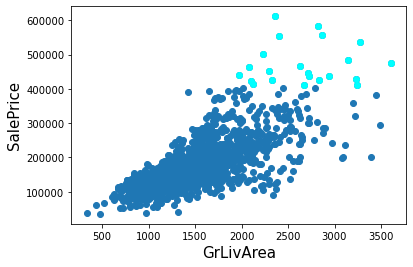

In [8]:
plt.scatter(x = df_house['GrLivArea'], y = df_house['SalePrice'])
plt.scatter(x = df_house.loc[idx_abs_lrg3,'GrLivArea'], y = df_house.loc[idx_abs_lrg3,'SalePrice'],color = 'cyan')
plt.ylabel('SalePrice',fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.show()

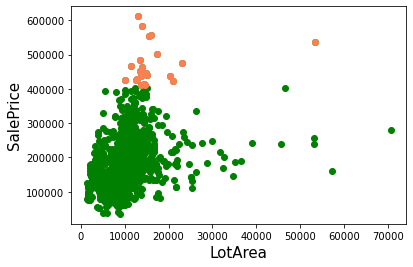

In [11]:
plt.scatter(x = df_house['LotArea'], y = df_house['SalePrice'], color='green')
plt.scatter(x = df_house.loc[idx_abs_lrg3,'LotArea'], y = df_house.loc[idx_abs_lrg3,'SalePrice'], color = 'coral')
plt.scatter(x = df_house.loc[df_house['SalePrice']>700000,'LotArea'], y = df_house.loc[df_house['SalePrice']>700000,'SalePrice'], color='magenta')
plt.scatter(x = df_house.loc[df_house['LotArea']>100000,'LotArea'], y = df_house.loc[df_house['LotArea']>100000,'SalePrice'], color='red')
plt.ylabel('SalePrice',fontsize=15)
plt.xlabel('LotArea', fontsize=15)
plt.show()

In [23]:
df_house.loc[~df_house.index.isin(idx_abs_lrg3)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Foundation_,BsmtQual_,BsmtCond_,BsmtExposure_,BsmtFinType1_,HeatingQC_,KitchenQual_,FireplaceQu_,GarageType_,GarageFinish_
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,647,4,3,953,418,5,4,0,870,422
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,634,4,3,134,220,5,3,3,870,422
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,647,4,3,114,418,5,4,3,870,422
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,146,3,4,953,220,4,4,4,387,605
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,647,4,3,221,418,5,4,3,870,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,647,4,3,953,418,5,4,0,870,422
1436,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,647,4,3,953,430,5,3,3,870,422
1437,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,634,4,3,953,220,3,3,3,870,605
1438,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,6,3,4,953,418,5,4,4,870,422


In [25]:
df_house.loc[~df_house.index.isin(idx_abs_lrg3)][40:90]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Foundation_,BsmtQual_,BsmtCond_,BsmtExposure_,BsmtFinType1_,HeatingQC_,KitchenQual_,FireplaceQu_,GarageType_,GarageFinish_
40,41,20,RL,84.000000,8658,Pave,NaN,Reg,Lvl,AllPub,...,634,3,3,953,133,5,3,3,870,422
41,42,20,RL,115.000000,16905,Pave,NaN,Reg,Lvl,AllPub,...,634,3,3,134,148,4,3,4,870,422
42,43,85,RL,70.049958,9180,Pave,NaN,IR1,Lvl,AllPub,...,634,4,3,221,220,4,4,0,870,422
43,44,20,RL,70.049958,9200,Pave,NaN,IR1,Lvl,AllPub,...,634,4,3,221,74,3,3,0,387,605
44,45,20,RL,70.000000,7945,Pave,NaN,Reg,Lvl,AllPub,...,634,3,3,953,220,5,3,0,870,422
45,46,120,RL,61.000000,7658,Pave,NaN,Reg,Lvl,AllPub,...,647,5,3,953,418,5,5,4,870,422
46,47,50,RL,48.000000,12822,Pave,NaN,IR1,Lvl,AllPub,...,647,5,3,953,418,5,4,5,870,422
47,48,20,FV,84.000000,11096,Pave,NaN,Reg,Lvl,AllPub,...,647,4,3,221,418,5,4,0,870,422
48,49,190,RM,33.000000,4456,Pave,NaN,Reg,Lvl,AllPub,...,146,3,3,953,430,4,3,0,0,0
49,50,20,RL,66.000000,7742,Pave,NaN,Reg,Lvl,AllPub,...,634,3,3,953,148,5,3,0,870,605


In [24]:
df_house.loc[df_house.index.isin(idx_abs_lrg3)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Foundation_,BsmtQual_,BsmtCond_,BsmtExposure_,BsmtFinType1_,HeatingQC_,KitchenQual_,FireplaceQu_,GarageType_,GarageFinish_
57,59,60,RL,66.000000,13682,Pave,NaN,IR2,HLS,AllPub,...,647,5,3,134,430,5,4,4,88,352
160,162,60,RL,110.000000,13688,Pave,NaN,IR1,Lvl,AllPub,...,647,5,3,221,418,5,5,4,88,352
177,179,20,RL,63.000000,17423,Pave,NaN,IR1,Lvl,AllPub,...,647,5,3,953,418,5,5,4,870,352
184,186,75,RM,90.000000,22950,Pave,NaN,IR2,Lvl,AllPub,...,146,3,3,114,430,5,5,3,387,605
276,279,20,RL,107.000000,14450,Pave,NaN,Reg,Lvl,AllPub,...,647,5,3,134,430,5,5,5,870,352
344,350,60,RL,56.000000,20431,Pave,NaN,IR2,Lvl,AllPub,...,647,5,3,953,418,5,5,5,870,352
384,390,60,RL,96.000000,12474,Pave,NaN,Reg,Lvl,AllPub,...,647,5,3,221,418,5,5,5,88,352
435,441,20,RL,105.000000,15431,Pave,NaN,Reg,Lvl,AllPub,...,647,5,3,134,418,5,5,4,870,352
468,474,20,RL,110.000000,14977,Pave,NaN,IR1,Lvl,AllPub,...,647,5,3,134,418,5,4,5,870,422
490,497,20,RL,70.049958,12692,Pave,NaN,IR1,Lvl,AllPub,...,647,4,3,953,418,5,4,4,870,422


In [26]:
len(df_house)

1440

In [13]:
df_house_wool2 = df_house.loc[~df_house.index.isin(idx_abs_lrg3)]

In [34]:
df_house_wool2.SaleCondition.value_counts()

Normal     1176
Partial     108
Abnorml      98
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [14]:
df_house_wool2['SaleCondition_'] = 0
for i in range(len(df_house_wool2)):
    if df_house_wool2.SaleCondition.iloc[i] == 'Normal':
        df_house_wool2.SaleCondition_.iloc[i] = 1176
    elif df_house_wool2.SaleCondition.iloc[i] == 'Partial':
        df_house_wool2.SaleCondition_.iloc[i] = 108
    elif df_house_wool2.SaleCondition.iloc[i] == 'Abnorml':
        df_house_wool2.SaleCondition_.iloc[i] = 98
    elif df_house_wool2.SaleCondition.iloc[i] == 'Family':
        df_house_wool2.SaleCondition_.iloc[i] = 20
    elif df_house_wool2.SaleCondition.iloc[i] == 'Alloca':
        df_house_wool2.SaleCondition_.iloc[i] = 12
    elif df_house_wool2.SaleCondition.iloc[i] == 'AdjLand':
        df_house_wool2.SaleCondition_.iloc[i] = 4

C:\Users\thsong\AppData\Local\Temp/ipykernel_14324/1122034591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_house_wool2['SaleCondition_'] = 0


In [15]:
df_house_extracted_wool2 = df_house_wool2[['MSSubClass','MSZoning_','LotFrontage','LotArea','LotShape_','LotConfig_','Neighborhood_',
          'HouseStyle_','OverallQual','OverallCond','RoofStyle_','MasVnrType_','MasVnrArea','ExterQual_','Foundation_','BsmtQual_',
          'BsmtExposure_','BsmtFinType1_','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','HeatingQC_','1stFlrSF','2ndFlrSF',
          'GrLivArea','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','KitchenQual_','TotRmsAbvGrd','Fireplaces','FireplaceQu_',
          'GarageType_','House_Age','Garage_Age','GarageFinish_','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','Exterior_Avg',
        'SaleCondition_',
          'SalePrice']]

In [16]:
df_house_extracted_wool2_ = df_house_extracted_wool2.copy(deep=True)

In [42]:
df_house_extracted_wool2_.SaleCondition_.value_counts()

1176    1176
108      108
98        98
20        20
12        12
4          4
Name: SaleCondition_, dtype: int64

In [43]:
##================================================================
col_lst = [
    'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg','SaleCondition_'
]
#--------------------------------------------------------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_extracted_wool2_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_extracted_wool2_[new_col] = scaled_data_tst
#-----------------------------------------------------
log_SalePrice = np.log1p(df_house_extracted_wool2_['SalePrice'])
df_house_extracted_wool2_['SalePrice(log)'] = log_SalePrice

In [45]:
# extract train data columns to be plugged in regression models
X = df_house_extracted_wool2_[['MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled)',
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)',
       'BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', '2ndFlrSF(scaled)', 'GrLivArea(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 'WoodDeckSF(scaled)',
       'OpenPorchSF(scaled)', 'Exterior_Avg(scaled)','SaleCondition_(scaled)']]
y = df_house_extracted_wool2_['SalePrice(log)']

In [46]:
# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
# ordinary linear regression model
line_fitter_tmp = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter_tmp = Ridge(alpha=54)
lasso_fitter_tmp = Lasso(alpha=0.001)
elasticNet_fitter_tmp = ElasticNet(alpha = 0.02, l1_ratio=0.05)
# ensemble models
xgb_fitter_tmp = XGBRegressor(n_estimators=50)
gbm_fitter_tmp = GradientBoostingRegressor(n_estimators=168)
rf_fitter_tmp = RandomForestRegressor(n_estimators=161)
lgbm_fitter_tmp = LGBMRegressor(n_estimators=121)
bg_fitter_tmp = BaggingRegressor(n_estimators=132)
et_fitter_tmp = ExtraTreesRegressor(n_estimators=133)

In [487]:
cat_fitter_tmp = CatBoostRegressor()

In [52]:
ridge_params = {'alpha':range(0,100)}
var1 = print_best_params(ridge_fitter_tmp,ridge_params)
#---------------------------------------------------
lasso_params = {'alpha':np.arange(0,0.1,0.0001)}
var2 = print_best_params(lasso_fitter_tmp,lasso_params)
#---------------------------------------------------------
eln_params = {'alpha':np.arange(0,0.1,0.01),
            'l1_ratio':np.arange(0,0.1,0.01)}
var3 = print_best_params(elasticNet_fitter_tmp,eln_params)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(30,80)}
var4 = print_best_params(xgb_fitter_tmp,candidate_params)
#----------------------------------------------------------
candidate_params = {'n_estimators' : range(160,172)}
var5 = print_best_params(gbm_fitter_tmp,candidate_params)
#---------------------------------------------------------
candidate_params = {'n_estimators' : range(130,152)}
var6 = print_best_params(rf_fitter_tmp,candidate_params)
#------------------------------------------------------
candidate_params = {'n_estimators' : range(50,140)}
var7 = print_best_params(lgbm_fitter_tmp,candidate_params)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(100,135)}
var8= print_best_params(bg_fitter_tmp,candidate_params)
#-------------------------------------------------------
candidate_params = {'n_estimators' : range(100,135)}
var9 = print_best_params(et_fitter_tmp,candidate_params)
#########################################################################################################
#########################################################################################################
#########################################################################################################

when the model Ridge is taken with grid search cv = 5 the best avg rmse value is : 0.1258, and the best parameter is : {'alpha': 56}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.403197922521027, tolerance: 0.015804775405696695
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimat

when the model Lasso is taken with grid search cv = 5 the best avg rmse value is : 0.1257, and the best parameter is : {'alpha': 0.0026000000000000003}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.403197922521027, tolerance: 0.015804775405696695
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimat

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.8957209281533505, tolerance: 0.01558556236149583
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.333309178753108, tolerance: 0.015222811503234233
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimat

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.8957209281533505, tolerance: 0.01558556236149583
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.303974176505827, tolerance: 0.01587916078150553
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.550616518502162, tolerance: 0.015804775405696695
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.474002837943328, tolerance: 0.015222811503234233
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergen

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.346987674774363, tolerance: 0.015804775405696695
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.231473739568875, tolerance: 0.015222811503234233
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.831062963840536, tolerance: 0.01558556236149583
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergen

when the model ElasticNet is taken with grid search cv = 5 the best avg rmse value is : 0.1256, and the best parameter is : {'alpha': 0.03, 'l1_ratio': 0.06}
when the model XGBRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1363, and the best parameter is : {'n_estimators': 65}
when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1229, and the best parameter is : {'n_estimators': 170}
when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1351, and the best parameter is : {'n_estimators': 143}
when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1266, and the best parameter is : {'n_estimators': 72}
when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1355, and the best parameter is : {'n_estimators': 121}
when the model ExtraTreesRegressor is taken with grid search cv = 5 the best 

In [54]:
# ordinary linear regression model
line_fitter = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter = Ridge(alpha=56)
lasso_fitter = Lasso(alpha=0.0026)
elasticNet_fitter = ElasticNet(alpha = 0.03, l1_ratio=0.06)
# ensemble models
xgb_fitter = XGBRegressor(n_estimators=65)
gbm_fitter = GradientBoostingRegressor(n_estimators=170)
rf_fitter = RandomForestRegressor(n_estimators=143)
lgbm_fitter = LGBMRegressor(n_estimators=72)
bg_fitter = BaggingRegressor(n_estimators=121)
et_fitter = ExtraTreesRegressor(n_estimators=134)

### Print RMSLE values using the user-defined function above
dict_rmse = {}
for model in [line_fitter,ridge_fitter,lasso_fitter,elasticNet_fitter,xgb_fitter,gbm_fitter,rf_fitter,lgbm_fitter,bg_fitter,et_fitter]:
    rmse_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmse[str(model)] = rmse_value
### Sort RMSLE values with ascending order
{k: v for k, v in sorted(dict_rmse.items(), key=lambda item: item[1])}

##### LinearRegression #####
RMSLE : 0.1940025709437638
##### Ridge #####
RMSLE : 0.20123788783723748
##### Lasso #####
RMSLE : 0.19868238374722866
##### ElasticNet #####
RMSLE : 0.20129417266233385
##### XGBRegressor #####
RMSLE : 0.11293245755702479
##### GradientBoostingRegressor #####
RMSLE : 0.15981921182186398
##### RandomForestRegressor #####
RMSLE : 0.234187959023878
##### LGBMRegressor #####
RMSLE : 0.17853672889109182
##### BaggingRegressor #####
RMSLE : 0.2320434148934601
##### ExtraTreesRegressor #####
RMSLE : 0.22227983427175094


{"XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,\n             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,\n             early_stopping_rounds=None, enable_categorical=False,\n             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',\n             importance_type=None, interaction_constraints='',\n             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,\n             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,\n             missing=nan, monotone_constraints='()', n_estimators=65, n_jobs=0,\n             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,\n             reg_lambda=1, ...)": 0.11293245755702479,
 'GradientBoostingRegressor(n_estimators=170)': 0.15981921182186398,
 'LGBMRegressor(n_estimators=72)': 0.17853672889109182,
 'LinearRegression()': 0.1940025709437638,
 'Lasso(alpha=0.0026)': 0.19868238374722866,
 'Ridge(alpha=56)': 0.20123788783723748,
 'ElasticNet(alpha=0.03,

In [57]:
df_house_test.SaleCondition.value_counts()

Normal     1204
Partial     120
Abnorml      89
Family       26
Alloca       12
AdjLand       8
Name: SaleCondition, dtype: int64

In [18]:
df_house_test['SaleCondition_'] = 0
for i in range(len(df_house_test)):
    if df_house_test.SaleCondition.iloc[i] == 'Normal':
        df_house_test.SaleCondition_.iloc[i] = 1204
    elif df_house_test.SaleCondition.iloc[i] == 'Partial':
        df_house_test.SaleCondition_.iloc[i] = 120
    elif df_house_test.SaleCondition.iloc[i] == 'Abnorml':
        df_house_test.SaleCondition_.iloc[i] = 89
    elif df_house_test.SaleCondition.iloc[i] == 'Family':
        df_house_test.SaleCondition_.iloc[i] = 26
    elif df_house_test.SaleCondition.iloc[i] == 'Alloca':
        df_house_test.SaleCondition_.iloc[i] = 12
    elif df_house_test.SaleCondition.iloc[i] == 'AdjLand':
        df_house_test.SaleCondition_.iloc[i] = 8

In [66]:
len(df_house_test_extracted)

1459

In [62]:
df_house_test_extracted_ = pd.concat([df_house_test_extracted,df_house_test[['SaleCondition_']]],axis=1)
#--------------------------------------------------------------------------
col_lst = [
        'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg','SaleCondition_'
] 
#--------------------------------------------------------------
#------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_test_extracted_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_test_extracted_[new_col] = scaled_data_tst
###====================================================================
###================================================
###================================================
df_house_test_extracted2b_predicted = df_house_test_extracted_[[
        'MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled)',
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)',
       'BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', '2ndFlrSF(scaled)', 'GrLivArea(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 'WoodDeckSF(scaled)',
       'OpenPorchSF(scaled)', 'Exterior_Avg(scaled)','SaleCondition_(scaled)' 
]]

In [63]:
result_from_model = xgb_fitter.predict(df_house_test_extracted2b_predicted)
df_house_test['SalePrice'] = 0
df_house_test['SalePrice'] = np.expm1(result_from_model)
df_house_test[['Id','SalePrice']].to_csv('C:/Users/thsong/submission11_1.csv',index=False)
df_house_test[['Id','SalePrice']]

,Id,SalePrice
0,1461,120167.992188
1,1462,171185.265625
2,1463,188794.625000
3,1464,196589.296875
4,1465,178377.734375
...,...,...
1454,2915,77981.320312
1455,2916,89260.226562
1456,2917,152962.250000
1457,2918,129617.437500


In [64]:
result_from_model = gbm_fitter.predict(df_house_test_extracted2b_predicted)
df_house_test['SalePrice'] = 0
df_house_test['SalePrice'] = np.expm1(result_from_model)
df_house_test[['Id','SalePrice']].to_csv('C:/Users/thsong/submission11_1_2.csv',index=False)
df_house_test[['Id','SalePrice']]

,Id,SalePrice
0,1461,124439.219210
1,1462,162302.894719
2,1463,178079.638930
3,1464,186546.117953
4,1465,186781.009101
...,...,...
1454,2915,77406.185726
1455,2916,82752.008584
1456,2917,159484.270858
1457,2918,117694.244762


### Skewness condition shift from 1 to 0.5

In [13]:
skew_features = df_house_extracted_wool.apply(lambda x : skew(x))

In [15]:
skew_features[:50]

MSSubClass               1.399773
MSZoning_               -1.450774
LotFrontage              1.686592
LotArea                  3.936437
LotShape_               -1.014938
LotConfig_              -1.049605
Neighborhood_            0.867445
HouseStyle_             -0.755760
OverallQual              0.162783
OverallCond              0.679377
RoofStyle_              -1.424287
MasVnrType_              0.756337
MasVnrArea               2.296671
ExterQual_               0.826978
Foundation_             -2.342944
BsmtQual_               -1.302981
BsmtExposure_           -0.691161
BsmtFinType1_           -0.592787
BsmtFinSF1               0.742969
BsmtUnfSF                0.925963
TotalBsmtSF              0.492308
HeatingQC_              -0.536100
1stFlrSF                 0.884002
2ndFlrSF                 0.769433
GrLivArea                0.817159
BsmtFullBath             0.566931
FullBath                 0.022977
HalfBath                 0.698042
BedroomAbvGr             0.234483
KitchenQual_  

In [16]:
skew_features[50:]

HouseStyle_(scaled)     -0.755760
OverallQual(scaled)      0.162783
OverallCond(scaled)      0.679377
RoofStyle_(scaled)      -1.424287
MasVnrType_(scaled)      0.756337
MasVnrArea(scaled)       2.296671
ExterQual_(scaled)       0.826978
Foundation_(scaled)     -2.342944
BsmtQual_(scaled)       -1.302981
BsmtExposure_(scaled)   -0.691161
BsmtFinType1_(scaled)   -0.592787
BsmtFinSF1(scaled)       0.742969
BsmtUnfSF(scaled)        0.925963
TotalBsmtSF(scaled)      0.492308
HeatingQC_(scaled)      -0.536100
1stFlrSF(scaled)         0.884002
2ndFlrSF(scaled)         0.769433
GrLivArea(scaled)        0.817159
BsmtFullBath(scaled)     0.566931
FullBath(scaled)         0.022977
HalfBath(scaled)         0.698042
BedroomAbvGr(scaled)     0.234483
KitchenQual_(scaled)     0.382175
TotRmsAbvGrd(scaled)     0.663624
Fireplaces(scaled)       0.641668
FireplaceQu_(scaled)     0.132525
GarageType_(scaled)     -0.757688
House_Age(scaled)        0.499229
Garage_Age(scaled)       0.691001
GarageFinish_(

#### 0.75 < skewness

In [ ]:
### List of columns to be examined
'MSSubClass'
'LotFrontage'
'LotArea'
'MasVnrArea'
'BsmtUnfSF'
'1stFlrSF'
'2ndFlrSF'
'GrLivArea'
'WoodDeckSF'          
'OpenPorchSF'

In [77]:
df_house.SaleCondition_.value_counts()

1184    1184
122      122
98        98
20        20
12        12
4          4
Name: SaleCondition_, dtype: int64

In [19]:
MSSubClass_tmp = (df_house['MSSubClass'] - df_house['MSSubClass'].mean())/df_house['MSSubClass'].std()
LotFrontage_tmp = (df_house['LotFrontage'] - df_house['LotFrontage'].mean())/df_house['LotFrontage'].std()
LotArea_tmp = (df_house['LotArea'] - df_house['LotArea'].mean())/df_house['LotArea'].std()
MasVnrArea_tmp = (df_house['MasVnrArea'] - df_house['MasVnrArea'].mean())/df_house['MasVnrArea'].std()
BsmtUnfSF_tmp = (df_house['BsmtUnfSF'] - df_house['BsmtUnfSF'].mean())/df_house['BsmtUnfSF'].std()
lstFlrSF_tmp = (df_house['1stFlrSF'] - df_house['1stFlrSF'].mean())/df_house['1stFlrSF'].std()
SndFlrSF_tmp = (df_house['2ndFlrSF'] - df_house['2ndFlrSF'].mean())/df_house['2ndFlrSF'].std()
GrLivArea_tmp = (df_house['GrLivArea'] - df_house['GrLivArea'].mean())/df_house['GrLivArea'].std()
WoodDeckSF_tmp = (df_house['WoodDeckSF'] - df_house['WoodDeckSF'].mean())/df_house['WoodDeckSF'].std()
OpenPorchSF_tmp = (df_house['OpenPorchSF'] - df_house['OpenPorchSF'].mean())/df_house['OpenPorchSF'].std()

In [20]:
mssubclass_abs_larg3 = MSSubClass_tmp[MSSubClass_tmp>3]
lotfrontage_abs_larg3 = LotFrontage_tmp[LotFrontage_tmp>3]
lotarea_abs_larg3 = LotArea_tmp[LotArea_tmp>3]
masvnrarea_abs_larg3 = MasVnrArea_tmp[MasVnrArea_tmp>3]
bsmtunfsf_abs_larg3 = BsmtUnfSF_tmp[BsmtUnfSF_tmp>3]
lstflrsf_abs_larg3 = lstFlrSF_tmp[lstFlrSF_tmp>3]
Sndflrsf_abs_larg3 = SndFlrSF_tmp[SndFlrSF_tmp>3]
grlivarea_abs_larg3 = GrLivArea_tmp[GrLivArea_tmp>3]
woodeck_abs_larg3 = WoodDeckSF_tmp[WoodDeckSF_tmp>3]
openporchsf_abs_larg3 = OpenPorchSF_tmp[OpenPorchSF_tmp>3]

In [21]:
len(mssubclass_abs_larg3) + len(lotfrontage_abs_larg3) + len(lotarea_abs_larg3) + len(masvnrarea_abs_larg3) \
+ len(bsmtunfsf_abs_larg3) + len(lstflrsf_abs_larg3) + len(Sndflrsf_abs_larg3) + len(grlivarea_abs_larg3) \
+ len(woodeck_abs_larg3) + len(openporchsf_abs_larg3)

184

In [124]:
len(openporchsf_abs_larg3)

35

In [23]:
idx_mssubclass_abs_larg3 = mssubclass_abs_larg3.index
idx_lotfrontage_abs_larg3 = lotfrontage_abs_larg3.index
idx_lotarea_abs_larg3 = lotarea_abs_larg3.index
idx_masvnrarea_abs_larg3 = masvnrarea_abs_larg3.index
idx_bsmtunfsf_abs_larg3 = bsmtunfsf_abs_larg3.index
idx_1stflrsf_abs_larg3 = lstflrsf_abs_larg3.index
idx_2ndflrsf_abs_larg3 = Sndflrsf_abs_larg3.index
idx_grlivarea_abs_larg3 = grlivarea_abs_larg3.index
idx_woodeck_abs_larg3 = woodeck_abs_larg3.index
idx_openporchsf_abs_larg3 = openporchsf_abs_larg3.index

In [114]:
idx_1stflrsf_abs_larg3

Int64Index([112, 223, 435, 490, 522, 886, 1012, 1032, 1354], dtype='int64')

In [103]:
idx_1stflrsf_abs_larg3.shape

(9,)

In [104]:
idx_1stflrsf_abs_larg3.iloc[0]

3.0028265735500828

In [109]:
idx_1stflrsf_abs_larg3.index

Int64Index([112, 223, 435, 490, 522, 886, 1012, 1032, 1354], dtype='int64')

In [105]:
len(idx_1stflrsf_abs_larg3)

9

In [122]:
idx_openporchsf_abs_larg3

Int64Index([  28,   86,  175,  182,  184,  237,  291,  379,  493,  583,  613,
             633,  637,  656,  658,  703,  725,  765,  774,  797,  849,  902,
             935,  949,  984, 1093, 1169, 1178, 1188, 1211, 1227, 1276, 1299,
            1350, 1404],
           dtype='int64')

In [24]:
idx_bag = []
for idx_outlier in [idx_mssubclass_abs_larg3,idx_lotfrontage_abs_larg3,idx_lotarea_abs_larg3,idx_masvnrarea_abs_larg3, idx_bsmtunfsf_abs_larg3,idx_1stflrsf_abs_larg3,idx_2ndflrsf_abs_larg3,idx_grlivarea_abs_larg3, idx_woodeck_abs_larg3,idx_openporchsf_abs_larg3]:
    for j in range(len(idx_outlier)):
        idx_bag.append(idx_outlier[j])

In [116]:
idx_bag

[9,
 48,
 92,
 124,
 164,
 245,
 289,
 297,
 309,
 406,
 483,
 514,
 528,
 627,
 629,
 694,
 696,
 703,
 850,
 957,
 973,
 1018,
 1050,
 1131,
 1171,
 1175,
 1250,
 1374,
 1397,
 158,
 170,
 196,
 230,
 275,
 441,
 797,
 897,
 922,
 1094,
 1114,
 1138,
 1159,
 1195,
 1318,
 170,
 269,
 379,
 406,
 446,
 452,
 522,
 653,
 683,
 759,
 818,
 838,
 922,
 1045,
 1169,
 1175,
 1271,
 1377,
 1427,
 25,
 37,
 57,
 69,
 104,
 114,
 160,
 168,
 177,
 223,
 338,
 344,
 398,
 472,
 511,
 646,
 691,
 708,
 745,
 753,
 788,
 798,
 815,
 886,
 969,
 1098,
 1212,
 1252,
 1271,
 1273,
 1354,
 1398,
 136,
 223,
 276,
 472,
 490,
 574,
 670,
 764,
 788,
 920,
 1251,
 112,
 223,
 435,
 490,
 522,
 886,
 1012,
 1032,
 1354,
 301,
 117,
 184,
 196,
 301,
 320,
 490,
 600,
 627,
 759,
 788,
 1019,
 1159,
 1252,
 1334,
 63,
 165,
 168,
 299,
 338,
 352,
 475,
 531,
 653,
 759,
 818,
 838,
 881,
 949,
 962,
 1032,
 1128,
 1295,
 1404,
 28,
 86,
 175,
 182,
 184,
 237,
 291,
 379,
 493,
 583,
 613,
 633,
 637,


In [120]:
len(idx_bag)

184

In [25]:
idx_outlier_total_set = set(idx_bag)

In [26]:
idx_outlier_total_lst = list(sorted(idx_outlier_total_set))

In [119]:
len(idx_outlier_total_lst)

149

In [121]:
idx_outlier_total_lst

[9,
 25,
 28,
 37,
 48,
 57,
 63,
 69,
 86,
 92,
 104,
 112,
 114,
 117,
 124,
 136,
 158,
 160,
 164,
 165,
 168,
 170,
 175,
 177,
 182,
 184,
 196,
 223,
 230,
 237,
 245,
 269,
 275,
 276,
 289,
 291,
 297,
 299,
 301,
 309,
 320,
 338,
 344,
 352,
 379,
 398,
 406,
 435,
 441,
 446,
 452,
 472,
 475,
 483,
 490,
 493,
 511,
 514,
 522,
 528,
 531,
 574,
 583,
 600,
 613,
 627,
 629,
 633,
 637,
 646,
 653,
 656,
 658,
 670,
 683,
 691,
 694,
 696,
 703,
 708,
 725,
 745,
 753,
 759,
 764,
 765,
 774,
 788,
 797,
 798,
 815,
 818,
 838,
 849,
 850,
 881,
 886,
 897,
 902,
 920,
 922,
 935,
 949,
 957,
 962,
 969,
 973,
 984,
 1012,
 1018,
 1019,
 1032,
 1045,
 1050,
 1093,
 1094,
 1098,
 1114,
 1128,
 1131,
 1138,
 1159,
 1169,
 1171,
 1175,
 1178,
 1188,
 1195,
 1211,
 1212,
 1227,
 1250,
 1251,
 1252,
 1271,
 1273,
 1276,
 1295,
 1299,
 1318,
 1334,
 1350,
 1354,
 1374,
 1377,
 1397,
 1398,
 1404,
 1427]

In [27]:
df_house3 = df_house.loc[~df_house.index.isin(idx_outlier_total_lst)]

In [127]:
len(df_house), len(df_house3)

(1440, 1291)

In [129]:
1291 + 149

1440

In [132]:
df_house3.SaleCondition_.value_counts()

1184    1069
122      101
98        90
20        18
12         9
4          4
Name: SaleCondition_, dtype: int64

In [133]:
df_house_extracted3 = df_house3[['MSSubClass','MSZoning_','LotFrontage','LotArea','LotShape_','LotConfig_','Neighborhood_',
          'HouseStyle_','OverallQual','OverallCond','RoofStyle_','MasVnrType_','MasVnrArea','ExterQual_','Foundation_','BsmtQual_',
          'BsmtExposure_','BsmtFinType1_','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','HeatingQC_','1stFlrSF','2ndFlrSF',
          'GrLivArea','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','KitchenQual_','TotRmsAbvGrd','Fireplaces','FireplaceQu_',
          'GarageType_','House_Age','Garage_Age','GarageFinish_','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','Exterior_Avg',
        'SaleCondition_',
          'SalePrice']]

In [134]:
##================================================================
col_lst = [
    'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg','SaleCondition_'
]
#--------------------------------------------------------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_extracted3[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_extracted3[new_col] = scaled_data_tst
#-----------------------------------------------------
log_SalePrice = np.log1p(df_house_extracted3['SalePrice'])
df_house_extracted3['SalePrice(log)'] = log_SalePrice
##=================================================================================
##=================================================================================
# extract train data columns to be plugged in regression models
X = df_house_extracted3[['MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled)',
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)',
       'BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', '2ndFlrSF(scaled)', 'GrLivArea(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 'WoodDeckSF(scaled)',
       'OpenPorchSF(scaled)', 'Exterior_Avg(scaled)','SaleCondition_(scaled)']]
y = df_house_extracted3['SalePrice(log)']

C:\Users\thsong\AppData\Local\Temp/ipykernel_3616/2809838862.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_house_extracted3[new_col] = scaled_data_tst
C:\Users\thsong\AppData\Local\Temp/ipykernel_3616/2809838862.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_house_extracted3[new_col] = scaled_data_tst
C:\Users\thsong\AppData\Local\Temp/ipykernel_3616/2809838862.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [135]:
# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [136]:
ridge_params = {'alpha':range(0,100)}
var1 = print_best_params(ridge_fitter_tmp,ridge_params)
#---------------------------------------------------
lasso_params = {'alpha':np.arange(0,0.1,0.0001)}
var2 = print_best_params(lasso_fitter_tmp,lasso_params)
#---------------------------------------------------------
eln_params = {'alpha':np.arange(0,0.1,0.01),
            'l1_ratio':np.arange(0,0.1,0.01)}
var3 = print_best_params(elasticNet_fitter_tmp,eln_params)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(30,80)}
var4 = print_best_params(xgb_fitter_tmp,candidate_params)
#----------------------------------------------------------
candidate_params = {'n_estimators' : range(160,172)}
var5 = print_best_params(gbm_fitter_tmp,candidate_params)
#---------------------------------------------------------
candidate_params = {'n_estimators' : range(130,152)}
var6 = print_best_params(rf_fitter_tmp,candidate_params)
#------------------------------------------------------
candidate_params = {'n_estimators' : range(50,140)}
var7 = print_best_params(lgbm_fitter_tmp,candidate_params)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(100,135)}
var8= print_best_params(bg_fitter_tmp,candidate_params)
#-------------------------------------------------------
candidate_params = {'n_estimators' : range(100,135)}
var9 = print_best_params(et_fitter_tmp,candidate_params)
#########################################################################################################
#########################################################################################################
#########################################################################################################

when the model Ridge is taken with grid search cv = 5 the best avg rmse value is : 0.1254, and the best parameter is : {'alpha': 68}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.567764989528083, tolerance: 0.014212281810003871
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimat

when the model Lasso is taken with grid search cv = 5 the best avg rmse value is : 0.1251, and the best parameter is : {'alpha': 0.0023}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.567764989528083, tolerance: 0.014212281810003871
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimat

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.415028691237326, tolerance: 0.01391815267462861
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap:

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.329762051972938, tolerance: 0.014359914694732778
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.567764989528083, tolerance: 0.014212281810003871
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimat

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.567764989528083, tolerance: 0.014212281810003871
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.186184690046353, tolerance: 0.014212281810003871
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.047283698643337, tolerance: 0.013242173320533814
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.636825696721881, tolerance: 0.014181400576730438
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converge

when the model ElasticNet is taken with grid search cv = 5 the best avg rmse value is : 0.1249, and the best parameter is : {'alpha': 0.04, 'l1_ratio': 0.04}
when the model XGBRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1319, and the best parameter is : {'n_estimators': 58}
when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1193, and the best parameter is : {'n_estimators': 166}
when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1338, and the best parameter is : {'n_estimators': 137}
when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1278, and the best parameter is : {'n_estimators': 59}
when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1328, and the best parameter is : {'n_estimators': 106}
when the model ExtraTreesRegressor is taken with grid search cv = 5 the best 

In [137]:
# ordinary linear regression model
line_fitter = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter = Ridge(alpha=68)
lasso_fitter = Lasso(alpha=0.0023)
elasticNet_fitter = ElasticNet(alpha = 0.04, l1_ratio=0.04)
# ensemble models
xgb_fitter = XGBRegressor(n_estimators=58)
gbm_fitter = GradientBoostingRegressor(n_estimators=166)
rf_fitter = RandomForestRegressor(n_estimators=137)
lgbm_fitter = LGBMRegressor(n_estimators=59)
bg_fitter = BaggingRegressor(n_estimators=106)
et_fitter = ExtraTreesRegressor(n_estimators=131)

### Print RMSLE values using the user-defined function above
dict_rmse = {}
for model in [line_fitter,ridge_fitter,lasso_fitter,elasticNet_fitter,xgb_fitter,gbm_fitter,rf_fitter,lgbm_fitter,bg_fitter,et_fitter]:
    rmse_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmse[str(model)] = rmse_value
### Sort RMSLE values with ascending order
{k: v for k, v in sorted(dict_rmse.items(), key=lambda item: item[1])}

##### LinearRegression #####
RMSLE : 0.05347329123318503
##### Ridge #####
RMSLE : 0.058445091016871
##### Lasso #####
RMSLE : 0.05087337148096994
##### ElasticNet #####
RMSLE : 0.054778469098232446
##### XGBRegressor #####
RMSLE : 0.07531784645093487
##### GradientBoostingRegressor #####
RMSLE : 0.06808432549261698
##### RandomForestRegressor #####
RMSLE : 0.13008774726179012
##### LGBMRegressor #####
RMSLE : 0.15379085617516403
##### BaggingRegressor #####
RMSLE : 0.12620407016180157
##### ExtraTreesRegressor #####
RMSLE : 0.10783710148962002


{'Lasso(alpha=0.0023)': 0.05087337148096994,
 'LinearRegression()': 0.05347329123318503,
 'ElasticNet(alpha=0.04, l1_ratio=0.04)': 0.054778469098232446,
 'Ridge(alpha=68)': 0.058445091016871,
 'GradientBoostingRegressor(n_estimators=166)': 0.06808432549261698,
 "XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,\n             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,\n             early_stopping_rounds=None, enable_categorical=False,\n             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',\n             importance_type=None, interaction_constraints='',\n             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,\n             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,\n             missing=nan, monotone_constraints='()', n_estimators=58, n_jobs=0,\n             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,\n             reg_lambda=1, ...)": 0.07531784645093487,
 'ExtraTreesRegre

In [138]:
df_house_test_extracted_ = pd.concat([df_house_test_extracted,df_house_test[['SaleCondition_']]],axis=1)
#--------------------------------------------------------------------------
col_lst = [
        'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg','SaleCondition_'
] 
#--------------------------------------------------------------
#------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_test_extracted_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_test_extracted_[new_col] = scaled_data_tst
###====================================================================
###================================================
###================================================
df_house_test_extracted2b_predicted = df_house_test_extracted_[[
        'MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled)',
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)',
       'BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', '2ndFlrSF(scaled)', 'GrLivArea(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 'WoodDeckSF(scaled)',
       'OpenPorchSF(scaled)', 'Exterior_Avg(scaled)','SaleCondition_(scaled)' 
]]

In [139]:
result_from_model = lasso_fitter.predict(df_house_test_extracted2b_predicted)
df_house_test['SalePrice'] = 0
df_house_test['SalePrice'] = np.expm1(result_from_model)
df_house_test[['Id','SalePrice']].to_csv('C:/Users/thsong/submission11_2.csv',index=False)
df_house_test[['Id','SalePrice']]

,Id,SalePrice
0,1461,113447.914410
1,1462,154529.698776
2,1463,169976.927822
3,1464,188845.173082
4,1465,182910.665006
...,...,...
1454,2915,91888.343732
1455,2916,91100.680062
1456,2917,176079.067626
1457,2918,108018.283821


In [140]:
result_from_model = elasticNet_fitter.predict(df_house_test_extracted2b_predicted)
df_house_test['SalePrice'] = 0
df_house_test['SalePrice'] = np.expm1(result_from_model)
df_house_test[['Id','SalePrice']].to_csv('C:/Users/thsong/submission11_2_2.csv',index=False)
df_house_test[['Id','SalePrice']]

,Id,SalePrice
0,1461,113740.148566
1,1462,153995.573932
2,1463,171676.192658
3,1464,190011.912766
4,1465,181413.560894
...,...,...
1454,2915,92454.024796
1455,2916,91466.791850
1456,2917,175990.431952
1457,2918,107730.503588


In [141]:
result_from_model = ridge_fitter.predict(df_house_test_extracted2b_predicted)
df_house_test['SalePrice'] = 0
df_house_test['SalePrice'] = np.expm1(result_from_model)
df_house_test[['Id','SalePrice']].to_csv('C:/Users/thsong/submission11_2_3.csv',index=False)
df_house_test[['Id','SalePrice']]

,Id,SalePrice
0,1461,114505.660345
1,1462,153711.897435
2,1463,173685.510142
3,1464,190913.293720
4,1465,180019.089739
...,...,...
1454,2915,92263.713176
1455,2916,90790.595577
1456,2917,175102.192971
1457,2918,106663.572375


In [142]:
result_from_model = gbm_fitter.predict(df_house_test_extracted2b_predicted)
df_house_test['SalePrice'] = 0
df_house_test['SalePrice'] = np.expm1(result_from_model)
df_house_test[['Id','SalePrice']].to_csv('C:/Users/thsong/submission11_2_4.csv',index=False)
df_house_test[['Id','SalePrice']]

,Id,SalePrice
0,1461,130663.068247
1,1462,154914.295332
2,1463,168937.465584
3,1464,176681.559023
4,1465,182453.250304
...,...,...
1454,2915,81214.728633
1455,2916,80214.523835
1456,2917,133064.553065
1457,2918,108821.178440


##### absolute value reselected

In [28]:
MSSubClass_tmp[MSSubClass_tmp>3]

9       3.147899
48      3.147899
92      3.147899
124     3.147899
164     3.147899
245     3.147899
289     3.147899
297     3.147899
309     3.147899
406     3.147899
483     3.147899
514     3.147899
528     3.147899
627     3.147899
629     3.147899
694     3.147899
696     3.147899
703     3.147899
850     3.147899
957     3.147899
973     3.147899
1018    3.147899
1050    3.147899
1131    3.147899
1171    3.147899
1175    3.147899
1250    3.147899
1374    3.147899
1397    3.147899
Name: MSSubClass, dtype: float64

In [144]:
LotFrontage_tmp[LotFrontage_tmp>3]

158      3.092084
170      3.428408
196      5.013935
230      5.013935
275      3.380362
441      3.236223
797      3.572547
897      3.812778
922     11.692366
1094     4.725657
1114     5.398305
1138     3.092084
1159     3.284270
1195     3.956917
1318     4.004963
Name: LotFrontage, dtype: float64

In [145]:
LotArea_tmp[LotArea_tmp>3]

170      4.131738
269      5.522212
379      8.177079
406      4.677765
446     11.524150
452      8.199830
522      4.301992
653      6.941313
683      3.071535
759      8.252348
818      3.549309
838      6.753806
922      3.350616
1045     3.788386
1169     4.769339
1175     4.263126
1271     5.028512
1377     8.953082
1427     3.064710
Name: LotArea, dtype: float64

In [146]:
MasVnrArea_tmp[MasVnrArea_tmp>3]

25      3.184447
37      3.243407
57      5.489799
69      5.985066
104     3.939140
114     6.067611
160     3.325952
168     3.261096
177     3.821219
223     4.847130
338     3.042942
344     4.540536
398     3.243407
472     3.962724
511     4.841234
646     3.302368
691     3.125487
708     3.249304
745     4.682041
753     3.379016
788     4.481576
798     5.584135
815     4.222150
886     3.891972
969     5.159620
1098    3.302368
1212    3.927348
1252    3.137279
1271    3.072422
1273    4.057061
1354    3.567690
1398    3.720987
Name: MasVnrArea, dtype: float64

In [147]:
BsmtUnfSF_tmp[BsmtUnfSF_tmp>3]

136     3.030924
223     4.001344
276     3.515003
472     3.587389
490     3.171171
574     3.336301
670     3.345349
764     3.094262
788     3.073903
920     3.026400
1251    3.245819
Name: BsmtUnfSF, dtype: float64

In [148]:
lstFlrSF_tmp[lstFlrSF_tmp>3]

112     3.002827
223     3.364164
435     3.391332
490     5.635424
522     3.698332
886     3.288093
1012    4.738874
1032    3.722784
1354    4.018917
Name: 1stFlrSF, dtype: float64

In [149]:
SndFlrSF_tmp[SndFlrSF_tmp>3]

301    3.456627
Name: 2ndFlrSF, dtype: float64

In [150]:
GrLivArea_tmp[GrLivArea_tmp>3]

117     3.513595
184     4.300992
196     3.289207
301     4.066405
320     3.015862
490     3.525834
600     3.456478
627     3.866496
759     3.629868
788     3.346324
1019    3.228010
1159    3.236170
1252    3.972570
1334    3.546233
Name: GrLivArea, dtype: float64

In [151]:
WoodDeckSF_tmp[WoodDeckSF_tmp>3]

63      4.089776
165     3.246240
168     4.072905
299     3.178758
338     3.406512
352     3.752362
475     3.608961
531     3.161887
653     3.592090
759     3.473995
818     3.330594
838     3.330594
881     3.541478
949     3.870457
962     3.524607
1032    3.229370
1128    3.010050
1295    3.448689
1404    4.174129
Name: WoodDeckSF, dtype: float64

In [152]:
OpenPorchSF_tmp[OpenPorchSF_tmp>3]

28      3.523602
86      3.127070
175     3.027938
182     3.193159
184     3.556647
237     3.027938
291     3.391425
379     3.077504
493     3.969700
583     3.787957
613     3.275770
633     3.143593
637     4.415799
656     3.672302
658     3.639257
703     4.019267
725     4.894941
765     3.341859
774     4.068833
797     4.415799
849     3.226203
902     3.127070
935     3.424469
949     3.920134
984     4.531454
1093    3.292292
1169    3.606213
1178    4.283621
1188    3.127070
1211    3.226203
1227    3.044460
1276    4.002745
1299    3.242726
1350    3.589691
1404    3.160115
Name: OpenPorchSF, dtype: float64

In [30]:
# mssubclass_abs_larg3 = MSSubClass_tmp[MSSubClass_tmp>3]
lotfrontage_abs_larg11 = LotFrontage_tmp[LotFrontage_tmp>11]
lotarea_abs_larg8 = LotArea_tmp[LotArea_tmp>8]
masvnrarea_abs_larg6 = MasVnrArea_tmp[MasVnrArea_tmp>6]
#bsmtunfsf_abs_larg3 = BsmtUnfSF_tmp[BsmtUnfSF_tmp>3]
lstflrsf_abs_larg5 = lstFlrSF_tmp[lstFlrSF_tmp>5]
# Sndflrsf_abs_larg3 = SndFlrSF_tmp[SndFlrSF_tmp>3]
#grlivarea_abs_larg3 = GrLivArea_tmp[GrLivArea_tmp>3]
#woodeck_abs_larg3 = WoodDeckSF_tmp[WoodDeckSF_tmp>3]
#openporchsf_abs_larg3 = OpenPorchSF_tmp[OpenPorchSF_tmp>3]

In [31]:
idx_lotfrontage_abs_larg11 = lotfrontage_abs_larg11.index
idx_lotarea_abs_larg8 = lotarea_abs_larg8.index
idx_masvnrarea_abs_larg6 = masvnrarea_abs_larg6.index
idx_1stflrsf_abs_larg5 = lstflrsf_abs_larg5.index

In [32]:
idx_bag2 = []
for idx_outlier in [idx_lotfrontage_abs_larg11,idx_lotarea_abs_larg8,idx_masvnrarea_abs_larg6,idx_1stflrsf_abs_larg5]:
    for j in range(len(idx_outlier)):
        idx_bag2.append(idx_outlier[j])

In [33]:
idx_outlier_total_set2 = set(idx_bag2)
idx_outlier_total_lst2 = list(sorted(idx_outlier_total_set2))

In [158]:
len(idx_outlier_total_lst2)

8

In [463]:
len(df_house4), len(df_house5)

(1432, 1429)

In [35]:
df_house4 = df_house.loc[~df_house.index.isin(idx_outlier_total_lst2)]

In [160]:
df_house_extracted4 = df_house4[['MSSubClass','MSZoning_','LotFrontage','LotArea','LotShape_','LotConfig_','Neighborhood_',
          'HouseStyle_','OverallQual','OverallCond','RoofStyle_','MasVnrType_','MasVnrArea','ExterQual_','Foundation_','BsmtQual_',
          'BsmtExposure_','BsmtFinType1_','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','HeatingQC_','1stFlrSF','2ndFlrSF',
          'GrLivArea','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','KitchenQual_','TotRmsAbvGrd','Fireplaces','FireplaceQu_',
          'GarageType_','House_Age','Garage_Age','GarageFinish_','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','Exterior_Avg',
        'SaleCondition_',
          'SalePrice']]

##================================================================
col_lst = [
    'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg','SaleCondition_'
]
#--------------------------------------------------------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_extracted4[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_extracted4[new_col] = scaled_data_tst
#-----------------------------------------------------
log_SalePrice = np.log1p(df_house_extracted4['SalePrice'])
df_house_extracted4['SalePrice(log)'] = log_SalePrice
##=================================================================================
##=================================================================================
# extract train data columns to be plugged in regression models
X = df_house_extracted4[['MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled)',
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)',
       'BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', '2ndFlrSF(scaled)', 'GrLivArea(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 'WoodDeckSF(scaled)',
       'OpenPorchSF(scaled)', 'Exterior_Avg(scaled)','SaleCondition_(scaled)']]
y = df_house_extracted4['SalePrice(log)']

# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

C:\Users\thsong\AppData\Local\Temp/ipykernel_3616/3250381524.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_house_extracted4[new_col] = scaled_data_tst
C:\Users\thsong\AppData\Local\Temp/ipykernel_3616/3250381524.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_house_extracted4[new_col] = scaled_data_tst
C:\Users\thsong\AppData\Local\Temp/ipykernel_3616/3250381524.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [161]:
ridge_params = {'alpha':range(0,100)}
var1 = print_best_params(ridge_fitter_tmp,ridge_params)
#---------------------------------------------------
lasso_params = {'alpha':np.arange(0,0.1,0.0001)}
var2 = print_best_params(lasso_fitter_tmp,lasso_params)
#---------------------------------------------------------
eln_params = {'alpha':np.arange(0,0.1,0.01),
            'l1_ratio':np.arange(0,0.1,0.01)}
var3 = print_best_params(elasticNet_fitter_tmp,eln_params)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(30,80)}
var4 = print_best_params(xgb_fitter_tmp,candidate_params)
#----------------------------------------------------------
candidate_params = {'n_estimators' : range(160,172)}
var5 = print_best_params(gbm_fitter_tmp,candidate_params)
#---------------------------------------------------------
candidate_params = {'n_estimators' : range(130,152)}
var6 = print_best_params(rf_fitter_tmp,candidate_params)
#------------------------------------------------------
candidate_params = {'n_estimators' : range(50,140)}
var7 = print_best_params(lgbm_fitter_tmp,candidate_params)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(100,135)}
var8= print_best_params(bg_fitter_tmp,candidate_params)
#-------------------------------------------------------
candidate_params = {'n_estimators' : range(100,135)}
var9 = print_best_params(et_fitter_tmp,candidate_params)
#########################################################################################################
#########################################################################################################
#########################################################################################################

when the model Ridge is taken with grid search cv = 5 the best avg rmse value is : 0.1263, and the best parameter is : {'alpha': 58}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.574854604101686, tolerance: 0.017464732417555525
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimat

when the model Lasso is taken with grid search cv = 5 the best avg rmse value is : 0.1262, and the best parameter is : {'alpha': 0.0027}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.574854604101686, tolerance: 0.017464732417555525
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimat

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.438282728565298, tolerance: 0.01770984203313
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.99575583105589, tolerance: 0.017268925615010585
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.99575583105589, tolerance: 0.017268925615010585
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap:

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.438282728565298, tolerance: 0.01770984203313
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.730140099502057, tolerance: 0.017464732417555525
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to incre

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.567497946529452, tolerance: 0.017464732417555525
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.452210875360587, tolerance: 0.016885823027928036
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.987159171839052, tolerance: 0.017268925615010585
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converge

when the model ElasticNet is taken with grid search cv = 5 the best avg rmse value is : 0.1261, and the best parameter is : {'alpha': 0.03, 'l1_ratio': 0.06}
when the model XGBRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1368, and the best parameter is : {'n_estimators': 78}
when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1217, and the best parameter is : {'n_estimators': 164}
when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1357, and the best parameter is : {'n_estimators': 149}
when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1263, and the best parameter is : {'n_estimators': 78}
when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1357, and the best parameter is : {'n_estimators': 125}
when the model ExtraTreesRegressor is taken with grid search cv = 5 the best 

In [162]:
# ordinary linear regression model
line_fitter = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter = Ridge(alpha=58)
lasso_fitter = Lasso(alpha=0.0027)
elasticNet_fitter = ElasticNet(alpha = 0.03, l1_ratio=0.06)
# ensemble models
xgb_fitter = XGBRegressor(n_estimators=78)
gbm_fitter = GradientBoostingRegressor(n_estimators=164)
rf_fitter = RandomForestRegressor(n_estimators=149)
lgbm_fitter = LGBMRegressor(n_estimators=78)
bg_fitter = BaggingRegressor(n_estimators=125)
et_fitter = ExtraTreesRegressor(n_estimators=117)

### Print RMSLE values using the user-defined function above
dict_rmse = {}
for model in [line_fitter,ridge_fitter,lasso_fitter,elasticNet_fitter,xgb_fitter,gbm_fitter,rf_fitter,lgbm_fitter,bg_fitter,et_fitter]:
    rmse_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmse[str(model)] = rmse_value
### Sort RMSLE values with ascending order
{k: v for k, v in sorted(dict_rmse.items(), key=lambda item: item[1])}

##### LinearRegression #####
RMSLE : 0.19277935012546185
##### Ridge #####
RMSLE : 0.20004891620685508
##### Lasso #####
RMSLE : 0.19882728158457255
##### ElasticNet #####
RMSLE : 0.20214259927610195
##### XGBRegressor #####
RMSLE : 0.18381597425777993
##### GradientBoostingRegressor #####
RMSLE : 0.177138251578873
##### RandomForestRegressor #####
RMSLE : 0.21509438135690404
##### LGBMRegressor #####
RMSLE : 0.1690919611034584
##### BaggingRegressor #####
RMSLE : 0.19907617650789916
##### ExtraTreesRegressor #####
RMSLE : 0.20330575391201047


{'LGBMRegressor(n_estimators=78)': 0.1690919611034584,
 'GradientBoostingRegressor(n_estimators=164)': 0.177138251578873,
 "XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,\n             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,\n             early_stopping_rounds=None, enable_categorical=False,\n             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',\n             importance_type=None, interaction_constraints='',\n             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,\n             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,\n             missing=nan, monotone_constraints='()', n_estimators=78, n_jobs=0,\n             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,\n             reg_lambda=1, ...)": 0.18381597425777993,
 'LinearRegression()': 0.19277935012546185,
 'Lasso(alpha=0.0027)': 0.19882728158457255,
 'BaggingRegressor(n_estimators=125)': 0.19907617650789916,
 'Ridge

In [163]:
df_house_test_extracted_ = pd.concat([df_house_test_extracted,df_house_test[['SaleCondition_']]],axis=1)
#--------------------------------------------------------------------------
col_lst = [
        'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg','SaleCondition_'
] 
#--------------------------------------------------------------
#------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_test_extracted_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_test_extracted_[new_col] = scaled_data_tst
###====================================================================
###================================================
###================================================
df_house_test_extracted2b_predicted = df_house_test_extracted_[[
        'MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled)',
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)',
       'BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', '2ndFlrSF(scaled)', 'GrLivArea(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 'WoodDeckSF(scaled)',
       'OpenPorchSF(scaled)', 'Exterior_Avg(scaled)','SaleCondition_(scaled)' 
]]

In [164]:
result_from_model = lgbm_fitter.predict(df_house_test_extracted2b_predicted)
df_house_test['SalePrice'] = 0
df_house_test['SalePrice'] = np.expm1(result_from_model)
df_house_test[['Id','SalePrice']].to_csv('C:/Users/thsong/submission11_3_1.csv',index=False)
df_house_test[['Id','SalePrice']]

,Id,SalePrice
0,1461,124743.486396
1,1462,160671.894931
2,1463,179835.739238
3,1464,180727.866911
4,1465,192762.658160
...,...,...
1454,2915,72441.164176
1455,2916,84724.524397
1456,2917,170204.193054
1457,2918,107720.506195


In [165]:
result_from_model = gbm_fitter.predict(df_house_test_extracted2b_predicted)
df_house_test['SalePrice'] = 0
df_house_test['SalePrice'] = np.expm1(result_from_model)
df_house_test[['Id','SalePrice']].to_csv('C:/Users/thsong/submission11_3_2.csv',index=False)
df_house_test[['Id','SalePrice']]

,Id,SalePrice
0,1461,125868.131032
1,1462,158858.749243
2,1463,182469.890892
3,1464,181566.808971
4,1465,198388.321317
...,...,...
1454,2915,72980.021106
1455,2916,79574.556400
1456,2917,168059.289701
1457,2918,114466.920652


#### 0.5 < skewness

In [38]:
skew_features_top = skew_features[skew_features > 0.5]

NameError: name 'skew_features' is not defined

In [18]:
skew_features_top

MSSubClass               1.399773
LotFrontage              1.686592
LotArea                  3.936437
Neighborhood_            0.867445
OverallCond              0.679377
MasVnrType_              0.756337
MasVnrArea               2.296671
ExterQual_               0.826978
BsmtFinSF1               0.742969
BsmtUnfSF                0.925963
1stFlrSF                 0.884002
2ndFlrSF                 0.769433
GrLivArea                0.817159
BsmtFullBath             0.566931
HalfBath                 0.698042
TotRmsAbvGrd             0.663624
Fireplaces               0.641668
Garage_Age               0.691001
WoodDeckSF               1.269441
OpenPorchSF              1.756467
SalePrice                1.527564
MSSubClass(scaled)       1.399773
LotFrontage(scaled)      1.686592
LotArea(scaled)          3.936437
Neighborhood_(scaled)    0.867445
OverallCond(scaled)      0.679377
MasVnrType_(scaled)      0.756337
MasVnrArea(scaled)       2.296671
ExterQual_(scaled)       0.826978
BsmtFinSF1(sca

In [ ]:
### List of columns to be examined
##'MSSubClass'
'LotFrontage'
'LotArea'
'OverallCond'
'MasVnrArea'
'BsmtFinSF1'
##'BsmtUnfSF'
'1stFlrSF'
##'2ndFlrSF'
##'GrLivArea'
'BsmtFullBath'
'HalfBath'
'TotRmsAbvGrd'            
'Fireplaces'              
'Garage_Age'            
##'WoodDeckSF'          
##'OpenPorchSF'

In [ ]:
# mssubclass_abs_larg3 = MSSubClass_tmp[MSSubClass_tmp>3]
lotfrontage_abs_larg11 = LotFrontage_tmp[LotFrontage_tmp>11]
lotarea_abs_larg8 = LotArea_tmp[LotArea_tmp>8]
masvnrarea_abs_larg6 = MasVnrArea_tmp[MasVnrArea_tmp>6]
#bsmtunfsf_abs_larg3 = BsmtUnfSF_tmp[BsmtUnfSF_tmp>3]
lstflrsf_abs_larg5 = lstFlrSF_tmp[lstFlrSF_tmp>5]
# Sndflrsf_abs_larg3 = SndFlrSF_tmp[SndFlrSF_tmp>3]
#grlivarea_abs_larg3 = GrLivArea_tmp[GrLivArea_tmp>3]
#woodeck_abs_larg3 = WoodDeckSF_tmp[WoodDeckSF_tmp>3]
#openporchsf_abs_larg3 = OpenPorchSF_tmp[OpenPorchSF_tmp>3]

In [166]:
OverallCond_tmp = (df_house['OverallCond'] - df_house['OverallCond'].mean())/df_house['OverallCond'].std()
BsmtFinSF1_tmp = (df_house['BsmtFinSF1'] - df_house['BsmtFinSF1'].mean())/df_house['BsmtFinSF1'].std()
BsmtFullBath_tmp = (df_house['BsmtFullBath'] - df_house['BsmtFullBath'].mean())/df_house['BsmtFullBath'].std()
HalfBath_tmp = (df_house['HalfBath'] - df_house['HalfBath'].mean())/df_house['HalfBath'].std()
TotRmsAbvGrd_tmp = (df_house['TotRmsAbvGrd'] - df_house['TotRmsAbvGrd'].mean())/df_house['TotRmsAbvGrd'].std()
Fireplaces_tmp = (df_house['Fireplaces'] - df_house['Fireplaces'].mean())/df_house['Fireplaces'].std()
Garage_Age_tmp = (df_house['Garage_Age'] - df_house['Garage_Age'].mean())/df_house['Garage_Age'].std()

In [ ]:
'OverallCond','BsmtFinSF1','BsmtFullBath','HalfBath','TotRmsAbvGrd','Fireplaces''Garage_Age'

In [169]:
BsmtFullBath_tmp[BsmtFullBath_tmp>3]

187     3.077181
322     3.077181
415     3.077181
449     3.077181
580     3.077181
626     3.077181
728     5.025792
797     3.077181
909     3.077181
930     3.077181
1150    3.077181
1254    3.077181
Name: BsmtFullBath, dtype: float64

In [171]:
TotRmsAbvGrd_tmp[TotRmsAbvGrd_tmp>3]

184     3.434399
627     4.682011
759     3.434399
793     3.434399
885     3.434399
898     3.434399
1019    3.434399
1159    3.434399
1214    3.434399
1331    3.434399
1367    3.434399
Name: TotRmsAbvGrd, dtype: float64

In [177]:
BsmtFinSF1_tmp[BsmtFinSF1_tmp>3]

69     3.379265
177    3.435353
435    3.115183
656    3.007681
886    4.099062
Name: BsmtFinSF1, dtype: float64

In [178]:
bsmtfullbath_abs_larg5 = BsmtFullBath_tmp[BsmtFullBath_tmp>5]
totrmsabvgrd_abs_larg4 = TotRmsAbvGrd_tmp[TotRmsAbvGrd_tmp>4]
bsmtfinsf1_abs_larg4 = BsmtFinSF1_tmp[BsmtFinSF1_tmp>4]

In [180]:
idx_bsmtfullbath_abs_larg5 = bsmtfullbath_abs_larg5.index
idx_totrmsabvgrd_abs_larg4 = totrmsabvgrd_abs_larg4.index
idx_bsmtfinsf1_abs_larg4 = bsmtfinsf1_abs_larg4.index

In [181]:
idx_bag3 = []
for idx_outlier in [idx_lotfrontage_abs_larg11,idx_lotarea_abs_larg8,idx_masvnrarea_abs_larg6,idx_1stflrsf_abs_larg5, \
                   idx_bsmtfullbath_abs_larg5,idx_totrmsabvgrd_abs_larg4,idx_bsmtfinsf1_abs_larg4]:
    for j in range(len(idx_outlier)):
        idx_bag3.append(idx_outlier[j])

idx_outlier_total_set3 = set(idx_bag3)
idx_outlier_total_lst3 = list(sorted(idx_outlier_total_set3))

In [182]:
len(idx_outlier_total_lst3)

11

In [37]:
df_house5 = df_house.loc[~df_house.index.isin(idx_outlier_total_lst3)]

NameError: name 'idx_outlier_total_lst3' is not defined

In [184]:
df_house_extracted5 = df_house5[['MSSubClass','MSZoning_','LotFrontage','LotArea','LotShape_','LotConfig_','Neighborhood_',
          'HouseStyle_','OverallQual','OverallCond','RoofStyle_','MasVnrType_','MasVnrArea','ExterQual_','Foundation_','BsmtQual_',
          'BsmtExposure_','BsmtFinType1_','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','HeatingQC_','1stFlrSF','2ndFlrSF',
          'GrLivArea','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','KitchenQual_','TotRmsAbvGrd','Fireplaces','FireplaceQu_',
          'GarageType_','House_Age','Garage_Age','GarageFinish_','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','Exterior_Avg',
        'SaleCondition_',
          'SalePrice']]

##================================================================
col_lst = [
    'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg','SaleCondition_'
]
#--------------------------------------------------------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_extracted5[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_extracted5[new_col] = scaled_data_tst
#-----------------------------------------------------
log_SalePrice = np.log1p(df_house_extracted5['SalePrice'])
df_house_extracted5['SalePrice(log)'] = log_SalePrice
##=================================================================================
##=================================================================================
# extract train data columns to be plugged in regression models
X = df_house_extracted5[['MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled)',
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)',
       'BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', '2ndFlrSF(scaled)', 'GrLivArea(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 'WoodDeckSF(scaled)',
       'OpenPorchSF(scaled)', 'Exterior_Avg(scaled)','SaleCondition_(scaled)']]
y = df_house_extracted5['SalePrice(log)']

# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

C:\Users\thsong\AppData\Local\Temp/ipykernel_3616/1511037711.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_house_extracted5[new_col] = scaled_data_tst
C:\Users\thsong\AppData\Local\Temp/ipykernel_3616/1511037711.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_house_extracted5[new_col] = scaled_data_tst
C:\Users\thsong\AppData\Local\Temp/ipykernel_3616/1511037711.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [185]:
ridge_params = {'alpha':range(0,100)}
var1 = print_best_params(ridge_fitter_tmp,ridge_params)
#---------------------------------------------------
lasso_params = {'alpha':np.arange(0,0.1,0.0001)}
var2 = print_best_params(lasso_fitter_tmp,lasso_params)
#---------------------------------------------------------
eln_params = {'alpha':np.arange(0,0.1,0.01),
            'l1_ratio':np.arange(0,0.1,0.01)}
var3 = print_best_params(elasticNet_fitter_tmp,eln_params)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(30,80)}
var4 = print_best_params(xgb_fitter_tmp,candidate_params)
#----------------------------------------------------------
candidate_params = {'n_estimators' : range(160,172)}
var5 = print_best_params(gbm_fitter_tmp,candidate_params)
#---------------------------------------------------------
candidate_params = {'n_estimators' : range(130,152)}
var6 = print_best_params(rf_fitter_tmp,candidate_params)
#------------------------------------------------------
candidate_params = {'n_estimators' : range(50,140)}
var7 = print_best_params(lgbm_fitter_tmp,candidate_params)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(100,135)}
var8= print_best_params(bg_fitter_tmp,candidate_params)
#-------------------------------------------------------
candidate_params = {'n_estimators' : range(100,135)}
var9 = print_best_params(et_fitter_tmp,candidate_params)
#########################################################################################################
#########################################################################################################
#########################################################################################################

when the model Ridge is taken with grid search cv = 5 the best avg rmse value is : 0.1261, and the best parameter is : {'alpha': 57}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.51752913686499, tolerance: 0.017288367625891077
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

when the model Lasso is taken with grid search cv = 5 the best avg rmse value is : 0.1259, and the best parameter is : {'alpha': 0.0027}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.51752913686499, tolerance: 0.017288367625891077
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.384346216642385, tolerance: 0.01754539489564917
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap:

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.384346216642385, tolerance: 0.01754539489564917
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.965519062571863, tolerance: 0.017025865671399878
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimat

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.967460189889378, tolerance: 0.017288367625891077
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.853855401938564, tolerance: 0.016780229150464947
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.412474583512143, tolerance: 0.017025865671399878
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converge

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.765749126354489, tolerance: 0.017288367625891077
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.617973834847824, tolerance: 0.016780229150464947
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.205102110142343, tolerance: 0.017025865671399878
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converge

when the model ElasticNet is taken with grid search cv = 5 the best avg rmse value is : 0.1259, and the best parameter is : {'alpha': 0.03, 'l1_ratio': 0.07}
when the model XGBRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1371, and the best parameter is : {'n_estimators': 50}
when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1224, and the best parameter is : {'n_estimators': 169}
when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1355, and the best parameter is : {'n_estimators': 142}
when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1273, and the best parameter is : {'n_estimators': 66}
when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1356, and the best parameter is : {'n_estimators': 133}
when the model ExtraTreesRegressor is taken with grid search cv = 5 the best 

In [186]:
# ordinary linear regression model
line_fitter = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter = Ridge(alpha=57)
lasso_fitter = Lasso(alpha=0.0027)
elasticNet_fitter = ElasticNet(alpha = 0.03, l1_ratio=0.07)
# ensemble models
xgb_fitter = XGBRegressor(n_estimators=50)
gbm_fitter = GradientBoostingRegressor(n_estimators=169)
rf_fitter = RandomForestRegressor(n_estimators=142)
lgbm_fitter = LGBMRegressor(n_estimators=66)
bg_fitter = BaggingRegressor(n_estimators=133)
et_fitter = ExtraTreesRegressor(n_estimators=126)

### Print RMSLE values using the user-defined function above
dict_rmse = {}
for model in [line_fitter,ridge_fitter,lasso_fitter,elasticNet_fitter,xgb_fitter,gbm_fitter,rf_fitter,lgbm_fitter,bg_fitter,et_fitter]:
    rmse_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmse[str(model)] = rmse_value
### Sort RMSLE values with ascending order
{k: v for k, v in sorted(dict_rmse.items(), key=lambda item: item[1])}

##### LinearRegression #####
RMSLE : 0.1032056423354156
##### Ridge #####
RMSLE : 0.11070129571486731
##### Lasso #####
RMSLE : 0.10911627604036503
##### ElasticNet #####
RMSLE : 0.11305021037911622
##### XGBRegressor #####
RMSLE : 0.09533202692334294
##### GradientBoostingRegressor #####
RMSLE : 0.06848118111036428
##### RandomForestRegressor #####
RMSLE : 0.12695410627002596
##### LGBMRegressor #####
RMSLE : 0.14687072541637425
##### BaggingRegressor #####
RMSLE : 0.12141124940519604
##### ExtraTreesRegressor #####
RMSLE : 0.12949487253822847


{'GradientBoostingRegressor(n_estimators=169)': 0.06848118111036428,
 "XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,\n             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,\n             early_stopping_rounds=None, enable_categorical=False,\n             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',\n             importance_type=None, interaction_constraints='',\n             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,\n             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,\n             missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=0,\n             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,\n             reg_lambda=1, ...)": 0.09533202692334294,
 'LinearRegression()': 0.1032056423354156,
 'Lasso(alpha=0.0027)': 0.10911627604036503,
 'Ridge(alpha=57)': 0.11070129571486731,
 'ElasticNet(alpha=0.03, l1_ratio=0.07)': 0.11305021037911622,
 'BaggingRegresso

In [187]:
df_house_test_extracted_ = pd.concat([df_house_test_extracted,df_house_test[['SaleCondition_']]],axis=1)
#--------------------------------------------------------------------------
col_lst = [
        'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg','SaleCondition_'
] 
#--------------------------------------------------------------
#------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_test_extracted_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_test_extracted_[new_col] = scaled_data_tst
###====================================================================
###================================================
###================================================
df_house_test_extracted2b_predicted = df_house_test_extracted_[[
        'MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled)',
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)',
       'BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', '2ndFlrSF(scaled)', 'GrLivArea(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 'WoodDeckSF(scaled)',
       'OpenPorchSF(scaled)', 'Exterior_Avg(scaled)','SaleCondition_(scaled)' 
]]

In [188]:
result_from_model = gbm_fitter.predict(df_house_test_extracted2b_predicted)
df_house_test['SalePrice'] = 0
df_house_test['SalePrice'] = np.expm1(result_from_model)
df_house_test[['Id','SalePrice']].to_csv('C:/Users/thsong/submission11_4.csv',index=False)
df_house_test[['Id','SalePrice']]

,Id,SalePrice
0,1461,122871.466980
1,1462,159805.742487
2,1463,182865.534041
3,1464,184472.911541
4,1465,194053.775023
...,...,...
1454,2915,73746.749168
1455,2916,78512.640134
1456,2917,163671.350463
1457,2918,117605.786834


### Examining Cook's distance

In [193]:
import sys

In [194]:
!{sys.executable} -m pip install yellowbrick

  Using cached yellowbrick-1.5-py3-none-any.whl (282 kB)
  Using cached scikit_learn-1.1.3-cp39-cp39-win_amd64.whl (7.6 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:


ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'c:\\programdata\\anaconda3\\lib\\site-packages\\scikit_learn-0.24.2.dist-info\\COPYING'
Consider using the `--user` option or check the permissions.



In [202]:
#from yellowbrick.regressor import ResidualsPlot

In [ ]:
# Instantiate and fit the visualizer
model = LinearRegression()
visualizer_residuals = ResidualsPlot(model)
visualizer_residuals.fit(X, y)
visualizer_residuals.show()

In [199]:
#from yellowbrick.regressor import CooksDistance

In [ ]:
# Go use Colab

In [ ]:
# Examining DFFITS : conceptually identical to Cook's distance

In [204]:
# list of large cook's distances
ck_dist_top7 = [956,904,30,658,624,580,802]

In [205]:
df_house_wock = df_house.loc[~df_house.index.isin(ck_dist_top7)]

In [206]:
df_house_extracted6 = df_house_wock[['MSSubClass','MSZoning_','LotFrontage','LotArea','LotShape_','LotConfig_','Neighborhood_',
          'HouseStyle_','OverallQual','OverallCond','RoofStyle_','MasVnrType_','MasVnrArea','ExterQual_','Foundation_','BsmtQual_',
          'BsmtExposure_','BsmtFinType1_','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','HeatingQC_','1stFlrSF','2ndFlrSF',
          'GrLivArea','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','KitchenQual_','TotRmsAbvGrd','Fireplaces','FireplaceQu_',
          'GarageType_','House_Age','Garage_Age','GarageFinish_','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','Exterior_Avg',
        'SaleCondition_',
          'SalePrice']]

##================================================================
col_lst = [
    'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg','SaleCondition_'
]
#--------------------------------------------------------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_extracted6[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_extracted6[new_col] = scaled_data_tst
#-----------------------------------------------------
log_SalePrice = np.log1p(df_house_extracted6['SalePrice'])
df_house_extracted6['SalePrice(log)'] = log_SalePrice
##=================================================================================
##=================================================================================
# extract train data columns to be plugged in regression models
X = df_house_extracted6[['MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled)',
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)',
       'BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', '2ndFlrSF(scaled)', 'GrLivArea(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 'WoodDeckSF(scaled)',
       'OpenPorchSF(scaled)', 'Exterior_Avg(scaled)','SaleCondition_(scaled)']]
y = df_house_extracted6['SalePrice(log)']

# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

C:\Users\thsong\AppData\Local\Temp/ipykernel_3616/2451384681.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_house_extracted6[new_col] = scaled_data_tst
C:\Users\thsong\AppData\Local\Temp/ipykernel_3616/2451384681.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_house_extracted6[new_col] = scaled_data_tst
C:\Users\thsong\AppData\Local\Temp/ipykernel_3616/2451384681.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [207]:
ridge_params = {'alpha':range(0,100)}
var1 = print_best_params(ridge_fitter_tmp,ridge_params)
#---------------------------------------------------
lasso_params = {'alpha':np.arange(0,0.1,0.0001)}
var2 = print_best_params(lasso_fitter_tmp,lasso_params)
#---------------------------------------------------------
eln_params = {'alpha':np.arange(0,0.1,0.01),
            'l1_ratio':np.arange(0,0.1,0.01)}
var3 = print_best_params(elasticNet_fitter_tmp,eln_params)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(30,80)}
var4 = print_best_params(xgb_fitter_tmp,candidate_params)
#----------------------------------------------------------
candidate_params = {'n_estimators' : range(160,172)}
var5 = print_best_params(gbm_fitter_tmp,candidate_params)
#---------------------------------------------------------
candidate_params = {'n_estimators' : range(130,152)}
var6 = print_best_params(rf_fitter_tmp,candidate_params)
#------------------------------------------------------
candidate_params = {'n_estimators' : range(50,140)}
var7 = print_best_params(lgbm_fitter_tmp,candidate_params)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(100,135)}
var8= print_best_params(bg_fitter_tmp,candidate_params)
#-------------------------------------------------------
candidate_params = {'n_estimators' : range(100,135)}
var9 = print_best_params(et_fitter_tmp,candidate_params)
#########################################################################################################
#########################################################################################################
#########################################################################################################

when the model Ridge is taken with grid search cv = 5 the best avg rmse value is : 0.1187, and the best parameter is : {'alpha': 48}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.6132335821545025, tolerance: 0.017141428941709603
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estima

when the model Lasso is taken with grid search cv = 5 the best avg rmse value is : 0.1189, and the best parameter is : {'alpha': 0.00030000000000000003}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.6132335821545025, tolerance: 0.017141428941709603
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estima

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.18092050733788, tolerance: 0.01719444510802289
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.598211462561814, tolerance: 0.017451177655793106
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.598211462561814, tolerance: 0.017451177655793106
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimat

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.05691549630987, tolerance: 0.017141428941709603
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.606325679438131, tolerance: 0.01629192054146039
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.792990168225732, tolerance: 0.016692249942567444
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.849896609001101, tolerance: 0.017141428941709603
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.357410506356619, tolerance: 0.01629192054146039
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.556940579993501, tolerance: 0.016692249942567444
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergen

when the model ElasticNet is taken with grid search cv = 5 the best avg rmse value is : 0.1186, and the best parameter is : {'alpha': 0.04, 'l1_ratio': 0.05}
when the model XGBRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1271, and the best parameter is : {'n_estimators': 63}
when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1175, and the best parameter is : {'n_estimators': 165}
when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1293, and the best parameter is : {'n_estimators': 132}
when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1213, and the best parameter is : {'n_estimators': 90}
when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1295, and the best parameter is : {'n_estimators': 128}
when the model ExtraTreesRegressor is taken with grid search cv = 5 the best 

In [212]:
candidate_params = {'n_estimators' : range(50,135)}
var9 = print_best_params(et_fitter_tmp,candidate_params)

when the model ExtraTreesRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1269, and the best parameter is : {'n_estimators': 113}


In [213]:
# ordinary linear regression model
line_fitter = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter = Ridge(alpha=48)
lasso_fitter = Lasso(alpha=0.0003)
elasticNet_fitter = ElasticNet(alpha = 0.04, l1_ratio=0.05)
# ensemble models
xgb_fitter = XGBRegressor(n_estimators=63)
gbm_fitter = GradientBoostingRegressor(n_estimators=165)
rf_fitter = RandomForestRegressor(n_estimators=132)
lgbm_fitter = LGBMRegressor(n_estimators=90)
bg_fitter = BaggingRegressor(n_estimators=128)
et_fitter = ExtraTreesRegressor(n_estimators=113)

### Print RMSLE values using the user-defined function above
dict_rmse = {}
for model in [line_fitter,ridge_fitter,lasso_fitter,elasticNet_fitter,xgb_fitter,gbm_fitter,rf_fitter,lgbm_fitter,bg_fitter,et_fitter]:
    rmse_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmse[str(model)] = rmse_value
### Sort RMSLE values with ascending order
{k: v for k, v in sorted(dict_rmse.items(), key=lambda item: item[1])}

##### LinearRegression #####
RMSLE : 0.06914563854220286
##### Ridge #####
RMSLE : 0.07263035329950214
##### Lasso #####
RMSLE : 0.06949886994550925
##### ElasticNet #####
RMSLE : 0.07289912452769283
##### XGBRegressor #####
RMSLE : 0.045867498692587896
##### GradientBoostingRegressor #####
RMSLE : 0.03971529492265628
##### RandomForestRegressor #####
RMSLE : 0.07939321035774916
##### LGBMRegressor #####
RMSLE : 0.0595425570272717
##### BaggingRegressor #####
RMSLE : 0.0714745577281923
##### ExtraTreesRegressor #####
RMSLE : 0.05044141212548353


{'GradientBoostingRegressor(n_estimators=165)': 0.03971529492265628,
 "XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,\n             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,\n             early_stopping_rounds=None, enable_categorical=False,\n             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',\n             importance_type=None, interaction_constraints='',\n             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,\n             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,\n             missing=nan, monotone_constraints='()', n_estimators=63, n_jobs=0,\n             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,\n             reg_lambda=1, ...)": 0.045867498692587896,
 'ExtraTreesRegressor(n_estimators=113)': 0.05044141212548353,
 'LGBMRegressor(n_estimators=90)': 0.0595425570272717,
 'LinearRegression()': 0.06914563854220286,
 'Lasso(alpha=0.0003)': 0.06949886994550925,
 

In [214]:
df_house_test_extracted_ = pd.concat([df_house_test_extracted,df_house_test[['SaleCondition_']]],axis=1)
#--------------------------------------------------------------------------
col_lst = [
        'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg','SaleCondition_'
] 
#--------------------------------------------------------------
#------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_test_extracted_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_test_extracted_[new_col] = scaled_data_tst
###====================================================================
###================================================
###================================================
df_house_test_extracted2b_predicted = df_house_test_extracted_[[
        'MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled)',
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)',
       'BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', '2ndFlrSF(scaled)', 'GrLivArea(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 'WoodDeckSF(scaled)',
       'OpenPorchSF(scaled)', 'Exterior_Avg(scaled)','SaleCondition_(scaled)' 
]]

In [215]:
result_from_model = gbm_fitter.predict(df_house_test_extracted2b_predicted)
df_house_test['SalePrice'] = 0
df_house_test['SalePrice'] = np.expm1(result_from_model)
df_house_test[['Id','SalePrice']].to_csv('C:/Users/thsong/submission12_1.csv',index=False)
df_house_test[['Id','SalePrice']]

,Id,SalePrice
0,1461,124686.549253
1,1462,160094.832033
2,1463,179785.657707
3,1464,191148.974989
4,1465,178958.402837
...,...,...
1454,2915,85603.957578
1455,2916,92297.125115
1456,2917,169608.220454
1457,2918,114471.048897


In [216]:
# list of large cook's distances
ck_dist_top4 = [956,904,30,658]
df_house_wock2 = df_house.loc[~df_house.index.isin(ck_dist_top4)]

df_house_extracted7 = df_house_wock2[['MSSubClass','MSZoning_','LotFrontage','LotArea','LotShape_','LotConfig_','Neighborhood_',
          'HouseStyle_','OverallQual','OverallCond','RoofStyle_','MasVnrType_','MasVnrArea','ExterQual_','Foundation_','BsmtQual_',
          'BsmtExposure_','BsmtFinType1_','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','HeatingQC_','1stFlrSF','2ndFlrSF',
          'GrLivArea','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','KitchenQual_','TotRmsAbvGrd','Fireplaces','FireplaceQu_',
          'GarageType_','House_Age','Garage_Age','GarageFinish_','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','Exterior_Avg',
        'SaleCondition_',
          'SalePrice']]

##================================================================
col_lst = [
    'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg','SaleCondition_'
]
#--------------------------------------------------------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_extracted7[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_extracted7[new_col] = scaled_data_tst
#-----------------------------------------------------
log_SalePrice = np.log1p(df_house_extracted7['SalePrice'])
df_house_extracted7['SalePrice(log)'] = log_SalePrice
##=================================================================================
##=================================================================================
# extract train data columns to be plugged in regression models
X = df_house_extracted7[['MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled)',
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)',
       'BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', '2ndFlrSF(scaled)', 'GrLivArea(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 'WoodDeckSF(scaled)',
       'OpenPorchSF(scaled)', 'Exterior_Avg(scaled)','SaleCondition_(scaled)']]
y = df_house_extracted7['SalePrice(log)']

# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

C:\Users\thsong\AppData\Local\Temp/ipykernel_3616/3243511081.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_house_extracted7[new_col] = scaled_data_tst
C:\Users\thsong\AppData\Local\Temp/ipykernel_3616/3243511081.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_house_extracted7[new_col] = scaled_data_tst
C:\Users\thsong\AppData\Local\Temp/ipykernel_3616/3243511081.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [217]:
ridge_params = {'alpha':range(0,100)}
var1 = print_best_params(ridge_fitter_tmp,ridge_params)
#---------------------------------------------------
lasso_params = {'alpha':np.arange(0,0.1,0.0001)}
var2 = print_best_params(lasso_fitter_tmp,lasso_params)
#---------------------------------------------------------
eln_params = {'alpha':np.arange(0,0.1,0.01),
            'l1_ratio':np.arange(0,0.1,0.01)}
var3 = print_best_params(elasticNet_fitter_tmp,eln_params)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(30,80)}
var4 = print_best_params(xgb_fitter_tmp,candidate_params)
#----------------------------------------------------------
candidate_params = {'n_estimators' : range(160,172)}
var5 = print_best_params(gbm_fitter_tmp,candidate_params)
#---------------------------------------------------------
candidate_params = {'n_estimators' : range(130,152)}
var6 = print_best_params(rf_fitter_tmp,candidate_params)
#------------------------------------------------------
candidate_params = {'n_estimators' : range(50,140)}
var7 = print_best_params(lgbm_fitter_tmp,candidate_params)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(100,135)}
var8= print_best_params(bg_fitter_tmp,candidate_params)
#-------------------------------------------------------
candidate_params = {'n_estimators' : range(100,135)}
var9 = print_best_params(et_fitter_tmp,candidate_params)
#########################################################################################################
#########################################################################################################
#########################################################################################################

when the model Ridge is taken with grid search cv = 5 the best avg rmse value is : 0.122, and the best parameter is : {'alpha': 55}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.158840752318454, tolerance: 0.017298624350434232
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimat

when the model Lasso is taken with grid search cv = 5 the best avg rmse value is : 0.1219, and the best parameter is : {'alpha': 0.0025}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.158840752318454, tolerance: 0.017298624350434232
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimat

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.158840752318454, tolerance: 0.017298624350434232
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  mode

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.759986785578669, tolerance: 0.016461713546396927
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.363709048535136, tolerance: 0.016764433658924004
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimat

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.363709048535136, tolerance: 0.016764433658924004
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  mode

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.000063112167052, tolerance: 0.017298624350434232
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.555036437768791, tolerance: 0.016461713546396927
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.188103797236318, tolerance: 0.016764433658924004
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converge

when the model ElasticNet is taken with grid search cv = 5 the best avg rmse value is : 0.1217, and the best parameter is : {'alpha': 0.03, 'l1_ratio': 0.05}
when the model XGBRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1297, and the best parameter is : {'n_estimators': 61}
when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.121, and the best parameter is : {'n_estimators': 167}
when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.132, and the best parameter is : {'n_estimators': 130}
when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1243, and the best parameter is : {'n_estimators': 70}
when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1324, and the best parameter is : {'n_estimators': 127}
when the model ExtraTreesRegressor is taken with grid search cv = 5 the best av

In [218]:
# ordinary linear regression model
line_fitter = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter = Ridge(alpha=55)
lasso_fitter = Lasso(alpha=0.0025)
elasticNet_fitter = ElasticNet(alpha = 0.03, l1_ratio=0.05)
# ensemble models
xgb_fitter = XGBRegressor(n_estimators=61)
gbm_fitter = GradientBoostingRegressor(n_estimators=167)
rf_fitter = RandomForestRegressor(n_estimators=130)
lgbm_fitter = LGBMRegressor(n_estimators=70)
bg_fitter = BaggingRegressor(n_estimators=127)
et_fitter = ExtraTreesRegressor(n_estimators=126)

### Print RMSLE values using the user-defined function above
dict_rmse = {}
for model in [line_fitter,ridge_fitter,lasso_fitter,elasticNet_fitter,xgb_fitter,gbm_fitter,rf_fitter,lgbm_fitter,bg_fitter,et_fitter]:
    rmse_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmse[str(model)] = rmse_value
### Sort RMSLE values with ascending order
{k: v for k, v in sorted(dict_rmse.items(), key=lambda item: item[1])}

##### LinearRegression #####
RMSLE : 0.05345184111616989
##### Ridge #####
RMSLE : 0.06505978849771887
##### Lasso #####
RMSLE : 0.06765403773470338
##### ElasticNet #####
RMSLE : 0.06789203180325004
##### XGBRegressor #####
RMSLE : 0.05013402179869509
##### GradientBoostingRegressor #####
RMSLE : 0.057564597856677786
##### RandomForestRegressor #####
RMSLE : 0.07055030265388003
##### LGBMRegressor #####
RMSLE : 0.052030316020402465
##### BaggingRegressor #####
RMSLE : 0.06161898858242763
##### ExtraTreesRegressor #####
RMSLE : 0.054963762851193906


{"XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,\n             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,\n             early_stopping_rounds=None, enable_categorical=False,\n             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',\n             importance_type=None, interaction_constraints='',\n             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,\n             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,\n             missing=nan, monotone_constraints='()', n_estimators=61, n_jobs=0,\n             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,\n             reg_lambda=1, ...)": 0.05013402179869509,
 'LGBMRegressor(n_estimators=70)': 0.052030316020402465,
 'LinearRegression()': 0.05345184111616989,
 'ExtraTreesRegressor(n_estimators=126)': 0.054963762851193906,
 'GradientBoostingRegressor(n_estimators=167)': 0.057564597856677786,
 'BaggingRegressor(n_estimators=127)': 0.06

In [219]:
df_house_test_extracted_ = pd.concat([df_house_test_extracted,df_house_test[['SaleCondition_']]],axis=1)
#--------------------------------------------------------------------------
col_lst = [
        'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg','SaleCondition_'
] 
#--------------------------------------------------------------
#------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_test_extracted_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_test_extracted_[new_col] = scaled_data_tst
###====================================================================
###================================================
###================================================
df_house_test_extracted2b_predicted = df_house_test_extracted_[[
        'MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled)',
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)',
       'BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', '2ndFlrSF(scaled)', 'GrLivArea(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 'WoodDeckSF(scaled)',
       'OpenPorchSF(scaled)', 'Exterior_Avg(scaled)','SaleCondition_(scaled)' 
]]

result_from_model = gbm_fitter.predict(df_house_test_extracted2b_predicted)
df_house_test['SalePrice'] = 0
df_house_test['SalePrice'] = np.expm1(result_from_model)
df_house_test[['Id','SalePrice']].to_csv('C:/Users/thsong/submission12_2.csv',index=False)
df_house_test[['Id','SalePrice']]

,Id,SalePrice
0,1461,123939.647855
1,1462,165698.470048
2,1463,192270.920407
3,1464,184257.118520
4,1465,185255.956927
...,...,...
1454,2915,81770.552897
1455,2916,86293.368439
1456,2917,166607.670695
1457,2918,112854.120400


In [220]:
result_from_model = xgb_fitter.predict(df_house_test_extracted2b_predicted)
df_house_test['SalePrice'] = 0
df_house_test['SalePrice'] = np.expm1(result_from_model)
df_house_test[['Id','SalePrice']].to_csv('C:/Users/thsong/submission12_3.csv',index=False)
df_house_test[['Id','SalePrice']]

,Id,SalePrice
0,1461,120605.539062
1,1462,176788.843750
2,1463,184608.234375
3,1464,190889.515625
4,1465,184081.687500
...,...,...
1454,2915,85860.742188
1455,2916,82734.523438
1456,2917,162732.375000
1457,2918,110964.843750


In [221]:
result_from_model = lgbm_fitter.predict(df_house_test_extracted2b_predicted)
df_house_test['SalePrice'] = 0
df_house_test['SalePrice'] = np.expm1(result_from_model)
df_house_test[['Id','SalePrice']].to_csv('C:/Users/thsong/submission12_4.csv',index=False)
df_house_test[['Id','SalePrice']]

,Id,SalePrice
0,1461,125140.520290
1,1462,162141.927982
2,1463,180726.933252
3,1464,185742.563156
4,1465,180494.660004
...,...,...
1454,2915,80069.455830
1455,2916,89916.394770
1456,2917,157007.104236
1457,2918,116797.709566


In [222]:
result_from_model = et_fitter.predict(df_house_test_extracted2b_predicted)
df_house_test['SalePrice'] = 0
df_house_test['SalePrice'] = np.expm1(result_from_model)
df_house_test[['Id','SalePrice']].to_csv('C:/Users/thsong/submission12_5.csv',index=False)
df_house_test[['Id','SalePrice']]

,Id,SalePrice
0,1461,113992.420833
1,1462,152354.892657
2,1463,173024.526094
3,1464,180117.038729
4,1465,183142.868936
...,...,...
1454,2915,90984.083755
1455,2916,92195.182612
1456,2917,148249.433753
1457,2918,107861.868985


### R2 Score, Tolerance, VIF

In [232]:
r2_score(y, gbm_fitter.predict(X))

0.9566651822194288

In [233]:
r2_score(y_train, gbm_fitter.predict(X_train))

0.9692344556584053

In [234]:
r2_score(y_test, gbm_fitter.predict(X_test))

0.9024583100921375

In [227]:
len(y), len(df_house_test['SalePrice'])

(1436, 1459)

In [235]:
# VIF = 1 / Tolerance
# Tolerance = 1 - R^2
1 - 0.90245**2

0.1855839975000001

In [237]:
1 / 0.18558399

5.388395841688714

### Homogeniety of variance test

In [239]:
df_house_extracted7.columns

Index(['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg', 'SaleCondition_', 'SalePrice',
       'MSSubClass(scaled)', 'MSZoning_(scaled)', 'LotFrontage(scaled)',
       'LotArea(scaled)', 'LotShape_(scaled)', 'LotConfig_(scaled)',
       'Neighborhood_(scaled)', 'HouseStyle_(scaled)', 'OverallQual(scaled)',
       'OverallCond(scaled)', 'RoofStyle_(scaled)', 'MasVnrType_(scaled)',


In [240]:
len(df_house_extracted7)

1436

In [241]:
1436/3

478.6666666666667

In [242]:
df_house_extracted7['SalePrice'].sample(450)

586     110000
1094    274725
240     110500
1375    246578
259     276000
         ...  
831     157500
860     200500
3       140000
1047    220000
1229    178000
Name: SalePrice, Length: 450, dtype: int64

In [243]:
# Create three arrays for each sample:
ctrl = df_house_extracted7['SalePrice'].sample(476)
trt1 = df_house_extracted7['SalePrice'].sample(354)
trt2 = df_house_extracted7['SalePrice'].sample(212)

# Levene's Test in Python with Scipy:
stat, p = levene(ctrl, trt1, trt2)
# stat : statistic, p : pvalue
print(stat, p)

0.29443418249169817 0.7450151117526093


In [ ]:
# What is a significant Levene statistic?
# If the Levene's Test is significant (the value under "Sig." is less than . 05), 
# the two variances are significantly different. 
# If it is not significant (Sig. is greater than . 05), 
# the two variances are not significantly different; 
# that is, the two variances are approximately equal.
###-------------------------------------------------------
# A p-value less than 0.05 (typically ≤ 0.05) is statistically significant. 

In [247]:
df_house_extracted5.columns

Index(['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg', 'SaleCondition_', 'SalePrice',
       'MSSubClass(scaled)', 'MSZoning_(scaled)', 'LotFrontage(scaled)',
       'LotArea(scaled)', 'LotShape_(scaled)', 'LotConfig_(scaled)',
       'Neighborhood_(scaled)', 'HouseStyle_(scaled)', 'OverallQual(scaled)',
       'OverallCond(scaled)', 'RoofStyle_(scaled)', 'MasVnrType_(scaled)',


<AxesSubplot:>

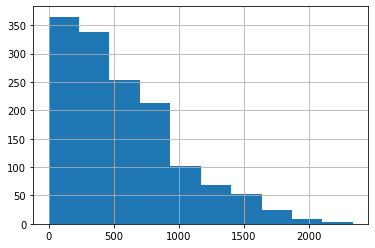

In [250]:
df_house_extracted5['BsmtUnfSF'].hist()

<AxesSubplot:>

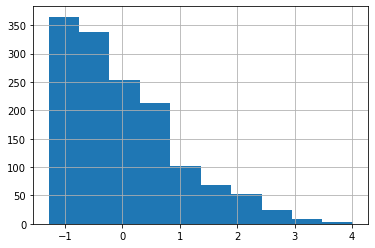

In [251]:
df_house_extracted5['BsmtUnfSF(scaled)'].hist()

In [252]:
bsmt_unf_sf_test = df_house_extracted5['BsmtUnfSF']

<AxesSubplot:>

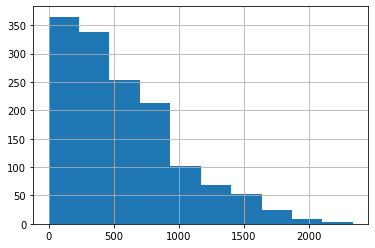

In [253]:
bsmt_unf_sf_test.hist()

In [258]:
df_house_extracted5[df_house_extracted5['BsmtUnfSF']<0]

,MSSubClass,MSZoning_,LotFrontage,LotArea,LotShape_,LotConfig_,Neighborhood_,HouseStyle_,OverallQual,OverallCond,...,House_Age(scaled),Garage_Age(scaled),GarageFinish_(scaled),GarageCars(scaled),GarageArea(scaled),WoodDeckSF(scaled),OpenPorchSF(scaled),Exterior_Avg(scaled),SaleCondition_(scaled),SalePrice(log)


In [263]:
bsmt_unf_sf_test[bsmt_unf_sf_test==0]

17      0
39      0
42      0
52      0
53      0
       ..
1393    0
1412    0
1426    0
1433    0
1439    0
Name: BsmtUnfSF, Length: 117, dtype: int64

In [264]:
bsmt_unf_sf_test2 = bsmt_unf_sf_test[bsmt_unf_sf_test!=0]

In [265]:
y, lambda_optimal = stats.boxcox(bsmt_unf_sf_test2)

In [266]:
y, lambda_optimal

(array([13.32758328, 17.29920961, 20.46085074, ..., 27.69209139,
        23.03956633, 26.83277133]),
 0.34261468017689584)

In [332]:
len(y)

1312

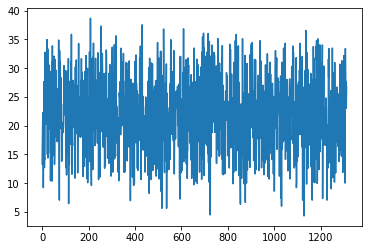

In [341]:
x_tmp = np.arange(0,len(y))
plt.plot(x_tmp,y)

In [268]:
y_boxcox = boxcox1p(bsmt_unf_sf_test2,lambda_optimal)

<AxesSubplot:>

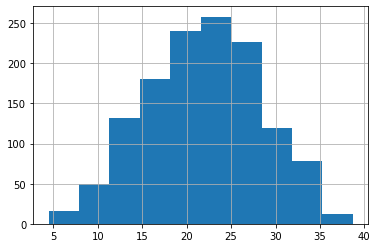

In [269]:
y_boxcox.hist()

In [270]:
df_house_extracted5.columns

Index(['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg', 'SaleCondition_', 'SalePrice',
       'MSSubClass(scaled)', 'MSZoning_(scaled)', 'LotFrontage(scaled)',
       'LotArea(scaled)', 'LotShape_(scaled)', 'LotConfig_(scaled)',
       'Neighborhood_(scaled)', 'HouseStyle_(scaled)', 'OverallQual(scaled)',
       'OverallCond(scaled)', 'RoofStyle_(scaled)', 'MasVnrType_(scaled)',


In [317]:
len(['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg', 'SaleCondition_', 'SalePrice'])

44

In [318]:
### REPORT
len(['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_', 
     'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual', 
     'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
     'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
     'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
     '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
     'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
     'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
     'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF','OpenPorchSF', 'Exterior_Avg'])

42

<AxesSubplot:>

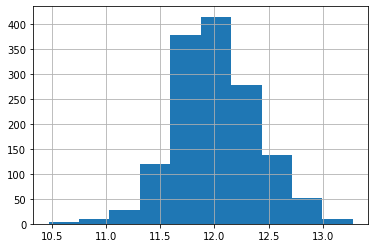

In [324]:
df_house_extracted5['SalePrice(log)'].hist()

<AxesSubplot:>

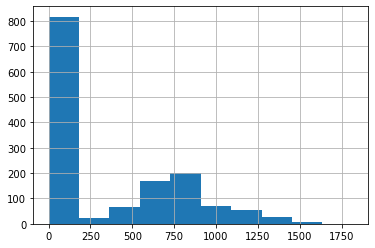

In [356]:
df_house_extracted5['2ndFlrSF'].hist()

In [343]:
df_house_extracted7[df_house_extracted7['BsmtUnfSF']==0]['BsmtUnfSF']

17      0
39      0
42      0
52      0
53      0
       ..
1393    0
1412    0
1426    0
1433    0
1439    0
Name: BsmtUnfSF, Length: 118, dtype: int64

In [346]:
df_house_extracted7['BsmtUnfSF'].replace(0,0.0001,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [347]:
df_house_extracted7[df_house_extracted7['BsmtUnfSF']==0]['BsmtUnfSF']

Series([], Name: BsmtUnfSF, dtype: float64)

In [348]:
df_house_extracted7.loc[df_house_extracted7['BsmtUnfSF']==0.0001,'BsmtUnfSF']

17      0.0001
39      0.0001
42      0.0001
52      0.0001
53      0.0001
         ...  
1393    0.0001
1412    0.0001
1426    0.0001
1433    0.0001
1439    0.0001
Name: BsmtUnfSF, Length: 118, dtype: float64

In [354]:
df_house_extracted7.loc[df_house_extracted7['BsmtUnfSF']==0.0001,'BsmtUnfSF'].replace(0.0001,0.001,inplace=True)

In [355]:
df_house_extracted7.loc[df_house_extracted7['BsmtUnfSF']==0.0001,'BsmtUnfSF']

17      0.0001
39      0.0001
42      0.0001
52      0.0001
53      0.0001
         ...  
1393    0.0001
1412    0.0001
1426    0.0001
1433    0.0001
1439    0.0001
Name: BsmtUnfSF, Length: 118, dtype: float64

In [ ]:
list of columns to be box-cox transformed
1. MSSubClass
    2. MSZoning_
    3. LotShape_
    4. LotConfig_
    5. Neighborhood_ (?)
    6. HouseStyle_
    7. RoofStyle_
    8. MasVnrType_
9. MasVnrArea (!)
    10. ExterQual_ (?)
    11. Foundation_
    12. BsmtQual_
    13. BsmtExposure_
    14. BsmtFinType1_
15. BsmtFinSF1
16. BsmtUnfSF
    17. HeatingQC_
18. 2ndFlrSF (?)
19. BsmtFullBath
20. FullBath
21. HalfBath
    22. KitchenQual_
# 23. TotRmsAbvGrd
24. Fireplaces
    25. FireplaceQu_
    26. GarageType_
27. House_Age (U-shaped?!)
28. Garage_Age
    29. GarageFinish_
30. WoodDeckSF
31. OpenPorchSF
32. Exterior_Avg
    34. SaleCondition_ (?)

In [325]:
df_house_extracted8 = df_house_extracted5.copy(deep=True)

In [399]:
df_house_extracted9 = df_house_extracted5.copy(deep=True)

In [327]:
df_house_extracted8[['MSSubClass']].value_counts()

MSSubClass
20            525
60            288
50            142
120            87
30             68
160            61
70             60
80             58
90             51
190            28
85             20
75             15
45             12
180            10
40              4
dtype: int64

In [357]:
col_lst_bxcx = ['MSSubClass','MasVnrArea','BsmtFinSF1','BsmtUnfSF','2ndFlrSF','BsmtFullBath','FullBath','HalfBath','TotRmsAbvGrd','Fireplaces','House_Age','Garage_Age','WoodDeckSF','OpenPorchSF','Exterior_Avg']

###---------------------------------
for i in range(len(col_lst_bxcx)):
    
    # initialization of columns for containing box-cox transformed data
    col_lst_bxcx_ = col_lst_bxcx[i] + '(bxcx)'
    df_house_extracted8[col_lst_bxcx_] = 0
    
    # if data contains 0, convert it into positive value close to 0
    if len(df_house_extracted8[df_house_extracted8[col_lst_bxcx[i]]==0]) != 0:
        df_house_extracted8[col_lst_bxcx[i]].replace(0,0.0001,inplace=True)
    #-----------------------------------------------------------------------
    
    # box-cox transform
    data4bxcx = df_house_extracted8[col_lst_bxcx[i]]
    y_bxcx, lambda_optimal = stats.boxcox(data4bxcx)
    print('optimal lambda : {}'.format(lambda_optimal))
    y_boxcox = boxcox1p(data4bxcx,lambda_optimal)
    
    # contain the transformed data
    df_house_extracted8[col_lst_bxcx_] = y_boxcox

optimal lambda : -0.20979446836231117
optimal lambda : -0.08126522126963955
optimal lambda : 0.12997158630814118
optimal lambda : 0.36679465409234224
optimal lambda : -0.05473937311827761
optimal lambda : -0.12132341264819936
optimal lambda : 0.7845369577475408
optimal lambda : -0.17616072753110387
optimal lambda : 0.2880999298455711
optimal lambda : 0.023896859937663006
optimal lambda : 0.3207847370150221
optimal lambda : 0.30900311096794353
optimal lambda : -0.022307291153160453
optimal lambda : 0.03416400150357681
optimal lambda : 0.5491643921447835


In [413]:
col_lst_bxcx = ['MSSubClass','MasVnrArea','BsmtFinSF1','BsmtUnfSF','2ndFlrSF','BsmtFullBath','FullBath','HalfBath','TotRmsAbvGrd','Fireplaces','House_Age','Garage_Age','WoodDeckSF','OpenPorchSF','Exterior_Avg']

###---------------------------------
for i in range(len(col_lst_bxcx)):
    
    # initialization of columns for containing box-cox transformed data
    col_lst_bxcx_ = col_lst_bxcx[i] + '(bxcx)'
    df_house_test_extracted[col_lst_bxcx_] = 0
    
    # if data contains 0, convert it into positive value close to 0
    if len(df_house_test_extracted[df_house_test_extracted[col_lst_bxcx[i]]==0]) != 0:
        df_house_test_extracted[col_lst_bxcx[i]].replace(0,0.0001,inplace=True)
    #-----------------------------------------------------------------------
    
    # box-cox transform
    data4bxcx = df_house_test_extracted[col_lst_bxcx[i]]
    y_bxcx, lambda_optimal = stats.boxcox(data4bxcx)
    print('optimal lambda : {}'.format(lambda_optimal))
    y_boxcox = boxcox1p(data4bxcx,lambda_optimal)
    
    # contain the transformed data
    df_house_test_extracted[col_lst_bxcx_] = y_boxcox

optimal lambda : -0.21012855746741063
optimal lambda : -0.09630378304187932
optimal lambda : 0.13453068774842292
optimal lambda : 0.36067123882508634
optimal lambda : -0.05808223333409935
optimal lambda : -0.11015370297763621
optimal lambda : 0.6230506927982926
optimal lambda : -0.17827610696275192
optimal lambda : -0.031966167433352066
optimal lambda : -0.0020056713226048128
optimal lambda : 0.3262021704740391
optimal lambda : 0.3694310831814935
optimal lambda : -0.020408017378766654
optimal lambda : 0.04697273301264018
optimal lambda : 0.5385509583048569


In [358]:
df_house_extracted8.columns

Index(['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond',
       ...
       'BsmtFullBath(bxcx)', 'FullBath(bxcx)', 'HalfBath(bxcx)',
       'TotRmsAbvGrd(bxcx)', 'Fireplaces(bxcx)', 'House_Age(bxcx)',
       'Garage_Age(bxcx)', 'WoodDeckSF(bxcx)', 'OpenPorchSF(bxcx)',
       'Exterior_Avg(bxcx)'],
      dtype='object', length=103)

In [359]:
df_house_extracted8.columns[50:]

Index(['Neighborhood_(scaled)', 'HouseStyle_(scaled)', 'OverallQual(scaled)',
       'OverallCond(scaled)', 'RoofStyle_(scaled)', 'MasVnrType_(scaled)',
       'MasVnrArea(scaled)', 'ExterQual_(scaled)', 'Foundation_(scaled)',
       'BsmtQual_(scaled)', 'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)',
       'BsmtFinSF1(scaled)', 'BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)',
       'HeatingQC_(scaled)', '1stFlrSF(scaled)', '2ndFlrSF(scaled)',
       'GrLivArea(scaled)', 'BsmtFullBath(scaled)', 'FullBath(scaled)',
       'HalfBath(scaled)', 'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)',
       'TotRmsAbvGrd(scaled)', 'Fireplaces(scaled)', 'FireplaceQu_(scaled)',
       'GarageType_(scaled)', 'House_Age(scaled)', 'Garage_Age(scaled)',
       'GarageFinish_(scaled)', 'GarageCars(scaled)', 'GarageArea(scaled)',
       'WoodDeckSF(scaled)', 'OpenPorchSF(scaled)', 'Exterior_Avg(scaled)',
       'SaleCondition_(scaled)', 'SalePrice(log)', 'MSSubClass(bxcx)',
       'MasVnrArea(bxcx)', 'BsmtF

<AxesSubplot:>

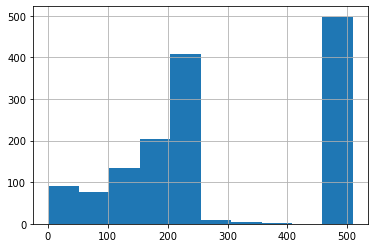

In [397]:
df_house_extracted8['Exterior_Avg'].hist()

<AxesSubplot:>

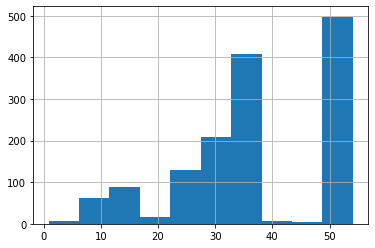

In [398]:
df_house_extracted8['Exterior_Avg(bxcx)'].hist()

In [ ]:
# list of columns not bxcx transformed well (?) 
# or list of bxcx-transformed columns that wouldn't be chosen when columns are selected
1. '2ndFlrSF'
2. 'BsmtFullBath'
3. 'FullBath'
4. 'Fireplaces'

In [445]:
len(col_lst_bxcx)

15

In [405]:
### boxcox1p -> boxccx


col_lst_bxcx = ['MSSubClass','MasVnrArea','BsmtFinSF1','BsmtUnfSF','2ndFlrSF','BsmtFullBath','FullBath','HalfBath','TotRmsAbvGrd','Fireplaces','House_Age','Garage_Age','WoodDeckSF','OpenPorchSF','Exterior_Avg']

###---------------------------------
for i in range(len(col_lst_bxcx)):
    
    # initialization of columns for containing box-cox transformed data
    col_lst_bxcx_ = col_lst_bxcx[i] + '(bxcx)'
    df_house_extracted9[col_lst_bxcx_] = 0
    
    # if data contains 0, convert it into positive value close to 0
    if len(df_house_extracted9[df_house_extracted9[col_lst_bxcx[i]]==0]) != 0:
        df_house_extracted9[col_lst_bxcx[i]].replace(0,0.0001,inplace=True)
    #-----------------------------------------------------------------------
    
    # box-cox transform
    data4bxcx = df_house_extracted9[col_lst_bxcx[i]]
    y_bxcx, lambda_optimal = stats.boxcox(data4bxcx)
    print('optimal lambda : {}'.format(lambda_optimal))
    ### box cox instead of boxcox1p
    y_boxcox = boxcox(data4bxcx,lambda_optimal)
    
    # contain the transformed data
    df_house_extracted9[col_lst_bxcx_] = y_boxcox

optimal lambda : -0.20979446836231117
optimal lambda : -0.08126522126963955
optimal lambda : 0.12997158630814118
optimal lambda : 0.36679465409234224
optimal lambda : -0.05473937311827761
optimal lambda : -0.12132341264819936
optimal lambda : 0.7845369577475408
optimal lambda : -0.17616072753110387
optimal lambda : 0.2880999298455711
optimal lambda : 0.023896859937663006
optimal lambda : 0.3207847370150221
optimal lambda : 0.30900311096794353
optimal lambda : -0.022307291153160453
optimal lambda : 0.03416400150357681
optimal lambda : 0.5491643921447835


<AxesSubplot:>

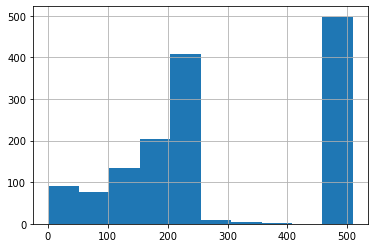

In [406]:
df_house_extracted9['Exterior_Avg'].hist()

<AxesSubplot:>

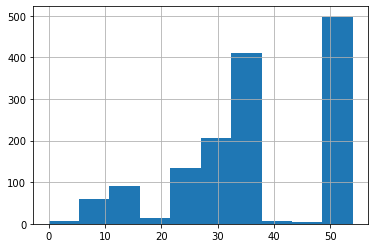

In [407]:
df_house_extracted9['Exterior_Avg(bxcx)'].hist()

<AxesSubplot:>

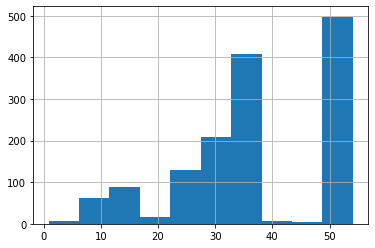

In [408]:
df_house_extracted8['Exterior_Avg(bxcx)'].hist()

In [409]:
df_house_extracted8.columns[:50]

Index(['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg', 'SaleCondition_', 'SalePrice',
       'MSSubClass(scaled)', 'MSZoning_(scaled)', 'LotFrontage(scaled)',
       'LotArea(scaled)', 'LotShape_(scaled)', 'LotConfig_(scaled)'],
      dtype='object')

In [410]:
df_house_extracted8.columns[50:]

Index(['Neighborhood_(scaled)', 'HouseStyle_(scaled)', 'OverallQual(scaled)',
       'OverallCond(scaled)', 'RoofStyle_(scaled)', 'MasVnrType_(scaled)',
       'MasVnrArea(scaled)', 'ExterQual_(scaled)', 'Foundation_(scaled)',
       'BsmtQual_(scaled)', 'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)',
       'BsmtFinSF1(scaled)', 'BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)',
       'HeatingQC_(scaled)', '1stFlrSF(scaled)', '2ndFlrSF(scaled)',
       'GrLivArea(scaled)', 'BsmtFullBath(scaled)', 'FullBath(scaled)',
       'HalfBath(scaled)', 'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)',
       'TotRmsAbvGrd(scaled)', 'Fireplaces(scaled)', 'FireplaceQu_(scaled)',
       'GarageType_(scaled)', 'House_Age(scaled)', 'Garage_Age(scaled)',
       'GarageFinish_(scaled)', 'GarageCars(scaled)', 'GarageArea(scaled)',
       'WoodDeckSF(scaled)', 'OpenPorchSF(scaled)', 'Exterior_Avg(scaled)',
       'SaleCondition_(scaled)', 'SalePrice(log)', 'MSSubClass(bxcx)',
       'MasVnrArea(bxcx)', 'BsmtF

In [411]:
# df_house_extracted8 = df_house5[['MSSubClass','MSZoning_','LotFrontage','LotArea','LotShape_','LotConfig_','Neighborhood_',
#           'HouseStyle_','OverallQual','OverallCond','RoofStyle_','MasVnrType_','MasVnrArea','ExterQual_','Foundation_','BsmtQual_',
#           'BsmtExposure_','BsmtFinType1_','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','HeatingQC_','1stFlrSF','2ndFlrSF',
#           'GrLivArea','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','KitchenQual_','TotRmsAbvGrd','Fireplaces','FireplaceQu_',
#           'GarageType_','House_Age','Garage_Age','GarageFinish_','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','Exterior_Avg',
#         'SaleCondition_',
#           'SalePrice']]

# #================================================================
# col_lst = [
#     'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
#        'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
#        'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
#        'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
#        'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
#        '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
#        'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
#        'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
#        'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
#        'OpenPorchSF', 'Exterior_Avg','SaleCondition_'
# ]
# #--------------------------------------------------------------
# # create column and contain standardized data from the columns above, in sequence
# for i in range(len(col_lst)):
#     # standardize the data, using the library
#     array_tst = df_house_extracted8[col_lst[i]].values.reshape(-1,1)
#     scaled_data_tst = scaler.fit_transform(array_tst) 
#     # making new column's name
#     new_col = col_lst[i] + '(scaled)'
#     # create column for containing the standardized data
#     df_house_extracted8[new_col] = scaled_data_tst
# #-----------------------------------------------------
# log_SalePrice = np.log1p(df_house_extracted8['SalePrice'])
# df_house_extracted8['SalePrice(log)'] = log_SalePrice

##=================================================================================
##=================================================================================
# extract train data columns to be plugged in regression models
X = df_house_extracted8[[
        
        'MSSubClass(bxcx)',
        
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled)',
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)',
       'BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', '2ndFlrSF(scaled)', 'GrLivArea(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 'WoodDeckSF(scaled)',
       'OpenPorchSF(scaled)', 'Exterior_Avg(scaled)','SaleCondition_(scaled)']]
y = df_house_extracted8['SalePrice(log)']

# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [412]:
ridge_params = {'alpha':range(0,100)}
var1 = print_best_params(ridge_fitter_tmp,ridge_params)
#---------------------------------------------------
lasso_params = {'alpha':np.arange(0,0.1,0.0001)}
var2 = print_best_params(lasso_fitter_tmp,lasso_params)
#---------------------------------------------------------
eln_params = {'alpha':np.arange(0,0.1,0.01),
            'l1_ratio':np.arange(0,0.1,0.01)}
var3 = print_best_params(elasticNet_fitter_tmp,eln_params)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(30,80)}
var4 = print_best_params(xgb_fitter_tmp,candidate_params)
#----------------------------------------------------------
candidate_params = {'n_estimators' : range(160,172)}
var5 = print_best_params(gbm_fitter_tmp,candidate_params)
#---------------------------------------------------------
candidate_params = {'n_estimators' : range(130,152)}
var6 = print_best_params(rf_fitter_tmp,candidate_params)
#------------------------------------------------------
candidate_params = {'n_estimators' : range(50,140)}
var7 = print_best_params(lgbm_fitter_tmp,candidate_params)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(100,135)}
var8= print_best_params(bg_fitter_tmp,candidate_params)
#-------------------------------------------------------
candidate_params = {'n_estimators' : range(100,135)}
var9 = print_best_params(et_fitter_tmp,candidate_params)
#########################################################################################################
#########################################################################################################
#########################################################################################################

when the model Ridge is taken with grid search cv = 5 the best avg rmse value is : 0.1263, and the best parameter is : {'alpha': 50}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.531028545807812, tolerance: 0.017288367625891077
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimat

when the model Lasso is taken with grid search cv = 5 the best avg rmse value is : 0.1263, and the best parameter is : {'alpha': 0.0028}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.531028545807812, tolerance: 0.017288367625891077
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimat

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.531028545807812, tolerance: 0.017288367625891077
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimat

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.392636453508803, tolerance: 0.017549508286944546
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.395287411294447, tolerance: 0.01754539489564917
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap:

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.127144028023032, tolerance: 0.017288367625891077
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.018528971188442, tolerance: 0.016780229150464947
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.573634656930851, tolerance: 0.017025865671399878
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converge

when the model ElasticNet is taken with grid search cv = 5 the best avg rmse value is : 0.1262, and the best parameter is : {'alpha': 0.03, 'l1_ratio': 0.04}
when the model XGBRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1372, and the best parameter is : {'n_estimators': 50}
when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1223, and the best parameter is : {'n_estimators': 162}
when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1353, and the best parameter is : {'n_estimators': 144}
when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1273, and the best parameter is : {'n_estimators': 66}
when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1352, and the best parameter is : {'n_estimators': 101}
when the model ExtraTreesRegressor is taken with grid search cv = 5 the best 

In [415]:
# ordinary linear regression model
line_fitter = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter = Ridge(alpha=50)
lasso_fitter = Lasso(alpha=0.0028)
elasticNet_fitter = ElasticNet(alpha = 0.03, l1_ratio=0.04)
# ensemble models
xgb_fitter = XGBRegressor(n_estimators=50)
gbm_fitter = GradientBoostingRegressor(n_estimators=162)
rf_fitter = RandomForestRegressor(n_estimators=144)
lgbm_fitter = LGBMRegressor(n_estimators=66)
bg_fitter = BaggingRegressor(n_estimators=101)
et_fitter = ExtraTreesRegressor(n_estimators=109)

### Print RMSLE values using the user-defined function above
dict_rmse = {}
for model in [line_fitter,ridge_fitter,lasso_fitter,elasticNet_fitter,xgb_fitter,gbm_fitter,rf_fitter,lgbm_fitter,bg_fitter,et_fitter]:
    rmse_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmse[str(model)] = rmse_value
### Sort RMSLE values with ascending order
{k: v for k, v in sorted(dict_rmse.items(), key=lambda item: item[1])}

##### LinearRegression #####
RMSLE : 0.10161370789280534
##### Ridge #####
RMSLE : 0.10707505810533641
##### Lasso #####
RMSLE : 0.10623612234641228
##### ElasticNet #####
RMSLE : 0.10781114780992003
##### XGBRegressor #####
RMSLE : 0.09533202692334294
##### GradientBoostingRegressor #####
RMSLE : 0.06592394581851234
##### RandomForestRegressor #####
RMSLE : 0.1236667822771813
##### LGBMRegressor #####
RMSLE : 0.14687072541637425
##### BaggingRegressor #####
RMSLE : 0.11533916019756839
##### ExtraTreesRegressor #####
RMSLE : 0.12636004995204467


{'GradientBoostingRegressor(n_estimators=162)': 0.06592394581851234,
 "XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,\n             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,\n             early_stopping_rounds=None, enable_categorical=False,\n             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',\n             importance_type=None, interaction_constraints='',\n             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,\n             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,\n             missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=0,\n             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,\n             reg_lambda=1, ...)": 0.09533202692334294,
 'LinearRegression()': 0.10161370789280534,
 'Lasso(alpha=0.0028)': 0.10623612234641228,
 'Ridge(alpha=50)': 0.10707505810533641,
 'ElasticNet(alpha=0.03, l1_ratio=0.04)': 0.10781114780992003,
 'BaggingRegress

In [416]:
df_house_test_extracted_ = pd.concat([df_house_test_extracted,df_house_test[['SaleCondition_']]],axis=1)
#--------------------------------------------------------------------------
col_lst = [
        'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg','SaleCondition_'
] 
#--------------------------------------------------------------
#------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_test_extracted_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_test_extracted_[new_col] = scaled_data_tst
###====================================================================
###================================================
###================================================
df_house_test_extracted2b_predicted = df_house_test_extracted_[[
        
     'MSSubClass(bxcx)',
    
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled)',
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)',
       'BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', '2ndFlrSF(scaled)', 'GrLivArea(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 'WoodDeckSF(scaled)',
       'OpenPorchSF(scaled)', 'Exterior_Avg(scaled)','SaleCondition_(scaled)' 
]]

In [417]:
result_from_model = gbm_fitter.predict(df_house_test_extracted2b_predicted)
df_house_test['SalePrice'] = 0
df_house_test['SalePrice'] = np.expm1(result_from_model)
df_house_test[['Id','SalePrice']].to_csv('C:/Users/thsong/submission13_1.csv',index=False)
df_house_test[['Id','SalePrice']]

,Id,SalePrice
0,1461,123027.505528
1,1462,159821.343168
2,1463,182834.987981
3,1464,184442.096984
4,1465,194704.288586
...,...,...
1454,2915,73621.576040
1455,2916,78489.782485
1456,2917,163838.896840
1457,2918,117595.535555


In [414]:
df_house_test_extracted.columns

Index(['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg', 'MSSubClass(bxcx)', 'MasVnrArea(bxcx)',
       'BsmtFinSF1(bxcx)', 'BsmtUnfSF(bxcx)', '2ndFlrSF(bxcx)',
       'BsmtFullBath(bxcx)', 'FullBath(bxcx)', 'HalfBath(bxcx)',
       'TotRmsAbvGrd(bxcx)', 'Fireplaces(bxcx)', 'House_Age(bxcx)',
       'Garage_Age(bxcx)', 'WoodDeckSF(bxcx)', 'OpenPorchSF(bxcx)',
       'Exterior_Avg(

In [36]:
df_house_extracted8 = df_house5[['MSSubClass','MSZoning_','LotFrontage','LotArea','LotShape_','LotConfig_','Neighborhood_',
          'HouseStyle_','OverallQual','OverallCond','RoofStyle_','MasVnrType_','MasVnrArea','ExterQual_','Foundation_','BsmtQual_',
          'BsmtExposure_','BsmtFinType1_','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','HeatingQC_','1stFlrSF','2ndFlrSF',
          'GrLivArea','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','KitchenQual_','TotRmsAbvGrd','Fireplaces','FireplaceQu_',
          'GarageType_','House_Age','Garage_Age','GarageFinish_','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','Exterior_Avg',
        'SaleCondition_',
          'SalePrice']]

#================================================================
col_lst = [
    'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg','SaleCondition_'
]
#--------------------------------------------------------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_extracted8[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_extracted8[new_col] = scaled_data_tst
#-----------------------------------------------------
log_SalePrice = np.log1p(df_house_extracted8['SalePrice'])
df_house_extracted8['SalePrice(log)'] = log_SalePrice

##=================================================================================
##=================================================================================
# extract train data columns to be plugged in regression models
X = df_house_extracted8[[
        
        'MSSubClass(bxcx)',
        
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled)',
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)',
       'BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', '2ndFlrSF(scaled)', 'GrLivArea(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 'WoodDeckSF(scaled)',
       'OpenPorchSF(scaled)', 'Exterior_Avg(scaled)','SaleCondition_(scaled)']]
y = df_house_extracted8['SalePrice(log)']

# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

NameError: name 'df_house5' is not defined

### sub4 + sale condition + bxcx col3

In [419]:
##=================================================================================
##=================================================================================
# extract train data columns to be plugged in regression models
X = df_house_extracted8[[
        
        'MSSubClass(bxcx)','MasVnrArea(bxcx)','BsmtFinSF1(bxcx)',
        
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)', 
       'BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', '2ndFlrSF(scaled)', 'GrLivArea(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 'WoodDeckSF(scaled)',
       'OpenPorchSF(scaled)', 'Exterior_Avg(scaled)','SaleCondition_(scaled)']]
### 'MasVnrArea(scaled)','BsmtFinSF1(scaled)',

y = df_house_extracted8['SalePrice(log)']

# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [420]:
ridge_params = {'alpha':range(0,100)}
var1 = print_best_params(ridge_fitter_tmp,ridge_params)
#---------------------------------------------------
lasso_params = {'alpha':np.arange(0,0.1,0.0001)}
var2 = print_best_params(lasso_fitter_tmp,lasso_params)
#---------------------------------------------------------
eln_params = {'alpha':np.arange(0,0.1,0.01),
            'l1_ratio':np.arange(0,0.1,0.01)}
var3 = print_best_params(elasticNet_fitter_tmp,eln_params)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(30,80)}
var4 = print_best_params(xgb_fitter_tmp,candidate_params)
#----------------------------------------------------------
candidate_params = {'n_estimators' : range(160,172)}
var5 = print_best_params(gbm_fitter_tmp,candidate_params)
#---------------------------------------------------------
candidate_params = {'n_estimators' : range(130,152)}
var6 = print_best_params(rf_fitter_tmp,candidate_params)
#------------------------------------------------------
candidate_params = {'n_estimators' : range(50,140)}
var7 = print_best_params(lgbm_fitter_tmp,candidate_params)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(100,135)}
var8= print_best_params(bg_fitter_tmp,candidate_params)
#-------------------------------------------------------
candidate_params = {'n_estimators' : range(100,135)}
var9 = print_best_params(et_fitter_tmp,candidate_params)
#########################################################################################################
#########################################################################################################
#########################################################################################################

when the model Ridge is taken with grid search cv = 5 the best avg rmse value is : 0.1265, and the best parameter is : {'alpha': 34}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.606856307052809, tolerance: 0.017288367625891077
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimat

when the model Lasso is taken with grid search cv = 5 the best avg rmse value is : 0.1264, and the best parameter is : {'alpha': 0.0006000000000000001}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.606856307052809, tolerance: 0.017288367625891077
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimat

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.448981374670858, tolerance: 0.016780229150464947
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimat

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.448981374670858, tolerance: 0.016780229150464947
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  mode

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.448981374670858, tolerance: 0.016780229150464947
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimat

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.448981374670858, tolerance: 0.016780229150464947
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  mode

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.354156374272163, tolerance: 0.017288367625891077
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.160726589450492, tolerance: 0.016780229150464947
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.745010833591623, tolerance: 0.017025865671399878
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converge

when the model ElasticNet is taken with grid search cv = 5 the best avg rmse value is : 0.1263, and the best parameter is : {'alpha': 0.01, 'l1_ratio': 0.09}
when the model XGBRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1374, and the best parameter is : {'n_estimators': 50}
when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1226, and the best parameter is : {'n_estimators': 170}
when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1352, and the best parameter is : {'n_estimators': 135}
when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1281, and the best parameter is : {'n_estimators': 84}
when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1353, and the best parameter is : {'n_estimators': 106}
when the model ExtraTreesRegressor is taken with grid search cv = 5 the best 

In [421]:
# ordinary linear regression model
line_fitter = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter = Ridge(alpha=34)
lasso_fitter = Lasso(alpha=0.0006)
elasticNet_fitter = ElasticNet(alpha = 0.01, l1_ratio=0.09)
# ensemble models
xgb_fitter = XGBRegressor(n_estimators=50)
gbm_fitter = GradientBoostingRegressor(n_estimators=170)
rf_fitter = RandomForestRegressor(n_estimators=135)
lgbm_fitter = LGBMRegressor(n_estimators=84)
bg_fitter = BaggingRegressor(n_estimators=106)
et_fitter = ExtraTreesRegressor(n_estimators=124)

### Print RMSLE values using the user-defined function above
dict_rmse = {}
for model in [line_fitter,ridge_fitter,lasso_fitter,elasticNet_fitter,xgb_fitter,gbm_fitter,rf_fitter,lgbm_fitter,bg_fitter,et_fitter]:
    rmse_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmse[str(model)] = rmse_value
### Sort RMSLE values with ascending order
{k: v for k, v in sorted(dict_rmse.items(), key=lambda item: item[1])}

##### LinearRegression #####
RMSLE : 0.10267639953391978
##### Ridge #####
RMSLE : 0.10610179769639119
##### Lasso #####
RMSLE : 0.10190864509419607
##### ElasticNet #####
RMSLE : 0.10306193703563486
##### XGBRegressor #####
RMSLE : 0.0955121597560741
##### GradientBoostingRegressor #####
RMSLE : 0.06410224357621619
##### RandomForestRegressor #####
RMSLE : 0.1120730734504619
##### LGBMRegressor #####
RMSLE : 0.12986144298070085
##### BaggingRegressor #####
RMSLE : 0.12079250848787634
##### ExtraTreesRegressor #####
RMSLE : 0.15047400792762633


{'GradientBoostingRegressor(n_estimators=170)': 0.06410224357621619,
 "XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,\n             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,\n             early_stopping_rounds=None, enable_categorical=False,\n             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',\n             importance_type=None, interaction_constraints='',\n             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,\n             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,\n             missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=0,\n             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,\n             reg_lambda=1, ...)": 0.0955121597560741,
 'Lasso(alpha=0.0006)': 0.10190864509419607,
 'LinearRegression()': 0.10267639953391978,
 'ElasticNet(alpha=0.01, l1_ratio=0.09)': 0.10306193703563486,
 'Ridge(alpha=34)': 0.10610179769639119,
 'RandomForestReg

In [422]:
df_house_test_extracted_ = pd.concat([df_house_test_extracted,df_house_test[['SaleCondition_']]],axis=1)
#--------------------------------------------------------------------------
col_lst = [
        'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg','SaleCondition_'
] 
#--------------------------------------------------------------
#------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_test_extracted_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_test_extracted_[new_col] = scaled_data_tst
###====================================================================
###================================================
###================================================
df_house_test_extracted2b_predicted = df_house_test_extracted_[[
        
     'MSSubClass(bxcx)','MasVnrArea(bxcx)','BsmtFinSF1(bxcx)',
    
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)',
       'BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', '2ndFlrSF(scaled)', 'GrLivArea(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 'WoodDeckSF(scaled)',
       'OpenPorchSF(scaled)', 'Exterior_Avg(scaled)','SaleCondition_(scaled)' 
]]
### 'MasVnrArea(scaled)', 'BsmtFinSF1(scaled)',
result_from_model = gbm_fitter.predict(df_house_test_extracted2b_predicted)
df_house_test['SalePrice'] = 0
df_house_test['SalePrice'] = np.expm1(result_from_model)
df_house_test[['Id','SalePrice']].to_csv('C:/Users/thsong/submission13_2.csv',index=False)
df_house_test[['Id','SalePrice']]

,Id,SalePrice
0,1461,122904.591099
1,1462,159848.823395
2,1463,183501.375257
3,1464,184625.626961
4,1465,194145.545242
...,...,...
1454,2915,73212.254834
1455,2916,78937.670736
1456,2917,163251.415020
1457,2918,118673.167872


### code review

<AxesSubplot:>

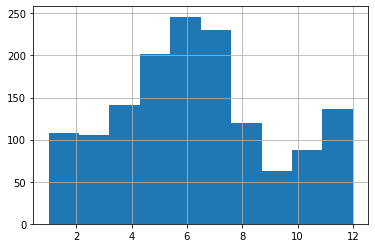

In [423]:
df_house['MoSold'].hist()

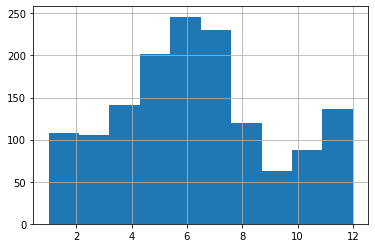

In [424]:
mosold_tmp = df_house['MoSold'].hist()

In [462]:
df_house['MoSold'].value_counts()

6     246
7     230
5     202
4     141
8     120
3     106
10     88
11     77
9      63
12     59
1      56
2      52
Name: MoSold, dtype: int64

In [426]:
0.5236 * np.cos(df_house['MoSold'].values)

array([-0.21789448,  0.14852552, -0.47706781, ..., -0.21789448,
        0.14852552, -0.3422478 ])

In [431]:
y_tmp2 = 0.5236 * np.cos(df_house['MoSold'].values)
x_tmp2 = np.arange(-len(y_tmp2)/2,len(y_tmp2)/2)

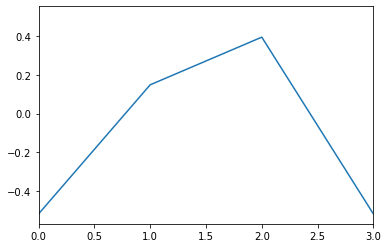

In [444]:
plt.plot(x_tmp2,y_tmp2)
plt.xlim(right=3,left=0)
plt.show()

### sub4 + sale condition + bxcx on col 11

In [ ]:
'MSSubClass','MasVnrArea','BsmtFinSF1','BsmtUnfSF','2ndFlrSF','BsmtFullBath','FullBath','HalfBath','Fireplaces','House_Age','Garage_Age','WoodDeckSF','OpenPorchSF','Exterior_Avg'

In [447]:
##=================================================================================
##=================================================================================
# extract train data columns to be plugged in regression models
X = df_house_extracted8[[
        
        'MSSubClass(bxcx)','MasVnrArea(bxcx)','BsmtFinSF1(bxcx)',
        'BsmtUnfSF(bxcx)','2ndFlrSF(bxcx)','BsmtFullBath(bxcx)','FullBath(bxcx)','HalfBath(bxcx)','Fireplaces(bxcx)',
        'WoodDeckSF(bxcx)','OpenPorchSF(bxcx)',
        
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)', 
       'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', 'GrLivArea(scaled)',
        
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
        'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 
       'Exterior_Avg(scaled)','SaleCondition_(scaled)']]
### 'MasVnrArea(scaled)','BsmtFinSF1(scaled)','BsmtUnfSF(scaled)', '2ndFlrSF(scaled)', 'BsmtFullBath(scaled)',
### 'FullBath(scaled)', 'HalfBath(scaled)','Fireplaces(scaled)','WoodDeckSF(scaled)','OpenPorchSF(scaled)', 

y = df_house_extracted8['SalePrice(log)']

# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [448]:
ridge_params = {'alpha':range(0,100)}
var1 = print_best_params(ridge_fitter_tmp,ridge_params)
#---------------------------------------------------
lasso_params = {'alpha':np.arange(0,0.1,0.0001)}
var2 = print_best_params(lasso_fitter_tmp,lasso_params)
#---------------------------------------------------------
eln_params = {'alpha':np.arange(0,0.1,0.01),
            'l1_ratio':np.arange(0,0.1,0.01)}
var3 = print_best_params(elasticNet_fitter_tmp,eln_params)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(30,80)}
var4 = print_best_params(xgb_fitter_tmp,candidate_params)
#----------------------------------------------------------
candidate_params = {'n_estimators' : range(160,172)}
var5 = print_best_params(gbm_fitter_tmp,candidate_params)
#---------------------------------------------------------
candidate_params = {'n_estimators' : range(130,152)}
var6 = print_best_params(rf_fitter_tmp,candidate_params)
#------------------------------------------------------
candidate_params = {'n_estimators' : range(50,140)}
var7 = print_best_params(lgbm_fitter_tmp,candidate_params)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(100,135)}
var8= print_best_params(bg_fitter_tmp,candidate_params)
#-------------------------------------------------------
candidate_params = {'n_estimators' : range(100,135)}
var9 = print_best_params(et_fitter_tmp,candidate_params)
#########################################################################################################
#########################################################################################################
#########################################################################################################

when the model Ridge is taken with grid search cv = 5 the best avg rmse value is : 0.127, and the best parameter is : {'alpha': 20}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.617240014515232, tolerance: 0.017288367625891077
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimat

when the model Lasso is taken with grid search cv = 5 the best avg rmse value is : 0.1268, and the best parameter is : {'alpha': 0.0009000000000000001}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.617240014515232, tolerance: 0.017288367625891077
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimat

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.441316743948187, tolerance: 0.017549508286944546
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.45098278903959, tolerance: 0.016780229150464947
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.45098278903959, tolerance: 0.016780229150464947
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.018311679045649, tolerance: 0.017288367625891077
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.857662797129073, tolerance: 0.016780229150464947
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.49309613688909, tolerance: 0.017025865671399878
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergen

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.922601524837878, tolerance: 0.017288367625891077
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.760626753104846, tolerance: 0.016780229150464947
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.415639542993587, tolerance: 0.017025865671399878
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converge

when the model ElasticNet is taken with grid search cv = 5 the best avg rmse value is : 0.1268, and the best parameter is : {'alpha': 0.01, 'l1_ratio': 0.07}
when the model XGBRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1372, and the best parameter is : {'n_estimators': 58}
when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1224, and the best parameter is : {'n_estimators': 171}
when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1359, and the best parameter is : {'n_estimators': 139}
when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1266, and the best parameter is : {'n_estimators': 74}
when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1353, and the best parameter is : {'n_estimators': 125}
when the model ExtraTreesRegressor is taken with grid search cv = 5 the best 

In [449]:
# ordinary linear regression model
line_fitter = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter = Ridge(alpha=20)
lasso_fitter = Lasso(alpha=0.0009)
elasticNet_fitter = ElasticNet(alpha = 0.01, l1_ratio=0.07)
# ensemble models
xgb_fitter = XGBRegressor(n_estimators=58)
gbm_fitter = GradientBoostingRegressor(n_estimators=171)
rf_fitter = RandomForestRegressor(n_estimators=139)
lgbm_fitter = LGBMRegressor(n_estimators=74)
bg_fitter = BaggingRegressor(n_estimators=125)
et_fitter = ExtraTreesRegressor(n_estimators=115)

### Print RMSLE values using the user-defined function above
dict_rmse = {}
for model in [line_fitter,ridge_fitter,lasso_fitter,elasticNet_fitter,xgb_fitter,gbm_fitter,rf_fitter,lgbm_fitter,bg_fitter,et_fitter]:
    rmse_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmse[str(model)] = rmse_value
### Sort RMSLE values with ascending order
{k: v for k, v in sorted(dict_rmse.items(), key=lambda item: item[1])}

##### LinearRegression #####
RMSLE : 0.10046964019132616
##### Ridge #####
RMSLE : 0.1022003478732446
##### Lasso #####
RMSLE : 0.09970085778661884
##### ElasticNet #####
RMSLE : 0.10048954092447
##### XGBRegressor #####
RMSLE : 0.172104314130263
##### GradientBoostingRegressor #####
RMSLE : 0.06405433526100347
##### RandomForestRegressor #####
RMSLE : 0.11913543537019315
##### LGBMRegressor #####
RMSLE : 0.14333813420730418
##### BaggingRegressor #####
RMSLE : 0.11893282651396955
##### ExtraTreesRegressor #####
RMSLE : 0.16355933683412568


{'GradientBoostingRegressor(n_estimators=171)': 0.06405433526100347,
 'Lasso(alpha=0.0009)': 0.09970085778661884,
 'LinearRegression()': 0.10046964019132616,
 'ElasticNet(alpha=0.01, l1_ratio=0.07)': 0.10048954092447,
 'Ridge(alpha=20)': 0.1022003478732446,
 'BaggingRegressor(n_estimators=125)': 0.11893282651396955,
 'RandomForestRegressor(n_estimators=139)': 0.11913543537019315,
 'LGBMRegressor(n_estimators=74)': 0.14333813420730418,
 'ExtraTreesRegressor(n_estimators=115)': 0.16355933683412568,
 "XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,\n             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,\n             early_stopping_rounds=None, enable_categorical=False,\n             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',\n             importance_type=None, interaction_constraints='',\n             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,\n             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weigh

In [451]:
df_house_test_extracted_ = pd.concat([df_house_test_extracted,df_house_test[['SaleCondition_']]],axis=1)
#--------------------------------------------------------------------------
col_lst = [
        'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg','SaleCondition_'
] 
#--------------------------------------------------------------
#------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_test_extracted_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_test_extracted_[new_col] = scaled_data_tst
###====================================================================
###================================================
###================================================
df_house_test_extracted2b_predicted = df_house_test_extracted_[[
    
    'MSSubClass(bxcx)','MasVnrArea(bxcx)','BsmtFinSF1(bxcx)',
        'BsmtUnfSF(bxcx)','2ndFlrSF(bxcx)','BsmtFullBath(bxcx)','FullBath(bxcx)','HalfBath(bxcx)','Fireplaces(bxcx)',
        'WoodDeckSF(bxcx)','OpenPorchSF(bxcx)',

       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)',
       'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', 'GrLivArea(scaled)',
       
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 
       'Exterior_Avg(scaled)','SaleCondition_(scaled)' 
]]
### 'MasVnrArea(scaled)', 'BsmtFinSF1(scaled)',
### 'BsmtUnfSF(scaled)', '2ndFlrSF(scaled)', 'BsmtFullBath(scaled)', 'FullBath(scaled)', 
### 'HalfBath(scaled)','Fireplaces(scaled)', 'WoodDeckSF(scaled)','OpenPorchSF(scaled)', 
result_from_model = gbm_fitter.predict(df_house_test_extracted2b_predicted)
df_house_test['SalePrice'] = 0
df_house_test['SalePrice'] = np.expm1(result_from_model)
df_house_test[['Id','SalePrice']].to_csv('C:/Users/thsong/submission13_3.csv',index=False)
df_house_test[['Id','SalePrice']]

,Id,SalePrice
0,1461,122905.524724
1,1462,162043.861154
2,1463,183502.769191
3,1464,184627.029436
4,1465,193568.656223
...,...,...
1454,2915,73212.810982
1455,2916,78938.270375
1456,2917,170464.933511
1457,2918,118674.069354


### sub4 + sale condition + bxcx on all of the selected

In [452]:
###'MSSubClass','MasVnrArea','BsmtFinSF1','BsmtUnfSF','2ndFlrSF','BsmtFullBath','FullBath','HalfBath','Fireplaces','House_Age','Garage_Age','WoodDeckSF','OpenPorchSF','Exterior_Avg'

##=================================================================================
##=================================================================================
# extract train data columns to be plugged in regression models
X = df_house_extracted8[[
        
        'MSSubClass(bxcx)','MasVnrArea(bxcx)','BsmtFinSF1(bxcx)',
        'BsmtUnfSF(bxcx)','2ndFlrSF(bxcx)','BsmtFullBath(bxcx)','FullBath(bxcx)','HalfBath(bxcx)','Fireplaces(bxcx)',
        'WoodDeckSF(bxcx)','OpenPorchSF(bxcx)',
        'House_Age(bxcx)','Garage_Age(bxcx)','Exterior_Avg(bxcx)',
    
    
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)', 
       'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', 'GrLivArea(scaled)',
        
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
        'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 
        'SaleCondition_(scaled)']]
### 'MasVnrArea(scaled)','BsmtFinSF1(scaled)','BsmtUnfSF(scaled)', '2ndFlrSF(scaled)', 'BsmtFullBath(scaled)',
### 'FullBath(scaled)', 'HalfBath(scaled)','Fireplaces(scaled)','WoodDeckSF(scaled)','OpenPorchSF(scaled)', 
### 'House_Age(scaled)', 'Garage_Age(scaled)', 'Exterior_Avg(scaled)',
y = df_house_extracted8['SalePrice(log)']

# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [453]:
ridge_params = {'alpha':range(0,100)}
var1 = print_best_params(ridge_fitter_tmp,ridge_params)
#---------------------------------------------------
lasso_params = {'alpha':np.arange(0,0.1,0.0001)}
var2 = print_best_params(lasso_fitter_tmp,lasso_params)
#---------------------------------------------------------
eln_params = {'alpha':np.arange(0,0.1,0.01),
            'l1_ratio':np.arange(0,0.1,0.01)}
var3 = print_best_params(elasticNet_fitter_tmp,eln_params)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(30,80)}
var4 = print_best_params(xgb_fitter_tmp,candidate_params)
#----------------------------------------------------------
candidate_params = {'n_estimators' : range(160,172)}
var5 = print_best_params(gbm_fitter_tmp,candidate_params)
#---------------------------------------------------------
candidate_params = {'n_estimators' : range(130,152)}
var6 = print_best_params(rf_fitter_tmp,candidate_params)
#------------------------------------------------------
candidate_params = {'n_estimators' : range(50,140)}
var7 = print_best_params(lgbm_fitter_tmp,candidate_params)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(100,135)}
var8= print_best_params(bg_fitter_tmp,candidate_params)
#-------------------------------------------------------
candidate_params = {'n_estimators' : range(100,135)}
var9 = print_best_params(et_fitter_tmp,candidate_params)
#########################################################################################################
#########################################################################################################
#########################################################################################################

when the model Ridge is taken with grid search cv = 5 the best avg rmse value is : 0.1264, and the best parameter is : {'alpha': 17}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.52567525425734, tolerance: 0.017288367625891077
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

when the model Lasso is taken with grid search cv = 5 the best avg rmse value is : 0.1262, and the best parameter is : {'alpha': 0.0008}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.52567525425734, tolerance: 0.017288367625891077
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.290788095090535, tolerance: 0.017549508286944546
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimat

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.388628684665562, tolerance: 0.01754539489564917
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.995199728301809, tolerance: 0.017025865671399878
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimat

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.095151574056791, tolerance: 0.017288367625891077
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.902233202795914, tolerance: 0.016780229150464947
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.588219011202467, tolerance: 0.017025865671399878
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converge

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.94515224115009, tolerance: 0.017288367625891077
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.751032447503055, tolerance: 0.016780229150464947
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.455361827526799, tolerance: 0.017025865671399878
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergen

when the model ElasticNet is taken with grid search cv = 5 the best avg rmse value is : 0.1263, and the best parameter is : {'alpha': 0.01, 'l1_ratio': 0.06}
when the model XGBRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1371, and the best parameter is : {'n_estimators': 58}
when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1224, and the best parameter is : {'n_estimators': 165}
when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1356, and the best parameter is : {'n_estimators': 150}
when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1266, and the best parameter is : {'n_estimators': 74}
when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1356, and the best parameter is : {'n_estimators': 132}
when the model ExtraTreesRegressor is taken with grid search cv = 5 the best 

In [455]:
# ordinary linear regression model
line_fitter = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter = Ridge(alpha=17)
lasso_fitter = Lasso(alpha=0.0008)
elasticNet_fitter = ElasticNet(alpha = 0.01, l1_ratio=0.06)
# ensemble models
xgb_fitter = XGBRegressor(n_estimators=58)
gbm_fitter = GradientBoostingRegressor(n_estimators=165)
rf_fitter = RandomForestRegressor(n_estimators=150)
lgbm_fitter = LGBMRegressor(n_estimators=74)
bg_fitter = BaggingRegressor(n_estimators=132)
et_fitter = ExtraTreesRegressor(n_estimators=125)

### Print RMSLE values using the user-defined function above
dict_rmse = {}
for model in [line_fitter,ridge_fitter,lasso_fitter,elasticNet_fitter,xgb_fitter,gbm_fitter,rf_fitter,lgbm_fitter,bg_fitter,et_fitter]:
    rmse_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmse[str(model)] = rmse_value
### Sort RMSLE values with ascending order
{k: v for k, v in sorted(dict_rmse.items(), key=lambda item: item[1])}

##### LinearRegression #####
RMSLE : 0.10614435303097602
##### Ridge #####
RMSLE : 0.1069687931689254
##### Lasso #####
RMSLE : 0.10389647671405397
##### ElasticNet #####
RMSLE : 0.10568692166135893
##### XGBRegressor #####
RMSLE : 0.17173128495269513
##### GradientBoostingRegressor #####
RMSLE : 0.06989689280152592
##### RandomForestRegressor #####
RMSLE : 0.12404731479745647
##### LGBMRegressor #####
RMSLE : 0.14333813420730418
##### BaggingRegressor #####
RMSLE : 0.12207751031046635
##### ExtraTreesRegressor #####
RMSLE : 0.13517012871106154


{'GradientBoostingRegressor(n_estimators=165)': 0.06989689280152592,
 'Lasso(alpha=0.0008)': 0.10389647671405397,
 'ElasticNet(alpha=0.01, l1_ratio=0.06)': 0.10568692166135893,
 'LinearRegression()': 0.10614435303097602,
 'Ridge(alpha=17)': 0.1069687931689254,
 'BaggingRegressor(n_estimators=132)': 0.12207751031046635,
 'RandomForestRegressor(n_estimators=150)': 0.12404731479745647,
 'ExtraTreesRegressor(n_estimators=125)': 0.13517012871106154,
 'LGBMRegressor(n_estimators=74)': 0.14333813420730418,
 "XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,\n             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,\n             early_stopping_rounds=None, enable_categorical=False,\n             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',\n             importance_type=None, interaction_constraints='',\n             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,\n             max_delta_step=0, max_depth=6, max_leaves=0, min_child_we

In [456]:
df_house_test_extracted_ = pd.concat([df_house_test_extracted,df_house_test[['SaleCondition_']]],axis=1)
#--------------------------------------------------------------------------
col_lst = [
        'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg','SaleCondition_'
] 
#--------------------------------------------------------------
#------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_test_extracted_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_test_extracted_[new_col] = scaled_data_tst
###====================================================================
###================================================
###================================================
df_house_test_extracted2b_predicted = df_house_test_extracted_[[
    
    'MSSubClass(bxcx)','MasVnrArea(bxcx)','BsmtFinSF1(bxcx)',
        'BsmtUnfSF(bxcx)','2ndFlrSF(bxcx)','BsmtFullBath(bxcx)','FullBath(bxcx)','HalfBath(bxcx)','Fireplaces(bxcx)',
        'WoodDeckSF(bxcx)','OpenPorchSF(bxcx)',
        'House_Age(bxcx)','Garage_Age(bxcx)','Exterior_Avg(bxcx)',

       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)',
       'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', 'GrLivArea(scaled)',
       
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 
       'SaleCondition_(scaled)' 
]]
### 'MasVnrArea(scaled)', 'BsmtFinSF1(scaled)',
### 'BsmtUnfSF(scaled)', '2ndFlrSF(scaled)', 'BsmtFullBath(scaled)', 'FullBath(scaled)', 
### 'HalfBath(scaled)','Fireplaces(scaled)', 'WoodDeckSF(scaled)','OpenPorchSF(scaled)', 
### 'House_Age(scaled)', 'Garage_Age(scaled)', 'Exterior_Avg(scaled)',
result_from_model = gbm_fitter.predict(df_house_test_extracted2b_predicted)
df_house_test['SalePrice'] = 0
df_house_test['SalePrice'] = np.expm1(result_from_model)
df_house_test[['Id','SalePrice']].to_csv('C:/Users/thsong/submission13_4.csv',index=False)
df_house_test[['Id','SalePrice']]

,Id,SalePrice
0,1461,120081.155353
1,1462,152525.481411
2,1463,182386.711684
3,1464,184458.664182
4,1465,194141.701561
...,...,...
1454,2915,72973.459031
1455,2916,78884.472140
1456,2917,166592.163547
1457,2918,117302.381796


### sub4 + sale condition + bxcx on 3 mod cols

In [458]:
###'MSSubClass','MasVnrArea','BsmtFinSF1','BsmtUnfSF','2ndFlrSF','BsmtFullBath','FullBath','HalfBath','Fireplaces','House_Age','Garage_Age','WoodDeckSF','OpenPorchSF','Exterior_Avg'

##=================================================================================
##=================================================================================
# extract train data columns to be plugged in regression models
X = df_house_extracted8[[
        'MSSubClass(scaled)',
        'MasVnrArea(scaled)','BsmtFinSF1(scaled)','BsmtUnfSF(scaled)', '2ndFlrSF(scaled)', 'BsmtFullBath(scaled)',
        'FullBath(scaled)', 'HalfBath(scaled)','Fireplaces(scaled)','WoodDeckSF(scaled)','OpenPorchSF(scaled)', 
        
        'House_Age(bxcx)','Garage_Age(bxcx)','Exterior_Avg(bxcx)',
    
    
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)', 
       'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', 'GrLivArea(scaled)',
        
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
        'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 
        'SaleCondition_(scaled)']]
### 'MasVnrArea(scaled)','BsmtFinSF1(scaled)','BsmtUnfSF(scaled)', '2ndFlrSF(scaled)', 'BsmtFullBath(scaled)',
### 'FullBath(scaled)', 'HalfBath(scaled)','Fireplaces(scaled)','WoodDeckSF(scaled)','OpenPorchSF(scaled)', 
### 'House_Age(scaled)', 'Garage_Age(scaled)', 'Exterior_Avg(scaled)',
# 'MSSubClass(bxcx)','MasVnrArea(bxcx)','BsmtFinSF1(bxcx)',
#         'BsmtUnfSF(bxcx)','2ndFlrSF(bxcx)','BsmtFullBath(bxcx)','FullBath(bxcx)','HalfBath(bxcx)','Fireplaces(bxcx)',
#         'WoodDeckSF(bxcx)','OpenPorchSF(bxcx)',
y = df_house_extracted8['SalePrice(log)']

# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [459]:
ridge_params = {'alpha':range(0,100)}
var1 = print_best_params(ridge_fitter_tmp,ridge_params)
#---------------------------------------------------
lasso_params = {'alpha':np.arange(0,0.1,0.0001)}
var2 = print_best_params(lasso_fitter_tmp,lasso_params)
#---------------------------------------------------------
eln_params = {'alpha':np.arange(0,0.1,0.01),
            'l1_ratio':np.arange(0,0.1,0.01)}
var3 = print_best_params(elasticNet_fitter_tmp,eln_params)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(30,80)}
var4 = print_best_params(xgb_fitter_tmp,candidate_params)
#----------------------------------------------------------
candidate_params = {'n_estimators' : range(160,172)}
var5 = print_best_params(gbm_fitter_tmp,candidate_params)
#---------------------------------------------------------
candidate_params = {'n_estimators' : range(130,152)}
var6 = print_best_params(rf_fitter_tmp,candidate_params)
#------------------------------------------------------
candidate_params = {'n_estimators' : range(50,140)}
var7 = print_best_params(lgbm_fitter_tmp,candidate_params)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(100,135)}
var8= print_best_params(bg_fitter_tmp,candidate_params)
#-------------------------------------------------------
candidate_params = {'n_estimators' : range(100,135)}
var9 = print_best_params(et_fitter_tmp,candidate_params)
#########################################################################################################
#########################################################################################################
#########################################################################################################

when the model Ridge is taken with grid search cv = 5 the best avg rmse value is : 0.1255, and the best parameter is : {'alpha': 46}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.42339608873692, tolerance: 0.017288367625891077
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

when the model Lasso is taken with grid search cv = 5 the best avg rmse value is : 0.1255, and the best parameter is : {'alpha': 0.0005}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.42339608873692, tolerance: 0.017288367625891077
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.235886983730214, tolerance: 0.017549508286944546
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.235886983730214, tolerance: 0.017549508286944546
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimat

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.235886983730214, tolerance: 0.017549508286944546
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.427963792919941, tolerance: 0.01754539489564917
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.386608130841081, tolerance: 0.017549508286944546
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.726831628066298, tolerance: 0.017288367625891077
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergen

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.52702497687473, tolerance: 0.017288367625891077
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.35808941244945, tolerance: 0.016780229150464947
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.980755678177264, tolerance: 0.017025865671399878
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

when the model ElasticNet is taken with grid search cv = 5 the best avg rmse value is : 0.1254, and the best parameter is : {'alpha': 0.02, 'l1_ratio': 0.05}
when the model XGBRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.137, and the best parameter is : {'n_estimators': 58}
when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1223, and the best parameter is : {'n_estimators': 170}
when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1351, and the best parameter is : {'n_estimators': 145}
when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1273, and the best parameter is : {'n_estimators': 66}
when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1352, and the best parameter is : {'n_estimators': 106}
when the model ExtraTreesRegressor is taken with grid search cv = 5 the best a

In [460]:
# ordinary linear regression model
line_fitter = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter = Ridge(alpha=46)
lasso_fitter = Lasso(alpha=0.0005)
elasticNet_fitter = ElasticNet(alpha = 0.02, l1_ratio=0.05)
# ensemble models
xgb_fitter = XGBRegressor(n_estimators=58)
gbm_fitter = GradientBoostingRegressor(n_estimators=170)
rf_fitter = RandomForestRegressor(n_estimators=145)
lgbm_fitter = LGBMRegressor(n_estimators=66)
bg_fitter = BaggingRegressor(n_estimators=106)
et_fitter = ExtraTreesRegressor(n_estimators=129)

### Print RMSLE values using the user-defined function above
dict_rmse = {}
for model in [line_fitter,ridge_fitter,lasso_fitter,elasticNet_fitter,xgb_fitter,gbm_fitter,rf_fitter,lgbm_fitter,bg_fitter,et_fitter]:
    rmse_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmse[str(model)] = rmse_value
### Sort RMSLE values with ascending order
{k: v for k, v in sorted(dict_rmse.items(), key=lambda item: item[1])}

##### LinearRegression #####
RMSLE : 0.1089761566671665
##### Ridge #####
RMSLE : 0.11511543225509872
##### Lasso #####
RMSLE : 0.1100935635628226
##### ElasticNet #####
RMSLE : 0.11538638694574456
##### XGBRegressor #####
RMSLE : 0.1716879847930073
##### GradientBoostingRegressor #####
RMSLE : 0.06826528714731273
##### RandomForestRegressor #####
RMSLE : 0.11898614794771174
##### LGBMRegressor #####
RMSLE : 0.14687072541637425
##### BaggingRegressor #####
RMSLE : 0.11892007478284004
##### ExtraTreesRegressor #####
RMSLE : 0.14117527854966366


{'GradientBoostingRegressor(n_estimators=170)': 0.06826528714731273,
 'LinearRegression()': 0.1089761566671665,
 'Lasso(alpha=0.0005)': 0.1100935635628226,
 'Ridge(alpha=46)': 0.11511543225509872,
 'ElasticNet(alpha=0.02, l1_ratio=0.05)': 0.11538638694574456,
 'BaggingRegressor(n_estimators=106)': 0.11892007478284004,
 'RandomForestRegressor(n_estimators=145)': 0.11898614794771174,
 'ExtraTreesRegressor(n_estimators=129)': 0.14117527854966366,
 'LGBMRegressor(n_estimators=66)': 0.14687072541637425,
 "XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,\n             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,\n             early_stopping_rounds=None, enable_categorical=False,\n             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',\n             importance_type=None, interaction_constraints='',\n             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,\n             max_delta_step=0, max_depth=6, max_leaves=0, min_child_wei

In [461]:
df_house_test_extracted_ = pd.concat([df_house_test_extracted,df_house_test[['SaleCondition_']]],axis=1)
#--------------------------------------------------------------------------
col_lst = [
        'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg','SaleCondition_'
] 
#--------------------------------------------------------------
#------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_test_extracted_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_test_extracted_[new_col] = scaled_data_tst
###====================================================================
###================================================
###================================================
df_house_test_extracted2b_predicted = df_house_test_extracted_[[
    
        'MSSubClass(scaled)',
        'MasVnrArea(scaled)', 'BsmtFinSF1(scaled)',
        'BsmtUnfSF(scaled)', '2ndFlrSF(scaled)', 'BsmtFullBath(scaled)', 'FullBath(scaled)', 
        'HalfBath(scaled)','Fireplaces(scaled)', 'WoodDeckSF(scaled)','OpenPorchSF(scaled)', 
   
        'House_Age(bxcx)','Garage_Age(bxcx)','Exterior_Avg(bxcx)',

       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)',
       'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', 'GrLivArea(scaled)',
       
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 
       'SaleCondition_(scaled)' 
]]
### 'MasVnrArea(scaled)', 'BsmtFinSF1(scaled)',
### 'BsmtUnfSF(scaled)', '2ndFlrSF(scaled)', 'BsmtFullBath(scaled)', 'FullBath(scaled)', 
### 'HalfBath(scaled)','Fireplaces(scaled)', 'WoodDeckSF(scaled)','OpenPorchSF(scaled)', 
### 'House_Age(scaled)', 'Garage_Age(scaled)', 'Exterior_Avg(scaled)',
#  'MSSubClass(bxcx)','MasVnrArea(bxcx)','BsmtFinSF1(bxcx)',
#         'BsmtUnfSF(bxcx)','2ndFlrSF(bxcx)','BsmtFullBath(bxcx)','FullBath(bxcx)','HalfBath(bxcx)','Fireplaces(bxcx)',
#         'WoodDeckSF(bxcx)','OpenPorchSF(bxcx)',
result_from_model = gbm_fitter.predict(df_house_test_extracted2b_predicted)
df_house_test['SalePrice'] = 0
df_house_test['SalePrice'] = np.expm1(result_from_model)
df_house_test[['Id','SalePrice']].to_csv('C:/Users/thsong/submission13_5.csv',index=False)
df_house_test[['Id','SalePrice']]

,Id,SalePrice
0,1461,119982.162096
1,1462,150512.707418
2,1463,181614.465329
3,1464,184625.626961
4,1465,194145.545242
...,...,...
1454,2915,73766.630181
1455,2916,78549.769928
1456,2917,161768.983223
1457,2918,116518.672088


### ### sub4 + sale condition + bxcx on 3 mod cols + skewness filtered(>0.75)

In [468]:
### boxcox1p -> boxccx


col_lst_bxcx = ['MSSubClass','MasVnrArea','BsmtFinSF1','BsmtUnfSF','2ndFlrSF','BsmtFullBath','FullBath','HalfBath','TotRmsAbvGrd','Fireplaces','House_Age','Garage_Age','WoodDeckSF','OpenPorchSF','Exterior_Avg']

###---------------------------------
for i in range(len(col_lst_bxcx)):
    
    # initialization of columns for containing box-cox transformed data
    col_lst_bxcx_ = col_lst_bxcx[i] + '(bxcx)'
    df_house_extracted10[col_lst_bxcx_] = 0
    
    # if data contains 0, convert it into positive value close to 0
    if len(df_house_extracted10[df_house_extracted10[col_lst_bxcx[i]]==0]) != 0:
        df_house_extracted10[col_lst_bxcx[i]].replace(0,0.0001,inplace=True)
    #-----------------------------------------------------------------------
    
    # box-cox transform
    data4bxcx = df_house_extracted10[col_lst_bxcx[i]]
    y_bxcx, lambda_optimal = stats.boxcox(data4bxcx)
    print('optimal lambda : {}'.format(lambda_optimal))
    ### box cox instead of boxcox1p
    y_boxcox = boxcox(data4bxcx,lambda_optimal)
    
    # contain the transformed data
    df_house_extracted10[col_lst_bxcx_] = y_boxcox

optimal lambda : -0.20996610068260413
optimal lambda : -0.08138632154540422
optimal lambda : 0.13047424659363616
optimal lambda : 0.36608618437691565
optimal lambda : -0.054893454861850884
optimal lambda : -0.12056429321320777
optimal lambda : 0.7830082499553019
optimal lambda : -0.17627524806041173
optimal lambda : 0.2526524036312396
optimal lambda : 0.02338796791302583
optimal lambda : 0.32054142033937727
optimal lambda : 0.3076403559539743
optimal lambda : -0.022551633683577224
optimal lambda : 0.0343905301555856
optimal lambda : 0.5494405759026996


C:\Users\thsong\AppData\Local\Temp/ipykernel_3616/407504811.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_house_extracted10[col_lst_bxcx_] = 0
C:\Users\thsong\AppData\Local\Temp/ipykernel_3616/407504811.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_house_extracted10[col_lst_bxcx_] = y_boxcox
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

In [469]:
df_house_extracted10.columns

Index(['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond',
       ...
       'BsmtFullBath(bxcx)', 'FullBath(bxcx)', 'HalfBath(bxcx)',
       'TotRmsAbvGrd(bxcx)', 'Fireplaces(bxcx)', 'House_Age(bxcx)',
       'Garage_Age(bxcx)', 'WoodDeckSF(bxcx)', 'OpenPorchSF(bxcx)',
       'Exterior_Avg(bxcx)'],
      dtype='object', length=103)

In [471]:
df_house_extracted10 = df_house4[['MSSubClass','MSZoning_','LotFrontage','LotArea','LotShape_','LotConfig_','Neighborhood_',
          'HouseStyle_','OverallQual','OverallCond','RoofStyle_','MasVnrType_','MasVnrArea','ExterQual_','Foundation_','BsmtQual_',
          'BsmtExposure_','BsmtFinType1_','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','HeatingQC_','1stFlrSF','2ndFlrSF',
          'GrLivArea','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','KitchenQual_','TotRmsAbvGrd','Fireplaces','FireplaceQu_',
          'GarageType_','House_Age','Garage_Age','GarageFinish_','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','Exterior_Avg',
        'SaleCondition_',
          'SalePrice']]

##================================================================
col_lst = [
    'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg','SaleCondition_'
]
#--------------------------------------------------------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_extracted10[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_extracted10[new_col] = scaled_data_tst
#-----------------------------------------------------
log_SalePrice = np.log1p(df_house_extracted10['SalePrice'])
df_house_extracted10['SalePrice(log)'] = log_SalePrice
##=================================================================================
##=================================================================================
# extract train data columns to be plugged in regression models
# X = df_house_extracted10[['MSSubClass(scaled)',
#        'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
#        'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
#        'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
#        'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled)',
#        'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
#        'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)',
#        'BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
#        '1stFlrSF(scaled)', '2ndFlrSF(scaled)', 'GrLivArea(scaled)',
#        'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
#        'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
#        'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
#        'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageFinish_(scaled)',
#        'GarageCars(scaled)', 'GarageArea(scaled)', 'WoodDeckSF(scaled)',
#        'OpenPorchSF(scaled)', 'Exterior_Avg(scaled)','SaleCondition_(scaled)']]

###======================================================================================
### boxcox1p -> boxccx


col_lst_bxcx = ['MSSubClass','MasVnrArea','BsmtFinSF1','BsmtUnfSF','2ndFlrSF','BsmtFullBath','FullBath','HalfBath','TotRmsAbvGrd','Fireplaces','House_Age','Garage_Age','WoodDeckSF','OpenPorchSF','Exterior_Avg']

###---------------------------------
for i in range(len(col_lst_bxcx)):
    
    # initialization of columns for containing box-cox transformed data
    col_lst_bxcx_ = col_lst_bxcx[i] + '(bxcx)'
    df_house_extracted10[col_lst_bxcx_] = 0
    
    # if data contains 0, convert it into positive value close to 0
    if len(df_house_extracted10[df_house_extracted10[col_lst_bxcx[i]]==0]) != 0:
        df_house_extracted10[col_lst_bxcx[i]].replace(0,0.0001,inplace=True)
    #-----------------------------------------------------------------------
    
    # box-cox transform
    data4bxcx = df_house_extracted10[col_lst_bxcx[i]]
    y_bxcx, lambda_optimal = stats.boxcox(data4bxcx)
    print('optimal lambda : {}'.format(lambda_optimal))
    ### box cox instead of boxcox1p
    y_boxcox = boxcox(data4bxcx,lambda_optimal)
    
    # contain the transformed data
    df_house_extracted10[col_lst_bxcx_] = y_boxcox


###======================================================================================
X = df_house_extracted10[[
        'MSSubClass(scaled)',
        'MasVnrArea(scaled)','BsmtFinSF1(scaled)','BsmtUnfSF(scaled)', '2ndFlrSF(scaled)', 'BsmtFullBath(scaled)',
        'FullBath(scaled)', 'HalfBath(scaled)','Fireplaces(scaled)','WoodDeckSF(scaled)','OpenPorchSF(scaled)', 
        
        'House_Age(bxcx)','Garage_Age(bxcx)','Exterior_Avg(bxcx)',
    
    
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)', 
       'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', 'GrLivArea(scaled)',
        
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
        'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 
        'SaleCondition_(scaled)']]
y = df_house_extracted10['SalePrice(log)']

# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

optimal lambda : -0.20996610068260413
optimal lambda : -0.08138632154540422
optimal lambda : 0.13047424659363616
optimal lambda : 0.36608618437691565
optimal lambda : -0.054893454861850884
optimal lambda : -0.12056429321320777
optimal lambda : 0.7830082499553019
optimal lambda : -0.17627524806041173
optimal lambda : 0.2526524036312396
optimal lambda : 0.02338796791302583
optimal lambda : 0.32054142033937727
optimal lambda : 0.3076403559539743
optimal lambda : -0.022551633683577224
optimal lambda : 0.0343905301555856
optimal lambda : 0.5494405759026996


C:\Users\thsong\AppData\Local\Temp/ipykernel_3616/3307006616.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_house_extracted10[new_col] = scaled_data_tst
C:\Users\thsong\AppData\Local\Temp/ipykernel_3616/3307006616.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_house_extracted10[new_col] = scaled_data_tst
C:\Users\thsong\AppData\Local\Temp/ipykernel_3616/3307006616.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [472]:
ridge_params = {'alpha':range(0,100)}
var1 = print_best_params(ridge_fitter_tmp,ridge_params)
#---------------------------------------------------
lasso_params = {'alpha':np.arange(0,0.1,0.0001)}
var2 = print_best_params(lasso_fitter_tmp,lasso_params)
#---------------------------------------------------------
eln_params = {'alpha':np.arange(0,0.1,0.01),
            'l1_ratio':np.arange(0,0.1,0.01)}
var3 = print_best_params(elasticNet_fitter_tmp,eln_params)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(30,80)}
var4 = print_best_params(xgb_fitter_tmp,candidate_params)
#----------------------------------------------------------
candidate_params = {'n_estimators' : range(160,172)}
var5 = print_best_params(gbm_fitter_tmp,candidate_params)
#---------------------------------------------------------
candidate_params = {'n_estimators' : range(130,152)}
var6 = print_best_params(rf_fitter_tmp,candidate_params)
#------------------------------------------------------
candidate_params = {'n_estimators' : range(50,140)}
var7 = print_best_params(lgbm_fitter_tmp,candidate_params)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(100,135)}
var8= print_best_params(bg_fitter_tmp,candidate_params)
#-------------------------------------------------------
candidate_params = {'n_estimators' : range(100,135)}
var9 = print_best_params(et_fitter_tmp,candidate_params)
#########################################################################################################
#########################################################################################################
#########################################################################################################

when the model Ridge is taken with grid search cv = 5 the best avg rmse value is : 0.1256, and the best parameter is : {'alpha': 47}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.437620948955821, tolerance: 0.017464732417555525
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimat

when the model Lasso is taken with grid search cv = 5 the best avg rmse value is : 0.1257, and the best parameter is : {'alpha': 0.0006000000000000001}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.437620948955821, tolerance: 0.017464732417555525
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimat

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.437620948955821, tolerance: 0.017464732417555525
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.290353341303623, tolerance: 0.017564266201164136
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimat

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.290353341303623, tolerance: 0.017564266201164136
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.203932512734074, tolerance: 0.01770984203313
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.017206953357787, tolerance: 0.017464732417555525
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.888166452298101, tolerance: 0.016885823027928036
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.459093335209358, tolerance: 0.017268925615010585
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converge

when the model ElasticNet is taken with grid search cv = 5 the best avg rmse value is : 0.1255, and the best parameter is : {'alpha': 0.02, 'l1_ratio': 0.04}
when the model XGBRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.137, and the best parameter is : {'n_estimators': 76}
when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1219, and the best parameter is : {'n_estimators': 162}
when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1356, and the best parameter is : {'n_estimators': 139}
when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1263, and the best parameter is : {'n_estimators': 78}
when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1355, and the best parameter is : {'n_estimators': 118}
when the model ExtraTreesRegressor is taken with grid search cv = 5 the best a

In [473]:
# ordinary linear regression model
line_fitter = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter = Ridge(alpha=47)
lasso_fitter = Lasso(alpha=0.0005)
elasticNet_fitter = ElasticNet(alpha = 0.02, l1_ratio=0.04)
# ensemble models
xgb_fitter = XGBRegressor(n_estimators=76)
gbm_fitter = GradientBoostingRegressor(n_estimators=162)
rf_fitter = RandomForestRegressor(n_estimators=139)
lgbm_fitter = LGBMRegressor(n_estimators=78)
bg_fitter = BaggingRegressor(n_estimators=118)
et_fitter = ExtraTreesRegressor(n_estimators=124)

### Print RMSLE values using the user-defined function above
dict_rmse = {}
for model in [line_fitter,ridge_fitter,lasso_fitter,elasticNet_fitter,xgb_fitter,gbm_fitter,rf_fitter,lgbm_fitter,bg_fitter,et_fitter]:
    rmse_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmse[str(model)] = rmse_value
### Sort RMSLE values with ascending order
{k: v for k, v in sorted(dict_rmse.items(), key=lambda item: item[1])}

##### LinearRegression #####
RMSLE : 0.19637292897098202
##### Ridge #####
RMSLE : 0.20281315920258405
##### Lasso #####
RMSLE : 0.19686919282364615
##### ElasticNet #####
RMSLE : 0.20101559706341396
##### XGBRegressor #####
RMSLE : 0.18377293373796535
##### GradientBoostingRegressor #####
RMSLE : 0.17690832310591612
##### RandomForestRegressor #####
RMSLE : 0.20606332060321153
##### LGBMRegressor #####
RMSLE : 0.16910256783705024
##### BaggingRegressor #####
RMSLE : 0.1997942450728973
##### ExtraTreesRegressor #####
RMSLE : 0.19113704427547068


{'LGBMRegressor(n_estimators=78)': 0.16910256783705024,
 'GradientBoostingRegressor(n_estimators=162)': 0.17690832310591612,
 "XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,\n             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,\n             early_stopping_rounds=None, enable_categorical=False,\n             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',\n             importance_type=None, interaction_constraints='',\n             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,\n             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,\n             missing=nan, monotone_constraints='()', n_estimators=76, n_jobs=0,\n             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,\n             reg_lambda=1, ...)": 0.18377293373796535,
 'ExtraTreesRegressor(n_estimators=124)': 0.19113704427547068,
 'LinearRegression()': 0.19637292897098202,
 'Lasso(alpha=0.0005)': 0.19686919282364615,
 

In [474]:
df_house_test_extracted_ = pd.concat([df_house_test_extracted,df_house_test[['SaleCondition_']]],axis=1)
#--------------------------------------------------------------------------
col_lst = [
        'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg','SaleCondition_'
] 
#--------------------------------------------------------------
#------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_test_extracted_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_test_extracted_[new_col] = scaled_data_tst
###====================================================================
###================================================
###================================================
df_house_test_extracted2b_predicted = df_house_test_extracted_[[
    
        'MSSubClass(scaled)',
        'MasVnrArea(scaled)', 'BsmtFinSF1(scaled)',
        'BsmtUnfSF(scaled)', '2ndFlrSF(scaled)', 'BsmtFullBath(scaled)', 'FullBath(scaled)', 
        'HalfBath(scaled)','Fireplaces(scaled)', 'WoodDeckSF(scaled)','OpenPorchSF(scaled)', 
   
        'House_Age(bxcx)','Garage_Age(bxcx)','Exterior_Avg(bxcx)',

       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)',
       'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', 'GrLivArea(scaled)',
       
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 
       'SaleCondition_(scaled)' 
]]
### 'MasVnrArea(scaled)', 'BsmtFinSF1(scaled)',
### 'BsmtUnfSF(scaled)', '2ndFlrSF(scaled)', 'BsmtFullBath(scaled)', 'FullBath(scaled)', 
### 'HalfBath(scaled)','Fireplaces(scaled)', 'WoodDeckSF(scaled)','OpenPorchSF(scaled)', 
### 'House_Age(scaled)', 'Garage_Age(scaled)', 'Exterior_Avg(scaled)',
#  'MSSubClass(bxcx)','MasVnrArea(bxcx)','BsmtFinSF1(bxcx)',
#         'BsmtUnfSF(bxcx)','2ndFlrSF(bxcx)','BsmtFullBath(bxcx)','FullBath(bxcx)','HalfBath(bxcx)','Fireplaces(bxcx)',
#         'WoodDeckSF(bxcx)','OpenPorchSF(bxcx)',
result_from_model = gbm_fitter.predict(df_house_test_extracted2b_predicted)
df_house_test['SalePrice'] = 0
df_house_test['SalePrice'] = np.expm1(result_from_model)
df_house_test[['Id','SalePrice']].to_csv('C:/Users/thsong/submission13_6.csv',index=False)
df_house_test[['Id','SalePrice']]

,Id,SalePrice
0,1461,124020.065912
1,1462,156087.709179
2,1463,180846.395488
3,1464,180913.758613
4,1465,198392.302054
...,...,...
1454,2915,72981.485490
1455,2916,79576.153106
1456,2917,166167.886042
1457,2918,113565.525713


##### hard-tuned gradient boosting

In [528]:
gbm_fitter

GradientBoostingRegressor(alpha=0.96, loss='huber', min_samples_split=3,
                          n_estimators=166, subsample=0.6)

In [529]:
model = gbm_fitter
model.fit(X_train,y_train)
pred = model.predict(X_test)
### print and return RMSLE values of each model
print('#'*5, model.__class__.__name__,'#'*5)
# not to make nan values from np.log1p
y_test_ = y_test - y_test.min() + 1
# plug y_test_ into np.log1p
log_y = np.log1p(y_test_)
# not to make nan values from np.log1p
pred_ = pred - pred.min() + 1
# plug pred_ into np.log1p
log_pred = np.log1p(pred_)
# get squared error
squared_error = (log_y - log_pred)**2 
rmsle = np.sqrt(np.mean(squared_error))
# print RMSLE value
print('RMSLE : {}'.format(rmsle))

##### GradientBoostingRegressor #####
RMSLE : 0.14892527727937296


In [530]:
result_from_model = gbm_fitter.predict(df_house_test_extracted2b_predicted)
df_house_test['SalePrice'] = 0
df_house_test['SalePrice'] = np.expm1(result_from_model)
df_house_test[['Id','SalePrice']].to_csv('C:/Users/thsong/submission14_1.csv',index=False)
df_house_test[['Id','SalePrice']]

,Id,SalePrice
0,1461,116816.231485
1,1462,154445.582999
2,1463,181197.843224
3,1464,178864.262363
4,1465,188885.422347
...,...,...
1454,2915,80253.953847
1455,2916,78369.314780
1456,2917,168850.123144
1457,2918,119904.148828


In [532]:
model = gbm_fitter
model.fit(X_train,y_train)
pred = model.predict(X_test)
### print and return RMSLE values of each model
print('#'*5, model.__class__.__name__,'#'*5)
# not to make nan values from np.log1p
y_test_ = y_test - y_test.min() + 1
# plug y_test_ into np.log1p
log_y = np.log1p(y_test_)
# not to make nan values from np.log1p
pred_ = pred - pred.min() + 1
# plug pred_ into np.log1p
log_pred = np.log1p(pred_)
# get squared error
squared_error = (log_y - log_pred)**2 
rmsle = np.sqrt(np.mean(squared_error))
# print RMSLE value
print('RMSLE : {}'.format(rmsle))
################################################################################################
result_from_model = gbm_fitter.predict(df_house_test_extracted2b_predicted)
df_house_test['SalePrice'] = 0
df_house_test['SalePrice'] = np.expm1(result_from_model)
df_house_test[['Id','SalePrice']].to_csv('C:/Users/thsong/submission14_2.csv',index=False)
df_house_test[['Id','SalePrice']]

##### GradientBoostingRegressor #####
RMSLE : 0.16484210180434783


,Id,SalePrice
0,1461,132017.357698
1,1462,161043.687981
2,1463,177297.051337
3,1464,182788.549542
4,1465,188577.023338
...,...,...
1454,2915,78954.505120
1455,2916,79826.383039
1456,2917,166441.390468
1457,2918,114829.712432


In [534]:
cat_fitter = CatBoostRegressor(n_estimators=127)

In [536]:
model = cat_fitter
model.fit(X_train,y_train)
pred = model.predict(X_test)
### print and return RMSLE values of each model
print('#'*5, model.__class__.__name__,'#'*5)
# not to make nan values from np.log1p
y_test_ = y_test - y_test.min() + 1
# plug y_test_ into np.log1p
log_y = np.log1p(y_test_)
# not to make nan values from np.log1p
pred_ = pred - pred.min() + 1
# plug pred_ into np.log1p
log_pred = np.log1p(pred_)
# get squared error
squared_error = (log_y - log_pred)**2 
rmsle = np.sqrt(np.mean(squared_error))
# print RMSLE value
print('RMSLE : {}'.format(rmsle))
################################################################################################
result_from_model = cat_fitter.predict(df_house_test_extracted2b_predicted)
df_house_test['SalePrice'] = 0
df_house_test['SalePrice'] = np.expm1(result_from_model)
df_house_test[['Id','SalePrice']].to_csv('C:/Users/thsong/submission14_3.csv',index=False)
df_house_test[['Id','SalePrice']]

Learning rate set to 0.223913
0:	learn: 0.3305980	total: 2.9ms	remaining: 366ms
1:	learn: 0.2876685	total: 5.41ms	remaining: 338ms
2:	learn: 0.2564528	total: 8.27ms	remaining: 342ms
3:	learn: 0.2297024	total: 10.5ms	remaining: 323ms
4:	learn: 0.2067554	total: 13.2ms	remaining: 323ms
5:	learn: 0.1875494	total: 15.6ms	remaining: 316ms
6:	learn: 0.1720143	total: 18ms	remaining: 309ms
7:	learn: 0.1595425	total: 20.4ms	remaining: 304ms
8:	learn: 0.1498349	total: 23ms	remaining: 302ms
9:	learn: 0.1421672	total: 25.3ms	remaining: 296ms
10:	learn: 0.1358841	total: 28.1ms	remaining: 297ms
11:	learn: 0.1303352	total: 30.5ms	remaining: 293ms
12:	learn: 0.1267097	total: 33.4ms	remaining: 293ms
13:	learn: 0.1230640	total: 35.8ms	remaining: 289ms
14:	learn: 0.1197801	total: 38ms	remaining: 284ms
15:	learn: 0.1171735	total: 40.4ms	remaining: 280ms
16:	learn: 0.1149560	total: 43ms	remaining: 278ms
17:	learn: 0.1133097	total: 45.6ms	remaining: 276ms
18:	learn: 0.1112428	total: 47.9ms	remaining: 272ms
1

,Id,SalePrice
0,1461,119596.874867
1,1462,155920.247923
2,1463,177881.256129
3,1464,192788.400905
4,1465,173722.367268
...,...,...
1454,2915,86345.808579
1455,2916,85835.724548
1456,2917,187460.282562
1457,2918,106920.116323


In [538]:
model = svr_fitter
model.fit(X_train,y_train)
pred = model.predict(X_test)
### print and return RMSLE values of each model
print('#'*5, model.__class__.__name__,'#'*5)
# not to make nan values from np.log1p
y_test_ = y_test - y_test.min() + 1
# plug y_test_ into np.log1p
log_y = np.log1p(y_test_)
# not to make nan values from np.log1p
pred_ = pred - pred.min() + 1
# plug pred_ into np.log1p
log_pred = np.log1p(pred_)
# get squared error
squared_error = (log_y - log_pred)**2 
rmsle = np.sqrt(np.mean(squared_error))
# print RMSLE value
print('RMSLE : {}'.format(rmsle))
################################################################################################
result_from_model = svr_fitter.predict(df_house_test_extracted2b_predicted)
df_house_test['SalePrice'] = 0
df_house_test['SalePrice'] = np.expm1(result_from_model)
df_house_test[['Id','SalePrice']].to_csv('C:/Users/thsong/submission14_4.csv',index=False)
df_house_test[['Id','SalePrice']]

##### SVR #####
RMSLE : 0.23027046231009538


,Id,SalePrice
0,1461,118790.819678
1,1462,159238.257638
2,1463,176688.772317
3,1464,188279.090356
4,1465,173559.160973
...,...,...
1454,2915,93704.910917
1455,2916,90397.540211
1456,2917,175265.806421
1457,2918,111527.442291


### hard tuning

In [481]:
lasso_params = {'alpha':np.arange(0,0.1,0.0001),
               'selection':['cyclic','random']
               }
### 'max_iter':range(800,1200),
var2 = print_best_params(lasso_fitter_tmp,lasso_params)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return_parameters : bool, default=False
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  # Xy should be a 1d contiguous array or a 2D C ordered array
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.437620948955821, tolerance: 0.017464732417555525
  # Xy should be a 1d contiguous array or a 2D C ordered array
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised t

when the model Lasso is taken with grid search cv = 5 the best avg rmse value is : 0.1257, and the best parameter is : {'alpha': 0.0005, 'selection': 'random'}


In [484]:
# lasso_params = {'alpha':np.arange(0,0.1,0.0001),
#                'selection':['cyclic','random']
#                }
# ### 'max_iter':range(800,1200),
# var2 = print_best_params(lasso_fitter_tmp,lasso_params)

In [491]:
eln_params = {'alpha':np.arange(0,0.1,0.01),
            'l1_ratio':np.arange(0,0.1,0.01),
             'selection':['cyclic','random']}
var3 = print_best_params(elasticNet_fitter_tmp,eln_params)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return_parameters : bool, default=False
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  # Xy should be a 1d contiguous array or a 2D C ordered array
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.437620948955821, tolerance: 0.017464732417555525
  # Xy should be a 1d contiguous array or a 2D C ordered array
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return_parameters : bool, default=False
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  # Xy should be a 1d contiguous array or a 2D C ordered array
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.32888685820394, tolerance: 0.016885823027928036
  # Xy should be a 1d contiguous array or a 2D C ordered array
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.32888685820394, tolerance: 0.016885823027928036
  # Xy should be a 1d contiguous array or a 2D C ordered array
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return_parameters : bool, default=False
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  # Xy should be a 1d contiguous array or a 2D C ordered array
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return_parameters : bool, default=False
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  # Xy should be a 1d contiguous array or a 2D C ordered array
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.878389068851805, tolerance: 0.017268925615010585
  # Xy should be a 1d contiguous array or a 2D C ordered array
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.328887728616188, tolerance: 0.016885823027928036
  # Xy should be a 1d contiguous array or a 2D C ordered array
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return_parameters : bool, default=False
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  # Xy should be a 1d contiguous array or a 2D C ordered array
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.328890552332723, tolerance: 0.016885823027928036
  # Xy should be a 1d contiguous array or a 2D C ordered array
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return_parameters : bool, default=False
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  # Xy should be a 1d contiguous array or a 2D C ordered array
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.328886915161542, tolerance: 0.016885823027928036
  # Xy should be a 1d contiguous array or a 2D C ordered array
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return_parameters : bool, default=False
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  # Xy should be a 1d contiguous array or a 2D C ordered array
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.328887205681593, tolerance: 0.016885823027928036
  # Xy should be a 1d contiguous array or a 2D C ordered array
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return_parameters : bool, default=False
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  # Xy should be a 1d contiguous array or a 2D C ordered array
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  # Xy should be a 1d contiguous array or a 2D C ordered array
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.878393900397668, tolerance: 0.017268925615010585
  # Xy should be a 1d contiguous array or a 2D C ordered array
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return_parameters : bool, default=False
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return_parameters : bool, default=False
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  # Xy should be a 1d contiguous array or a 2D C ordered array
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.290353359308225, tolerance: 0.017564266201164136
  # Xy should be a 1d contiguous array or a 2D C ordered array
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.7546894764912, tolerance: 0.016885823027928036
  # Xy should be a 1d contiguous array or a 2D C ordered array
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.321408829935017, tolerance: 0.017268925615010585
  # Xy should be a 1d contiguous array or a 2D C ordered array
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.714918117293006, tolerance: 0.017564266201164136
  # Xy should be a 1d contiguous array or a 2D C ordered array
C:\ProgramData\Anaconda3\lib\site-packages

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.146094486922047, tolerance: 0.016885823027928036
  # Xy should be a 1d contiguous array or a 2D C ordered array
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.72491857750731, tolerance: 0.017268925615010585
  # Xy should be a 1d contiguous array or a 2D C ordered array
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.104776960369424, tolerance: 0.017564266201164136
  # Xy should be a 1d contiguous array or a 2D C ordered array
C:\ProgramData\Anaconda3\lib\site-package

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.663751097723225, tolerance: 0.017464732417555525
  # Xy should be a 1d contiguous array or a 2D C ordered array
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.514250831638202, tolerance: 0.016885823027928036
  # Xy should be a 1d contiguous array or a 2D C ordered array
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.103911087090278, tolerance: 0.017268925615010585
  # Xy should be a 1d contiguous array or a 2D C ordered array
C:\ProgramData\Anaconda3\lib\site-packag

when the model ElasticNet is taken with grid search cv = 5 the best avg rmse value is : 0.1255, and the best parameter is : {'alpha': 0.02, 'l1_ratio': 0.04, 'selection': 'cyclic'}


In [492]:
ridge_params = {'alpha':range(0,100)}
var1 = print_best_params(ridge_fitter_tmp,ridge_params)

when the model Ridge is taken with grid search cv = 5 the best avg rmse value is : 0.1256, and the best parameter is : {'alpha': 47}


In [504]:
xgb_fitter = XGBRegressor(n_estimators=79)

In [505]:
candidate_params = {
                    'learning_rate':np.arange(0,1,0.001)
                   }
var4 = print_best_params(xgb_fitter,candidate_params)
# 'max_depth':range(10,50),
#                     'min_child_weight':range(3,10),
#                     'subsample':np.arange(0,1,0.1),
#                     'colsample_bytree':np.arange(0,1,0.1),
#                     'alpha':np.arange(0,0.5,0.01),
#                    'reg_lambda':np.arange(0,0.5,0.01),

when the model XGBRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1231, and the best parameter is : {'learning_rate': 0.11800000000000001}


In [ ]:
# xgb_fitter = XGBRegressor(n_estimators=79,learning_rate=0.118,alpha=)

In [ ]:
'''### xgb params example
learning_rate = 0.018,
n_estimators = 10000,
max_depth = 10,
min_child_weight = 3,
subsample = 0.6,
colsample_bytree = 0.7,
seed = 42,
alpha = 0.124,
reg_lambda = 0.197,
random_state = 2020'''

In [507]:
candidate_params = {   
    'n_estimators' : range(160,172)
}
var5 = print_best_params(gbm_fitter_tmp,candidate_params)
# ,'learning_rate': np.arange(0,1,0.001)

when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1218, and the best parameter is : {'n_estimators': 166}


In [508]:
gbm_fitter = GradientBoostingRegressor(n_estimators=166)

In [510]:
candidate_params = {   
    'learning_rate': np.arange(0,1,0.01)
}
var5 = print_best_params(gbm_fitter,candidate_params)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    return_parameters : bool, default=False
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self.oob_improvement_ = np.zeros((self.n_estimators), dtype=np.float64)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 234, in _check_params
    min_weight_fraction_leaf=self.min_weight_fraction_leaf,
ValueError: learning_rate must be greater than 0 but was 0.0

  Whether to return the fitted estimator.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this t

when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.122, and the best parameter is : {'learning_rate': 0.1}


In [512]:
candidate_params = {   
    'loss':['squared_error','absolute_error','huber','quantile']
}
var5 = print_best_params(gbm_fitter,candidate_params)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    return_parameters : bool, default=False
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self.oob_improvement_ = np.zeros((self.n_estimators), dtype=np.float64)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 239, in _check_params
    ccp_alpha=self.ccp_alpha,
ValueError: Loss 'squared_error' not supported. 

  Whether to return the fitted estimator.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters w

when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1239, and the best parameter is : {'loss': 'huber'}


In [513]:
gbm_fitter = GradientBoostingRegressor(n_estimators=166,loss='huber')

In [515]:
candidate_params = {   
    'alpha':np.arange(0.01,1,0.01)
}
var5 = print_best_params(gbm_fitter,candidate_params)

when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1218, and the best parameter is : {'alpha': 0.9600000000000001}


In [516]:
gbm_fitter = GradientBoostingRegressor(n_estimators=166,loss='huber',alpha=0.96)

In [517]:
candidate_params = {   
    'criterion':['friedman_mse','squared_error','mse']
}
var5 = print_best_params(gbm_fitter,candidate_params)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    return_parameters : bool, default=False
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    # because raw_predictions is partially updated at the end of the loop
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    unpruned trees which can potentially be very large on some data sets. To
  File "C:\ProgramData\Anaconda3\lib\sit

when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1218, and the best parameter is : {'criterion': 'friedman_mse'}


In [518]:
candidate_params = {   
    'subsample':np.arange(0.01,1,0.01)
}
var5 = print_best_params(gbm_fitter,candidate_params)

when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1201, and the best parameter is : {'subsample': 0.6}


In [519]:
gbm_fitter = GradientBoostingRegressor(n_estimators=166,loss='huber',alpha=0.96,subsample=0.6)

In [520]:
candidate_params = {   
    'max_depth':range(1,10)
}
var5 = print_best_params(gbm_fitter,candidate_params)

when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1212, and the best parameter is : {'max_depth': 3}


In [521]:
gbm_fitter = GradientBoostingRegressor(n_estimators=166,loss='huber',alpha=0.96,subsample=0.6,max_depth=3)

In [522]:
candidate_params = {   
    'max_features':['auto','sqrt','log2']
}
var5 = print_best_params(gbm_fitter,candidate_params)

when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1212, and the best parameter is : {'max_features': 'auto'}


In [523]:
candidate_params = {   
    'min_samples_split':range(2,10)
}
var5 = print_best_params(gbm_fitter,candidate_params)

when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1207, and the best parameter is : {'min_samples_split': 3}


In [524]:
gbm_fitter = GradientBoostingRegressor(n_estimators=166,loss='huber',alpha=0.96,subsample=0.6,max_depth=3,min_samples_split=3)

In [525]:
candidate_params = {   
    'min_samples_leaf':range(1,10)
}
var5 = print_best_params(gbm_fitter,candidate_params)

when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.12, and the best parameter is : {'min_samples_leaf': 1}


In [526]:
candidate_params = {   
    'learning_rate':np.arange(0.1,1,0.1)
}
var5 = print_best_params(gbm_fitter,candidate_params)

when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1233, and the best parameter is : {'learning_rate': 0.1}


In [531]:
gbm_fitter = GradientBoostingRegressor(n_estimators=166,loss='huber',alpha=0.96,subsample=0.6,max_depth=3,min_samples_split=3,random_state=42)

##### tuning rf regressor

In [539]:
candidate_params = {'n_estimators' : range(130,152)}
var6 = print_best_params(rf_fitter_tmp,candidate_params)

when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1354, and the best parameter is : {'n_estimators': 144}


In [540]:
rf_fitter = RandomForestRegressor(n_estimators=144)

In [541]:
candidate_params = {
        
    'criterion':['squared_error','absolute_error','poisson']

}
var6 = print_best_params(rf_fitter,candidate_params)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    return_parameters : bool, default=False
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    )
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\_par

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    return_parameters : bool, default=False
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    )
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\_par

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [        nan         nan -0.04144858]
  self.cv_results_ = results


when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.2036, and the best parameter is : {'criterion': 'poisson'}


In [542]:
candidate_params = {
        
    'min_samples_split':range(2,10)

}
var6 = print_best_params(rf_fitter,candidate_params)

when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1365, and the best parameter is : {'min_samples_split': 2}


In [543]:
candidate_params = {
        
    'min_samples_leaf':range(1,10)

}
var6 = print_best_params(rf_fitter,candidate_params)

when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1356, and the best parameter is : {'min_samples_leaf': 1}


In [544]:
candidate_params = {
        
    'max_depth':range(1,50)

}
var6 = print_best_params(rf_fitter,candidate_params)

when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1354, and the best parameter is : {'max_depth': 47}


In [545]:
rf_fitter = RandomForestRegressor(n_estimators=144,max_depth=47)

In [ ]:
candidate_params = {
        
    'n_jobs':range(1,50)

}
var6 = print_best_params(rf_fitter,candidate_params)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.1.3 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  repr_ = repr_[:left_lim] + "..." + repr_[-right_lim:]
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.1.3 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  repr_ = repr_[:left_lim] + "..." + repr_[-right_lim:]
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.1.3 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  repr_ = repr_[:left_lim] + "..." + repr_[-right_lim:]
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.1.3 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  repr_ = repr_[:left_lim] + "..." + repr_[-right_lim:]
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.1.3 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  repr_ = repr_[:left_lim] + "..." + repr_[-right_lim:]
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.1.3 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  repr_ = repr_[:left_lim] + "..." + repr_[-right_lim:]
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.1.3 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  repr_ = repr_[:left_lim] + "..." + repr_[-right_lim:]
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.1.3 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  repr_ = repr_[:left_lim] + "..." + repr_[-right_lim:]
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.1.3 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  repr_ = repr_[:left_lim] + "..." + repr_[-right_lim:]
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.1.3 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  repr_ = repr_[:left_lim] + "..." + repr_[-right_lim:]
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.1.3 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  repr_ = repr_[:left_lim] + "..." + repr_[-right_lim:]
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.1.3 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  repr_ = repr_[:left_lim] + "..." + repr_[-right_lim:]
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.1.3 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  repr_ = repr_[:left_lim] + "..." + repr_[-right_lim:]
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.1.3 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  repr_ = repr_[:left_lim] + "..." + repr_[-right_lim:]
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.1.3 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  repr_ = repr_[:left_lim] + "..." + repr_[-right_lim:]
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying t

In [ ]:
ridge_params = {'alpha':range(0,100)}
var1 = print_best_params(ridge_fitter_tmp,ridge_params)
### 'max_iter':range(500,18000),
### 'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
#####---------------------------------------------------
lasso_params = {'alpha':np.arange(0,0.1,0.0001)}
var2 = print_best_params(lasso_fitter_tmp,lasso_params)
### 'max_iter':range(800,1200),
### 'selection':['cyclic','random']
#####---------------------------------------------------------
eln_params = {'alpha':np.arange(0,0.1,0.01),
            'l1_ratio':np.arange(0,0.1,0.01)}
var3 = print_best_params(elasticNet_fitter_tmp,eln_params)
#####--------------------------------------------------------
candidate_params = {'n_estimators' : range(30,80)}
var4 = print_best_params(xgb_fitter_tmp,candidate_params)
#----------------------------------------------------------
candidate_params = {'n_estimators' : range(160,172)}
var5 = print_best_params(gbm_fitter_tmp,candidate_params)
#---------------------------------------------------------



candidate_params = {'n_estimators' : range(130,152)}
var6 = print_best_params(rf_fitter_tmp,candidate_params)
#------------------------------------------------------
candidate_params = {'n_estimators' : range(50,140)}
var7 = print_best_params(lgbm_fitter_tmp,candidate_params)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(100,135)}
var8= print_best_params(bg_fitter_tmp,candidate_params)
#-------------------------------------------------------
candidate_params = {'n_estimators' : range(100,135)}
var9 = print_best_params(et_fitter_tmp,candidate_params)
###--------------------------------------------------------
candidate_params = {'n_estimators' : range(100,135)}
var10 = print_best_params(cat_fitter_tmp,candidate_params)


#########################################################################################################
#########################################################################################################
#########################################################################################################

In [488]:
candidate_params = {'n_estimators' : range(100,135)}
var10 = print_best_params(cat_fitter_tmp,candidate_params)

Learning rate set to 0.271939
0:	learn: 0.3246686	total: 57.6ms	remaining: 5.7s
1:	learn: 0.2763043	total: 59.9ms	remaining: 2.94s
2:	learn: 0.2399958	total: 62.2ms	remaining: 2.01s
3:	learn: 0.2118454	total: 65.2ms	remaining: 1.56s
4:	learn: 0.1911774	total: 67.5ms	remaining: 1.28s
5:	learn: 0.1744777	total: 69.7ms	remaining: 1.09s
6:	learn: 0.1622037	total: 71.8ms	remaining: 954ms
7:	learn: 0.1527131	total: 74ms	remaining: 851ms
8:	learn: 0.1445089	total: 76.3ms	remaining: 771ms
9:	learn: 0.1386123	total: 78.5ms	remaining: 707ms
10:	learn: 0.1338376	total: 80.6ms	remaining: 652ms
11:	learn: 0.1281051	total: 82.8ms	remaining: 607ms
12:	learn: 0.1242005	total: 85ms	remaining: 569ms
13:	learn: 0.1219568	total: 87.3ms	remaining: 536ms
14:	learn: 0.1201878	total: 89.5ms	remaining: 507ms
15:	learn: 0.1171224	total: 91.6ms	remaining: 481ms
16:	learn: 0.1155674	total: 93.7ms	remaining: 458ms
17:	learn: 0.1135429	total: 95.9ms	remaining: 437ms
18:	learn: 0.1115583	total: 98ms	remaining: 418ms

80:	learn: 0.0555031	total: 191ms	remaining: 44.7ms
81:	learn: 0.0551448	total: 193ms	remaining: 42.4ms
82:	learn: 0.0546451	total: 196ms	remaining: 40.1ms
83:	learn: 0.0545655	total: 198ms	remaining: 37.7ms
84:	learn: 0.0543551	total: 200ms	remaining: 35.4ms
85:	learn: 0.0536855	total: 203ms	remaining: 33ms
86:	learn: 0.0533234	total: 205ms	remaining: 30.7ms
87:	learn: 0.0532890	total: 208ms	remaining: 28.3ms
88:	learn: 0.0529917	total: 210ms	remaining: 26ms
89:	learn: 0.0526292	total: 214ms	remaining: 23.7ms
90:	learn: 0.0521049	total: 217ms	remaining: 21.4ms
91:	learn: 0.0520522	total: 219ms	remaining: 19.1ms
92:	learn: 0.0516349	total: 222ms	remaining: 16.7ms
93:	learn: 0.0511836	total: 224ms	remaining: 14.3ms
94:	learn: 0.0507159	total: 227ms	remaining: 11.9ms
95:	learn: 0.0506946	total: 229ms	remaining: 9.55ms
96:	learn: 0.0506698	total: 232ms	remaining: 7.16ms
97:	learn: 0.0501261	total: 234ms	remaining: 4.78ms
98:	learn: 0.0500949	total: 237ms	remaining: 2.39ms
99:	learn: 0.049

70:	learn: 0.0683527	total: 176ms	remaining: 71.7ms
71:	learn: 0.0682889	total: 178ms	remaining: 69.1ms
72:	learn: 0.0673640	total: 180ms	remaining: 66.6ms
73:	learn: 0.0663271	total: 182ms	remaining: 64.1ms
74:	learn: 0.0656837	total: 185ms	remaining: 61.6ms
75:	learn: 0.0651435	total: 187ms	remaining: 59.2ms
76:	learn: 0.0646930	total: 190ms	remaining: 56.7ms
77:	learn: 0.0641863	total: 192ms	remaining: 54.3ms
78:	learn: 0.0634698	total: 195ms	remaining: 51.9ms
79:	learn: 0.0630198	total: 198ms	remaining: 49.4ms
80:	learn: 0.0625080	total: 201ms	remaining: 47.1ms
81:	learn: 0.0621926	total: 203ms	remaining: 44.6ms
82:	learn: 0.0614650	total: 205ms	remaining: 42.1ms
83:	learn: 0.0609578	total: 208ms	remaining: 39.5ms
84:	learn: 0.0602372	total: 210ms	remaining: 37ms
85:	learn: 0.0600010	total: 213ms	remaining: 34.6ms
86:	learn: 0.0595257	total: 215ms	remaining: 32.1ms
87:	learn: 0.0588150	total: 217ms	remaining: 29.6ms
88:	learn: 0.0587675	total: 219ms	remaining: 27.1ms
89:	learn: 0.0

53:	learn: 0.0763766	total: 133ms	remaining: 116ms
54:	learn: 0.0752872	total: 136ms	remaining: 114ms
55:	learn: 0.0744224	total: 138ms	remaining: 111ms
56:	learn: 0.0739534	total: 140ms	remaining: 108ms
57:	learn: 0.0734408	total: 143ms	remaining: 106ms
58:	learn: 0.0723580	total: 145ms	remaining: 103ms
59:	learn: 0.0716267	total: 148ms	remaining: 101ms
60:	learn: 0.0707411	total: 150ms	remaining: 98.5ms
61:	learn: 0.0701397	total: 153ms	remaining: 96.1ms
62:	learn: 0.0697301	total: 155ms	remaining: 93.6ms
63:	learn: 0.0690006	total: 158ms	remaining: 91.2ms
64:	learn: 0.0685279	total: 160ms	remaining: 88.7ms
65:	learn: 0.0674344	total: 163ms	remaining: 86.2ms
66:	learn: 0.0669175	total: 165ms	remaining: 83.8ms
67:	learn: 0.0659668	total: 167ms	remaining: 81.3ms
68:	learn: 0.0651440	total: 171ms	remaining: 79.1ms
69:	learn: 0.0644931	total: 174ms	remaining: 76.9ms
70:	learn: 0.0640206	total: 176ms	remaining: 74.5ms
71:	learn: 0.0632500	total: 179ms	remaining: 72ms
72:	learn: 0.0625302	

23:	learn: 0.1041923	total: 70.9ms	remaining: 227ms
24:	learn: 0.1032819	total: 73.7ms	remaining: 224ms
25:	learn: 0.1020845	total: 77.1ms	remaining: 222ms
26:	learn: 0.0998868	total: 80ms	remaining: 219ms
27:	learn: 0.0986473	total: 83.2ms	remaining: 217ms
28:	learn: 0.0972022	total: 85.9ms	remaining: 213ms
29:	learn: 0.0962021	total: 88.3ms	remaining: 209ms
30:	learn: 0.0952932	total: 91.3ms	remaining: 206ms
31:	learn: 0.0941005	total: 94.5ms	remaining: 204ms
32:	learn: 0.0930733	total: 97.6ms	remaining: 201ms
33:	learn: 0.0921997	total: 101ms	remaining: 199ms
34:	learn: 0.0904175	total: 104ms	remaining: 195ms
35:	learn: 0.0888830	total: 106ms	remaining: 191ms
36:	learn: 0.0877871	total: 108ms	remaining: 188ms
37:	learn: 0.0869669	total: 111ms	remaining: 184ms
38:	learn: 0.0866183	total: 114ms	remaining: 181ms
39:	learn: 0.0856453	total: 117ms	remaining: 178ms
40:	learn: 0.0853468	total: 119ms	remaining: 174ms
41:	learn: 0.0847040	total: 123ms	remaining: 172ms
42:	learn: 0.0844262	to

9:	learn: 0.1415399	total: 23.8ms	remaining: 217ms
10:	learn: 0.1372261	total: 26.4ms	remaining: 216ms
11:	learn: 0.1321077	total: 28.7ms	remaining: 213ms
12:	learn: 0.1283391	total: 31.1ms	remaining: 211ms
13:	learn: 0.1254262	total: 33.6ms	remaining: 209ms
14:	learn: 0.1238119	total: 36.1ms	remaining: 207ms
15:	learn: 0.1220655	total: 38.7ms	remaining: 205ms
16:	learn: 0.1199390	total: 41.3ms	remaining: 204ms
17:	learn: 0.1182184	total: 43.8ms	remaining: 202ms
18:	learn: 0.1162960	total: 46.7ms	remaining: 202ms
19:	learn: 0.1147937	total: 49.1ms	remaining: 199ms
20:	learn: 0.1134579	total: 51.3ms	remaining: 196ms
21:	learn: 0.1114238	total: 54.1ms	remaining: 194ms
22:	learn: 0.1094200	total: 56.4ms	remaining: 191ms
23:	learn: 0.1081761	total: 58.8ms	remaining: 189ms
24:	learn: 0.1073629	total: 60.9ms	remaining: 185ms
25:	learn: 0.1062060	total: 63.4ms	remaining: 183ms
26:	learn: 0.1039153	total: 65.8ms	remaining: 180ms
27:	learn: 0.1031574	total: 68.3ms	remaining: 178ms
28:	learn: 0.

98:	learn: 0.0492835	total: 269ms	remaining: 8.16ms
99:	learn: 0.0489515	total: 274ms	remaining: 5.47ms
100:	learn: 0.0485397	total: 277ms	remaining: 2.74ms
101:	learn: 0.0483460	total: 281ms	remaining: 0us
Learning rate set to 0.267596
0:	learn: 0.3179222	total: 3.91ms	remaining: 395ms
1:	learn: 0.2734111	total: 6.86ms	remaining: 343ms
2:	learn: 0.2387755	total: 9.57ms	remaining: 316ms
3:	learn: 0.2120602	total: 12.2ms	remaining: 299ms
4:	learn: 0.1909845	total: 14.7ms	remaining: 286ms
5:	learn: 0.1756537	total: 17.3ms	remaining: 278ms
6:	learn: 0.1622744	total: 20ms	remaining: 271ms
7:	learn: 0.1507017	total: 22.5ms	remaining: 265ms
8:	learn: 0.1436919	total: 25.3ms	remaining: 261ms
9:	learn: 0.1379117	total: 27.9ms	remaining: 256ms
10:	learn: 0.1333372	total: 30.5ms	remaining: 253ms
11:	learn: 0.1284351	total: 33.1ms	remaining: 248ms
12:	learn: 0.1245486	total: 35.7ms	remaining: 245ms
13:	learn: 0.1212830	total: 38.3ms	remaining: 241ms
14:	learn: 0.1195139	total: 41ms	remaining: 238

64:	learn: 0.0662514	total: 181ms	remaining: 103ms
65:	learn: 0.0652001	total: 184ms	remaining: 100ms
66:	learn: 0.0644719	total: 187ms	remaining: 97.6ms
67:	learn: 0.0635230	total: 190ms	remaining: 95ms
68:	learn: 0.0627440	total: 193ms	remaining: 92.3ms
69:	learn: 0.0621041	total: 196ms	remaining: 89.5ms
70:	learn: 0.0617166	total: 199ms	remaining: 86.7ms
71:	learn: 0.0613034	total: 201ms	remaining: 83.9ms
72:	learn: 0.0607091	total: 204ms	remaining: 81.2ms
73:	learn: 0.0602095	total: 207ms	remaining: 78.3ms
74:	learn: 0.0597666	total: 210ms	remaining: 75.5ms
75:	learn: 0.0596274	total: 213ms	remaining: 72.8ms
76:	learn: 0.0589684	total: 215ms	remaining: 69.9ms
77:	learn: 0.0580042	total: 219ms	remaining: 67.3ms
78:	learn: 0.0579048	total: 222ms	remaining: 64.7ms
79:	learn: 0.0572054	total: 225ms	remaining: 61.8ms
80:	learn: 0.0566826	total: 228ms	remaining: 59.1ms
81:	learn: 0.0560599	total: 231ms	remaining: 56.3ms
82:	learn: 0.0557002	total: 233ms	remaining: 53.4ms
83:	learn: 0.055

38:	learn: 0.0886065	total: 109ms	remaining: 177ms
39:	learn: 0.0870726	total: 113ms	remaining: 175ms
40:	learn: 0.0860901	total: 116ms	remaining: 173ms
41:	learn: 0.0853513	total: 120ms	remaining: 171ms
42:	learn: 0.0844958	total: 123ms	remaining: 169ms
43:	learn: 0.0830210	total: 127ms	remaining: 167ms
44:	learn: 0.0822342	total: 130ms	remaining: 165ms
45:	learn: 0.0815851	total: 133ms	remaining: 162ms
46:	learn: 0.0807133	total: 137ms	remaining: 160ms
47:	learn: 0.0798811	total: 140ms	remaining: 157ms
48:	learn: 0.0794671	total: 143ms	remaining: 155ms
49:	learn: 0.0786842	total: 146ms	remaining: 152ms
50:	learn: 0.0783370	total: 150ms	remaining: 150ms
51:	learn: 0.0774614	total: 152ms	remaining: 147ms
52:	learn: 0.0761518	total: 155ms	remaining: 144ms
53:	learn: 0.0758036	total: 158ms	remaining: 141ms
54:	learn: 0.0753019	total: 162ms	remaining: 138ms
55:	learn: 0.0748761	total: 165ms	remaining: 135ms
56:	learn: 0.0738420	total: 167ms	remaining: 132ms
57:	learn: 0.0730341	total: 169

10:	learn: 0.1335542	total: 29.3ms	remaining: 245ms
11:	learn: 0.1292592	total: 32ms	remaining: 242ms
12:	learn: 0.1246204	total: 34.7ms	remaining: 241ms
13:	learn: 0.1215109	total: 37.4ms	remaining: 238ms
14:	learn: 0.1193824	total: 39.7ms	remaining: 233ms
15:	learn: 0.1168713	total: 43ms	remaining: 234ms
16:	learn: 0.1155608	total: 45.5ms	remaining: 230ms
17:	learn: 0.1132828	total: 47.9ms	remaining: 226ms
18:	learn: 0.1111693	total: 50.5ms	remaining: 223ms
19:	learn: 0.1096381	total: 53.2ms	remaining: 221ms
20:	learn: 0.1073980	total: 55.8ms	remaining: 218ms
21:	learn: 0.1060358	total: 59ms	remaining: 217ms
22:	learn: 0.1050170	total: 61.9ms	remaining: 215ms
23:	learn: 0.1040375	total: 64.9ms	remaining: 214ms
24:	learn: 0.1027544	total: 67.8ms	remaining: 212ms
25:	learn: 0.1013467	total: 70.6ms	remaining: 209ms
26:	learn: 0.0994262	total: 74.1ms	remaining: 209ms
27:	learn: 0.0981268	total: 76.8ms	remaining: 206ms
28:	learn: 0.0971614	total: 79.3ms	remaining: 202ms
29:	learn: 0.09601

87:	learn: 0.0542298	total: 225ms	remaining: 38.4ms
88:	learn: 0.0538584	total: 227ms	remaining: 35.8ms
89:	learn: 0.0534229	total: 230ms	remaining: 33.2ms
90:	learn: 0.0528513	total: 232ms	remaining: 30.6ms
91:	learn: 0.0522178	total: 234ms	remaining: 28ms
92:	learn: 0.0520150	total: 236ms	remaining: 25.4ms
93:	learn: 0.0513226	total: 239ms	remaining: 22.8ms
94:	learn: 0.0511932	total: 241ms	remaining: 20.3ms
95:	learn: 0.0506676	total: 243ms	remaining: 17.8ms
96:	learn: 0.0505352	total: 246ms	remaining: 15.2ms
97:	learn: 0.0502372	total: 248ms	remaining: 12.7ms
98:	learn: 0.0499377	total: 251ms	remaining: 10.1ms
99:	learn: 0.0496833	total: 253ms	remaining: 7.6ms
100:	learn: 0.0493032	total: 256ms	remaining: 5.07ms
101:	learn: 0.0489184	total: 258ms	remaining: 2.53ms
102:	learn: 0.0485927	total: 261ms	remaining: 0us
Learning rate set to 0.265518
0:	learn: 0.3252710	total: 2.57ms	remaining: 262ms
1:	learn: 0.2779788	total: 4.74ms	remaining: 239ms
2:	learn: 0.2414146	total: 6.96ms	remai

70:	learn: 0.0673560	total: 186ms	remaining: 84ms
71:	learn: 0.0668198	total: 189ms	remaining: 81.2ms
72:	learn: 0.0662508	total: 192ms	remaining: 78.7ms
73:	learn: 0.0656847	total: 194ms	remaining: 76ms
74:	learn: 0.0653959	total: 196ms	remaining: 73.3ms
75:	learn: 0.0646146	total: 199ms	remaining: 70.6ms
76:	learn: 0.0635183	total: 201ms	remaining: 68ms
77:	learn: 0.0625852	total: 204ms	remaining: 65.3ms
78:	learn: 0.0621242	total: 207ms	remaining: 62.8ms
79:	learn: 0.0617020	total: 230ms	remaining: 66ms
80:	learn: 0.0616529	total: 232ms	remaining: 63.1ms
81:	learn: 0.0612211	total: 235ms	remaining: 60.2ms
82:	learn: 0.0607617	total: 241ms	remaining: 58ms
83:	learn: 0.0598544	total: 244ms	remaining: 55.3ms
84:	learn: 0.0592467	total: 247ms	remaining: 52.4ms
85:	learn: 0.0586361	total: 250ms	remaining: 49.4ms
86:	learn: 0.0585587	total: 252ms	remaining: 46.4ms
87:	learn: 0.0582393	total: 255ms	remaining: 43.4ms
88:	learn: 0.0574498	total: 257ms	remaining: 40.4ms
89:	learn: 0.0570481	t

46:	learn: 0.0809842	total: 107ms	remaining: 129ms
47:	learn: 0.0799981	total: 109ms	remaining: 128ms
48:	learn: 0.0793201	total: 112ms	remaining: 126ms
49:	learn: 0.0783824	total: 115ms	remaining: 124ms
50:	learn: 0.0777857	total: 117ms	remaining: 122ms
51:	learn: 0.0769779	total: 120ms	remaining: 120ms
52:	learn: 0.0758808	total: 122ms	remaining: 118ms
53:	learn: 0.0755942	total: 125ms	remaining: 115ms
54:	learn: 0.0749489	total: 128ms	remaining: 114ms
55:	learn: 0.0740876	total: 131ms	remaining: 112ms
56:	learn: 0.0739041	total: 134ms	remaining: 110ms
57:	learn: 0.0730445	total: 136ms	remaining: 108ms
58:	learn: 0.0719760	total: 139ms	remaining: 106ms
59:	learn: 0.0709932	total: 141ms	remaining: 103ms
60:	learn: 0.0701215	total: 143ms	remaining: 101ms
61:	learn: 0.0688796	total: 146ms	remaining: 98.8ms
62:	learn: 0.0685243	total: 148ms	remaining: 96.4ms
63:	learn: 0.0680193	total: 150ms	remaining: 94ms
64:	learn: 0.0670968	total: 153ms	remaining: 91.7ms
65:	learn: 0.0663629	total: 1

35:	learn: 0.0933224	total: 82.9ms	remaining: 157ms
36:	learn: 0.0918042	total: 85.5ms	remaining: 155ms
37:	learn: 0.0900960	total: 88ms	remaining: 153ms
38:	learn: 0.0891631	total: 90.5ms	remaining: 151ms
39:	learn: 0.0885638	total: 93ms	remaining: 149ms
40:	learn: 0.0876116	total: 95.7ms	remaining: 147ms
41:	learn: 0.0863514	total: 98.3ms	remaining: 145ms
42:	learn: 0.0854711	total: 101ms	remaining: 143ms
43:	learn: 0.0848660	total: 104ms	remaining: 142ms
44:	learn: 0.0844791	total: 107ms	remaining: 140ms
45:	learn: 0.0837567	total: 109ms	remaining: 138ms
46:	learn: 0.0835983	total: 112ms	remaining: 136ms
47:	learn: 0.0834115	total: 114ms	remaining: 134ms
48:	learn: 0.0828718	total: 117ms	remaining: 131ms
49:	learn: 0.0820733	total: 119ms	remaining: 128ms
50:	learn: 0.0818487	total: 121ms	remaining: 126ms
51:	learn: 0.0806623	total: 123ms	remaining: 123ms
52:	learn: 0.0802656	total: 126ms	remaining: 121ms
53:	learn: 0.0797303	total: 128ms	remaining: 119ms
54:	learn: 0.0794812	total: 

7:	learn: 0.1548028	total: 26.1ms	remaining: 316ms
8:	learn: 0.1463343	total: 28.7ms	remaining: 307ms
9:	learn: 0.1406030	total: 31.2ms	remaining: 296ms
10:	learn: 0.1371970	total: 33.5ms	remaining: 286ms
11:	learn: 0.1324656	total: 35.7ms	remaining: 277ms
12:	learn: 0.1290572	total: 37.9ms	remaining: 269ms
13:	learn: 0.1265738	total: 40.8ms	remaining: 265ms
14:	learn: 0.1237389	total: 43.5ms	remaining: 261ms
15:	learn: 0.1210753	total: 46.4ms	remaining: 258ms
16:	learn: 0.1184230	total: 49ms	remaining: 253ms
17:	learn: 0.1158063	total: 51.5ms	remaining: 249ms
18:	learn: 0.1140352	total: 54.1ms	remaining: 245ms
19:	learn: 0.1118586	total: 56.6ms	remaining: 241ms
20:	learn: 0.1101161	total: 59.3ms	remaining: 237ms
21:	learn: 0.1084124	total: 62.2ms	remaining: 235ms
22:	learn: 0.1073038	total: 64.8ms	remaining: 231ms
23:	learn: 0.1062476	total: 67.1ms	remaining: 226ms
24:	learn: 0.1054982	total: 69.3ms	remaining: 222ms
25:	learn: 0.1041180	total: 72.1ms	remaining: 219ms
26:	learn: 0.1023

104:	learn: 0.0491154	total: 259ms	remaining: 0us
Learning rate set to 0.261399
0:	learn: 0.3244334	total: 5.28ms	remaining: 549ms
1:	learn: 0.2780833	total: 9.34ms	remaining: 481ms
2:	learn: 0.2433633	total: 12.4ms	remaining: 423ms
3:	learn: 0.2161053	total: 15.5ms	remaining: 392ms
4:	learn: 0.1962262	total: 18.4ms	remaining: 368ms
5:	learn: 0.1779097	total: 21.1ms	remaining: 348ms
6:	learn: 0.1649861	total: 23.4ms	remaining: 328ms
7:	learn: 0.1529527	total: 25.8ms	remaining: 312ms
8:	learn: 0.1439019	total: 28.1ms	remaining: 299ms
9:	learn: 0.1376178	total: 30.3ms	remaining: 288ms
10:	learn: 0.1328106	total: 32.9ms	remaining: 281ms
11:	learn: 0.1283188	total: 35.1ms	remaining: 272ms
12:	learn: 0.1246564	total: 37.4ms	remaining: 264ms
13:	learn: 0.1218613	total: 39.7ms	remaining: 258ms
14:	learn: 0.1199985	total: 42ms	remaining: 252ms
15:	learn: 0.1168581	total: 44.2ms	remaining: 246ms
16:	learn: 0.1146139	total: 46.5ms	remaining: 240ms
17:	learn: 0.1130822	total: 49ms	remaining: 237m

71:	learn: 0.0663807	total: 183ms	remaining: 83.8ms
72:	learn: 0.0662862	total: 185ms	remaining: 81.2ms
73:	learn: 0.0652889	total: 188ms	remaining: 78.6ms
74:	learn: 0.0645205	total: 190ms	remaining: 76.1ms
75:	learn: 0.0639259	total: 193ms	remaining: 73.6ms
76:	learn: 0.0633650	total: 196ms	remaining: 71.1ms
77:	learn: 0.0628105	total: 198ms	remaining: 68.6ms
78:	learn: 0.0627199	total: 201ms	remaining: 66.1ms
79:	learn: 0.0619108	total: 204ms	remaining: 63.6ms
80:	learn: 0.0615440	total: 206ms	remaining: 61.1ms
81:	learn: 0.0606893	total: 209ms	remaining: 58.5ms
82:	learn: 0.0600722	total: 211ms	remaining: 56ms
83:	learn: 0.0593704	total: 214ms	remaining: 53.5ms
84:	learn: 0.0587691	total: 217ms	remaining: 51ms
85:	learn: 0.0579664	total: 220ms	remaining: 48.5ms
86:	learn: 0.0577885	total: 222ms	remaining: 46ms
87:	learn: 0.0573074	total: 225ms	remaining: 43.4ms
88:	learn: 0.0568814	total: 227ms	remaining: 40.8ms
89:	learn: 0.0563584	total: 230ms	remaining: 38.3ms
90:	learn: 0.05582

44:	learn: 0.0827949	total: 112ms	remaining: 151ms
45:	learn: 0.0818266	total: 114ms	remaining: 149ms
46:	learn: 0.0815735	total: 117ms	remaining: 147ms
47:	learn: 0.0803297	total: 120ms	remaining: 145ms
48:	learn: 0.0795148	total: 123ms	remaining: 143ms
49:	learn: 0.0787199	total: 125ms	remaining: 140ms
50:	learn: 0.0774599	total: 128ms	remaining: 138ms
51:	learn: 0.0766369	total: 131ms	remaining: 136ms
52:	learn: 0.0758472	total: 134ms	remaining: 134ms
53:	learn: 0.0752621	total: 136ms	remaining: 131ms
54:	learn: 0.0744922	total: 139ms	remaining: 129ms
55:	learn: 0.0735055	total: 141ms	remaining: 126ms
56:	learn: 0.0732761	total: 143ms	remaining: 123ms
57:	learn: 0.0724548	total: 146ms	remaining: 121ms
58:	learn: 0.0716133	total: 148ms	remaining: 118ms
59:	learn: 0.0711672	total: 151ms	remaining: 115ms
60:	learn: 0.0703969	total: 153ms	remaining: 113ms
61:	learn: 0.0694895	total: 156ms	remaining: 111ms
62:	learn: 0.0687972	total: 159ms	remaining: 109ms
63:	learn: 0.0682805	total: 162

8:	learn: 0.1430377	total: 21.4ms	remaining: 231ms
9:	learn: 0.1365272	total: 24ms	remaining: 231ms
10:	learn: 0.1320403	total: 26.6ms	remaining: 229ms
11:	learn: 0.1264315	total: 28.9ms	remaining: 227ms
12:	learn: 0.1233822	total: 32.6ms	remaining: 233ms
13:	learn: 0.1211070	total: 35.2ms	remaining: 232ms
14:	learn: 0.1178517	total: 37.8ms	remaining: 229ms
15:	learn: 0.1148611	total: 40.5ms	remaining: 228ms
16:	learn: 0.1128045	total: 43.2ms	remaining: 226ms
17:	learn: 0.1112168	total: 45.4ms	remaining: 222ms
18:	learn: 0.1091130	total: 47.6ms	remaining: 218ms
19:	learn: 0.1076976	total: 50.1ms	remaining: 215ms
20:	learn: 0.1062372	total: 52.9ms	remaining: 214ms
21:	learn: 0.1050838	total: 55.8ms	remaining: 213ms
22:	learn: 0.1036668	total: 58.2ms	remaining: 210ms
23:	learn: 0.1026741	total: 60.4ms	remaining: 206ms
24:	learn: 0.1011833	total: 62.6ms	remaining: 203ms
25:	learn: 0.0999993	total: 65.2ms	remaining: 201ms
26:	learn: 0.0984949	total: 67.4ms	remaining: 197ms
27:	learn: 0.097

83:	learn: 0.0624756	total: 258ms	remaining: 67.6ms
84:	learn: 0.0619434	total: 262ms	remaining: 64.7ms
85:	learn: 0.0613743	total: 265ms	remaining: 61.6ms
86:	learn: 0.0608146	total: 270ms	remaining: 58.9ms
87:	learn: 0.0604579	total: 273ms	remaining: 55.9ms
88:	learn: 0.0599854	total: 276ms	remaining: 52.8ms
89:	learn: 0.0592271	total: 280ms	remaining: 49.8ms
90:	learn: 0.0588951	total: 283ms	remaining: 46.6ms
91:	learn: 0.0588340	total: 285ms	remaining: 43.4ms
92:	learn: 0.0584010	total: 288ms	remaining: 40.2ms
93:	learn: 0.0577929	total: 291ms	remaining: 37.1ms
94:	learn: 0.0577624	total: 294ms	remaining: 34ms
95:	learn: 0.0572018	total: 296ms	remaining: 30.8ms
96:	learn: 0.0569030	total: 298ms	remaining: 27.7ms
97:	learn: 0.0562971	total: 300ms	remaining: 24.5ms
98:	learn: 0.0557231	total: 302ms	remaining: 21.4ms
99:	learn: 0.0553462	total: 305ms	remaining: 18.3ms
100:	learn: 0.0553011	total: 307ms	remaining: 15.2ms
101:	learn: 0.0545587	total: 310ms	remaining: 12.1ms
102:	learn: 

77:	learn: 0.0612013	total: 199ms	remaining: 74ms
78:	learn: 0.0611568	total: 201ms	remaining: 71.4ms
79:	learn: 0.0605875	total: 204ms	remaining: 68.9ms
80:	learn: 0.0604011	total: 207ms	remaining: 66.3ms
81:	learn: 0.0603034	total: 209ms	remaining: 63.8ms
82:	learn: 0.0598558	total: 212ms	remaining: 61.4ms
83:	learn: 0.0596227	total: 215ms	remaining: 58.9ms
84:	learn: 0.0590439	total: 218ms	remaining: 56.4ms
85:	learn: 0.0585019	total: 221ms	remaining: 54ms
86:	learn: 0.0577564	total: 224ms	remaining: 51.5ms
87:	learn: 0.0574853	total: 226ms	remaining: 48.8ms
88:	learn: 0.0569608	total: 229ms	remaining: 46.4ms
89:	learn: 0.0566145	total: 232ms	remaining: 43.8ms
90:	learn: 0.0560895	total: 234ms	remaining: 41.2ms
91:	learn: 0.0559276	total: 236ms	remaining: 38.5ms
92:	learn: 0.0551870	total: 239ms	remaining: 35.9ms
93:	learn: 0.0548996	total: 241ms	remaining: 33.3ms
94:	learn: 0.0543788	total: 244ms	remaining: 30.8ms
95:	learn: 0.0539908	total: 246ms	remaining: 28.2ms
96:	learn: 0.053

43:	learn: 0.0824569	total: 109ms	remaining: 157ms
44:	learn: 0.0816639	total: 112ms	remaining: 155ms
45:	learn: 0.0809995	total: 115ms	remaining: 153ms
46:	learn: 0.0797083	total: 118ms	remaining: 150ms
47:	learn: 0.0793130	total: 120ms	remaining: 148ms
48:	learn: 0.0784371	total: 123ms	remaining: 146ms
49:	learn: 0.0779891	total: 125ms	remaining: 143ms
50:	learn: 0.0769700	total: 128ms	remaining: 141ms
51:	learn: 0.0760340	total: 131ms	remaining: 139ms
52:	learn: 0.0757988	total: 134ms	remaining: 136ms
53:	learn: 0.0747550	total: 136ms	remaining: 134ms
54:	learn: 0.0739419	total: 139ms	remaining: 131ms
55:	learn: 0.0729853	total: 141ms	remaining: 128ms
56:	learn: 0.0721199	total: 144ms	remaining: 126ms
57:	learn: 0.0711051	total: 147ms	remaining: 124ms
58:	learn: 0.0705206	total: 149ms	remaining: 121ms
59:	learn: 0.0693238	total: 151ms	remaining: 119ms
60:	learn: 0.0687744	total: 154ms	remaining: 116ms
61:	learn: 0.0681290	total: 156ms	remaining: 113ms
62:	learn: 0.0680034	total: 159

0:	learn: 0.3290470	total: 3.83ms	remaining: 406ms
1:	learn: 0.2832484	total: 8.51ms	remaining: 447ms
2:	learn: 0.2446494	total: 11.5ms	remaining: 399ms
3:	learn: 0.2157554	total: 15.7ms	remaining: 404ms
4:	learn: 0.1941600	total: 18.6ms	remaining: 379ms
5:	learn: 0.1753041	total: 23.8ms	remaining: 400ms
6:	learn: 0.1621714	total: 27.8ms	remaining: 397ms
7:	learn: 0.1516366	total: 30.6ms	remaining: 379ms
8:	learn: 0.1434613	total: 34.3ms	remaining: 373ms
9:	learn: 0.1385251	total: 40.8ms	remaining: 396ms
10:	learn: 0.1349498	total: 46.3ms	remaining: 404ms
11:	learn: 0.1302327	total: 51.5ms	remaining: 408ms
12:	learn: 0.1268389	total: 55.4ms	remaining: 401ms
13:	learn: 0.1237573	total: 58.4ms	remaining: 388ms
14:	learn: 0.1218989	total: 61.4ms	remaining: 376ms
15:	learn: 0.1194752	total: 66.9ms	remaining: 381ms
16:	learn: 0.1175722	total: 71ms	remaining: 376ms
17:	learn: 0.1163141	total: 74ms	remaining: 366ms
18:	learn: 0.1142058	total: 77.2ms	remaining: 357ms
19:	learn: 0.1124205	total

0:	learn: 0.3207726	total: 2.98ms	remaining: 318ms
1:	learn: 0.2774987	total: 5.54ms	remaining: 294ms
2:	learn: 0.2433858	total: 7.99ms	remaining: 280ms
3:	learn: 0.2154381	total: 12.1ms	remaining: 316ms
4:	learn: 0.1947597	total: 15.3ms	remaining: 316ms
5:	learn: 0.1780567	total: 18.2ms	remaining: 309ms
6:	learn: 0.1654419	total: 21ms	remaining: 303ms
7:	learn: 0.1542116	total: 23.8ms	remaining: 297ms
8:	learn: 0.1461519	total: 29ms	remaining: 319ms
9:	learn: 0.1403889	total: 32.3ms	remaining: 316ms
10:	learn: 0.1345177	total: 35.1ms	remaining: 309ms
11:	learn: 0.1296284	total: 37.7ms	remaining: 301ms
12:	learn: 0.1259135	total: 40.4ms	remaining: 296ms
13:	learn: 0.1217383	total: 45ms	remaining: 302ms
14:	learn: 0.1194548	total: 47.6ms	remaining: 295ms
15:	learn: 0.1178008	total: 49.9ms	remaining: 287ms
16:	learn: 0.1166130	total: 52.2ms	remaining: 280ms
17:	learn: 0.1142556	total: 54.6ms	remaining: 273ms
18:	learn: 0.1119777	total: 58.4ms	remaining: 273ms
19:	learn: 0.1104675	total: 

67:	learn: 0.0656282	total: 195ms	remaining: 115ms
68:	learn: 0.0652448	total: 198ms	remaining: 112ms
69:	learn: 0.0648839	total: 201ms	remaining: 109ms
70:	learn: 0.0640953	total: 203ms	remaining: 106ms
71:	learn: 0.0640080	total: 206ms	remaining: 103ms
72:	learn: 0.0633597	total: 208ms	remaining: 100ms
73:	learn: 0.0629030	total: 212ms	remaining: 97.3ms
74:	learn: 0.0624966	total: 215ms	remaining: 94.5ms
75:	learn: 0.0623224	total: 218ms	remaining: 91.6ms
76:	learn: 0.0616801	total: 220ms	remaining: 88.6ms
77:	learn: 0.0613058	total: 223ms	remaining: 85.6ms
78:	learn: 0.0611870	total: 225ms	remaining: 82.6ms
79:	learn: 0.0609059	total: 228ms	remaining: 79.9ms
80:	learn: 0.0602754	total: 231ms	remaining: 76.9ms
81:	learn: 0.0600310	total: 233ms	remaining: 74ms
82:	learn: 0.0599151	total: 236ms	remaining: 71ms
83:	learn: 0.0594864	total: 238ms	remaining: 68.1ms
84:	learn: 0.0593246	total: 241ms	remaining: 65.1ms
85:	learn: 0.0588292	total: 244ms	remaining: 62.4ms
86:	learn: 0.0585501	t

74:	learn: 0.0644487	total: 198ms	remaining: 87.1ms
75:	learn: 0.0642990	total: 200ms	remaining: 84.4ms
76:	learn: 0.0638065	total: 203ms	remaining: 81.7ms
77:	learn: 0.0631445	total: 206ms	remaining: 79.2ms
78:	learn: 0.0630000	total: 208ms	remaining: 76.5ms
79:	learn: 0.0622856	total: 211ms	remaining: 73.9ms
80:	learn: 0.0618213	total: 214ms	remaining: 71.3ms
81:	learn: 0.0615297	total: 216ms	remaining: 68.6ms
82:	learn: 0.0612279	total: 219ms	remaining: 65.9ms
83:	learn: 0.0607629	total: 222ms	remaining: 63.5ms
84:	learn: 0.0602681	total: 226ms	remaining: 61.1ms
85:	learn: 0.0597223	total: 229ms	remaining: 58.5ms
86:	learn: 0.0588215	total: 233ms	remaining: 56.2ms
87:	learn: 0.0581395	total: 236ms	remaining: 53.6ms
88:	learn: 0.0577910	total: 239ms	remaining: 51.1ms
89:	learn: 0.0573232	total: 242ms	remaining: 48.4ms
90:	learn: 0.0565991	total: 245ms	remaining: 45.7ms
91:	learn: 0.0562523	total: 247ms	remaining: 43ms
92:	learn: 0.0561257	total: 250ms	remaining: 40.2ms
93:	learn: 0.0

33:	learn: 0.0931758	total: 83.2ms	remaining: 184ms
34:	learn: 0.0917552	total: 85.8ms	remaining: 181ms
35:	learn: 0.0909343	total: 88.4ms	remaining: 179ms
36:	learn: 0.0897484	total: 91.1ms	remaining: 177ms
37:	learn: 0.0887921	total: 93.6ms	remaining: 175ms
38:	learn: 0.0878293	total: 96.4ms	remaining: 173ms
39:	learn: 0.0866956	total: 98.9ms	remaining: 171ms
40:	learn: 0.0854335	total: 101ms	remaining: 168ms
41:	learn: 0.0847437	total: 104ms	remaining: 166ms
42:	learn: 0.0843593	total: 107ms	remaining: 164ms
43:	learn: 0.0835892	total: 109ms	remaining: 162ms
44:	learn: 0.0828223	total: 112ms	remaining: 160ms
45:	learn: 0.0825702	total: 115ms	remaining: 157ms
46:	learn: 0.0814021	total: 117ms	remaining: 154ms
47:	learn: 0.0805671	total: 119ms	remaining: 152ms
48:	learn: 0.0801154	total: 122ms	remaining: 149ms
49:	learn: 0.0790432	total: 124ms	remaining: 147ms
50:	learn: 0.0782099	total: 127ms	remaining: 144ms
51:	learn: 0.0776313	total: 129ms	remaining: 142ms
52:	learn: 0.0767024	tot

0:	learn: 0.3280942	total: 3.03ms	remaining: 327ms
1:	learn: 0.2821287	total: 5.45ms	remaining: 292ms
2:	learn: 0.2457843	total: 8.03ms	remaining: 284ms
3:	learn: 0.2165785	total: 11.6ms	remaining: 304ms
4:	learn: 0.1948818	total: 14ms	remaining: 290ms
5:	learn: 0.1780008	total: 16.5ms	remaining: 283ms
6:	learn: 0.1659950	total: 18.9ms	remaining: 275ms
7:	learn: 0.1558569	total: 21.4ms	remaining: 271ms
8:	learn: 0.1474714	total: 24.2ms	remaining: 268ms
9:	learn: 0.1419598	total: 26.6ms	remaining: 264ms
10:	learn: 0.1375737	total: 28.8ms	remaining: 257ms
11:	learn: 0.1315906	total: 31.7ms	remaining: 257ms
12:	learn: 0.1276597	total: 34ms	remaining: 251ms
13:	learn: 0.1240606	total: 36.3ms	remaining: 247ms
14:	learn: 0.1215660	total: 38.6ms	remaining: 242ms
15:	learn: 0.1194211	total: 40.9ms	remaining: 238ms
16:	learn: 0.1170661	total: 43.1ms	remaining: 233ms
17:	learn: 0.1154073	total: 45.5ms	remaining: 230ms
18:	learn: 0.1135804	total: 47.9ms	remaining: 227ms
19:	learn: 0.1125146	total

86:	learn: 0.0611897	total: 212ms	remaining: 53.7ms
87:	learn: 0.0608275	total: 215ms	remaining: 51.3ms
88:	learn: 0.0604759	total: 217ms	remaining: 48.9ms
89:	learn: 0.0598992	total: 220ms	remaining: 46.5ms
90:	learn: 0.0593361	total: 223ms	remaining: 44ms
91:	learn: 0.0588835	total: 225ms	remaining: 41.7ms
92:	learn: 0.0585460	total: 228ms	remaining: 39.3ms
93:	learn: 0.0576819	total: 231ms	remaining: 36.9ms
94:	learn: 0.0573287	total: 234ms	remaining: 34.5ms
95:	learn: 0.0570969	total: 237ms	remaining: 32.1ms
96:	learn: 0.0567994	total: 240ms	remaining: 29.7ms
97:	learn: 0.0564201	total: 242ms	remaining: 27.2ms
98:	learn: 0.0560034	total: 245ms	remaining: 24.7ms
99:	learn: 0.0554011	total: 247ms	remaining: 22.2ms
100:	learn: 0.0547687	total: 250ms	remaining: 19.8ms
101:	learn: 0.0541598	total: 252ms	remaining: 17.3ms
102:	learn: 0.0541360	total: 254ms	remaining: 14.8ms
103:	learn: 0.0537674	total: 257ms	remaining: 12.3ms
104:	learn: 0.0534884	total: 259ms	remaining: 9.86ms
105:	lear

55:	learn: 0.0744247	total: 137ms	remaining: 132ms
56:	learn: 0.0733231	total: 140ms	remaining: 130ms
57:	learn: 0.0726753	total: 142ms	remaining: 128ms
58:	learn: 0.0719900	total: 148ms	remaining: 128ms
59:	learn: 0.0711816	total: 150ms	remaining: 125ms
60:	learn: 0.0706480	total: 153ms	remaining: 123ms
61:	learn: 0.0698224	total: 156ms	remaining: 120ms
62:	learn: 0.0694485	total: 158ms	remaining: 118ms
63:	learn: 0.0685876	total: 184ms	remaining: 132ms
64:	learn: 0.0679692	total: 186ms	remaining: 129ms
65:	learn: 0.0673717	total: 190ms	remaining: 127ms
66:	learn: 0.0667783	total: 195ms	remaining: 125ms
67:	learn: 0.0666543	total: 198ms	remaining: 122ms
68:	learn: 0.0661006	total: 201ms	remaining: 119ms
69:	learn: 0.0651940	total: 204ms	remaining: 116ms
70:	learn: 0.0646504	total: 207ms	remaining: 113ms
71:	learn: 0.0640584	total: 209ms	remaining: 110ms
72:	learn: 0.0634996	total: 212ms	remaining: 107ms
73:	learn: 0.0626884	total: 214ms	remaining: 104ms
74:	learn: 0.0619554	total: 217

17:	learn: 0.1166985	total: 45.1ms	remaining: 231ms
18:	learn: 0.1146812	total: 47.9ms	remaining: 229ms
19:	learn: 0.1132650	total: 50.6ms	remaining: 228ms
20:	learn: 0.1118053	total: 53.2ms	remaining: 226ms
21:	learn: 0.1099366	total: 55.9ms	remaining: 223ms
22:	learn: 0.1073534	total: 58.5ms	remaining: 221ms
23:	learn: 0.1063392	total: 61.2ms	remaining: 219ms
24:	learn: 0.1054306	total: 63.8ms	remaining: 217ms
25:	learn: 0.1045747	total: 66.3ms	remaining: 214ms
26:	learn: 0.1028502	total: 69.2ms	remaining: 213ms
27:	learn: 0.1022465	total: 71.8ms	remaining: 210ms
28:	learn: 0.1008462	total: 74.1ms	remaining: 207ms
29:	learn: 0.0995749	total: 76.5ms	remaining: 204ms
30:	learn: 0.0980061	total: 78.8ms	remaining: 201ms
31:	learn: 0.0965942	total: 81.2ms	remaining: 198ms
32:	learn: 0.0962172	total: 83.6ms	remaining: 195ms
33:	learn: 0.0958588	total: 86.4ms	remaining: 193ms
34:	learn: 0.0947679	total: 88.9ms	remaining: 191ms
35:	learn: 0.0934138	total: 91.3ms	remaining: 188ms
36:	learn: 0

93:	learn: 0.0573830	total: 265ms	remaining: 45.1ms
94:	learn: 0.0573379	total: 267ms	remaining: 42.2ms
95:	learn: 0.0570012	total: 270ms	remaining: 39.4ms
96:	learn: 0.0564010	total: 273ms	remaining: 36.5ms
97:	learn: 0.0560582	total: 275ms	remaining: 33.7ms
98:	learn: 0.0556718	total: 278ms	remaining: 30.9ms
99:	learn: 0.0552063	total: 281ms	remaining: 28.1ms
100:	learn: 0.0548800	total: 284ms	remaining: 25.3ms
101:	learn: 0.0545135	total: 286ms	remaining: 22.5ms
102:	learn: 0.0541960	total: 289ms	remaining: 19.7ms
103:	learn: 0.0541574	total: 292ms	remaining: 16.8ms
104:	learn: 0.0538301	total: 295ms	remaining: 14ms
105:	learn: 0.0534221	total: 297ms	remaining: 11.2ms
106:	learn: 0.0528299	total: 300ms	remaining: 8.41ms
107:	learn: 0.0524559	total: 302ms	remaining: 5.6ms
108:	learn: 0.0518882	total: 305ms	remaining: 2.79ms
109:	learn: 0.0515927	total: 307ms	remaining: 0us
Learning rate set to 0.249818
0:	learn: 0.3297400	total: 2.58ms	remaining: 284ms
1:	learn: 0.2847418	total: 4.81

57:	learn: 0.0744387	total: 144ms	remaining: 131ms
58:	learn: 0.0738299	total: 147ms	remaining: 129ms
59:	learn: 0.0735649	total: 149ms	remaining: 127ms
60:	learn: 0.0728286	total: 152ms	remaining: 125ms
61:	learn: 0.0715994	total: 155ms	remaining: 122ms
62:	learn: 0.0709771	total: 158ms	remaining: 120ms
63:	learn: 0.0702826	total: 161ms	remaining: 118ms
64:	learn: 0.0701309	total: 163ms	remaining: 116ms
65:	learn: 0.0693248	total: 166ms	remaining: 113ms
66:	learn: 0.0683544	total: 169ms	remaining: 111ms
67:	learn: 0.0677874	total: 172ms	remaining: 108ms
68:	learn: 0.0670306	total: 174ms	remaining: 106ms
69:	learn: 0.0660042	total: 177ms	remaining: 104ms
70:	learn: 0.0656161	total: 179ms	remaining: 101ms
71:	learn: 0.0652069	total: 182ms	remaining: 98.5ms
72:	learn: 0.0647242	total: 184ms	remaining: 96ms
73:	learn: 0.0641403	total: 187ms	remaining: 93.3ms
74:	learn: 0.0632955	total: 189ms	remaining: 90.9ms
75:	learn: 0.0628571	total: 192ms	remaining: 88.3ms
76:	learn: 0.0623389	total: 

1:	learn: 0.2834403	total: 6.65ms	remaining: 362ms
2:	learn: 0.2472605	total: 10ms	remaining: 360ms
3:	learn: 0.2181109	total: 13.2ms	remaining: 353ms
4:	learn: 0.1963177	total: 16.3ms	remaining: 345ms
5:	learn: 0.1797592	total: 19.2ms	remaining: 337ms
6:	learn: 0.1675404	total: 22.4ms	remaining: 333ms
7:	learn: 0.1579172	total: 25.6ms	remaining: 329ms
8:	learn: 0.1495350	total: 28.7ms	remaining: 325ms
9:	learn: 0.1432326	total: 32.6ms	remaining: 329ms
10:	learn: 0.1374982	total: 35.5ms	remaining: 323ms
11:	learn: 0.1316546	total: 38.3ms	remaining: 316ms
12:	learn: 0.1280525	total: 41.6ms	remaining: 313ms
13:	learn: 0.1244386	total: 45ms	remaining: 312ms
14:	learn: 0.1221736	total: 48.3ms	remaining: 309ms
15:	learn: 0.1204604	total: 51.2ms	remaining: 304ms
16:	learn: 0.1184043	total: 53.9ms	remaining: 298ms
17:	learn: 0.1164485	total: 56.9ms	remaining: 294ms
18:	learn: 0.1139509	total: 59.6ms	remaining: 289ms
19:	learn: 0.1128671	total: 62.3ms	remaining: 284ms
20:	learn: 0.1117034	tota

62:	learn: 0.0740367	total: 180ms	remaining: 137ms
63:	learn: 0.0731517	total: 183ms	remaining: 134ms
64:	learn: 0.0722389	total: 186ms	remaining: 132ms
65:	learn: 0.0715047	total: 189ms	remaining: 129ms
66:	learn: 0.0708286	total: 192ms	remaining: 126ms
67:	learn: 0.0700973	total: 195ms	remaining: 123ms
68:	learn: 0.0694012	total: 198ms	remaining: 121ms
69:	learn: 0.0689705	total: 202ms	remaining: 118ms
70:	learn: 0.0682692	total: 205ms	remaining: 115ms
71:	learn: 0.0678069	total: 208ms	remaining: 112ms
72:	learn: 0.0670713	total: 211ms	remaining: 110ms
73:	learn: 0.0666422	total: 213ms	remaining: 107ms
74:	learn: 0.0662933	total: 216ms	remaining: 104ms
75:	learn: 0.0653191	total: 219ms	remaining: 101ms
76:	learn: 0.0643345	total: 222ms	remaining: 98.1ms
77:	learn: 0.0639378	total: 225ms	remaining: 95.2ms
78:	learn: 0.0636818	total: 228ms	remaining: 92.2ms
79:	learn: 0.0630188	total: 231ms	remaining: 89.4ms
80:	learn: 0.0629685	total: 234ms	remaining: 86.5ms
81:	learn: 0.0625383	total

9:	learn: 0.1403946	total: 22.8ms	remaining: 232ms
10:	learn: 0.1351334	total: 25.2ms	remaining: 231ms
11:	learn: 0.1301840	total: 27.6ms	remaining: 230ms
12:	learn: 0.1265046	total: 30.1ms	remaining: 230ms
13:	learn: 0.1230787	total: 32.9ms	remaining: 231ms
14:	learn: 0.1198658	total: 35.6ms	remaining: 230ms
15:	learn: 0.1177031	total: 38.2ms	remaining: 229ms
16:	learn: 0.1164752	total: 40.8ms	remaining: 228ms
17:	learn: 0.1141082	total: 43.3ms	remaining: 226ms
18:	learn: 0.1122846	total: 46.2ms	remaining: 226ms
19:	learn: 0.1104051	total: 48.8ms	remaining: 224ms
20:	learn: 0.1093656	total: 51.1ms	remaining: 222ms
21:	learn: 0.1079314	total: 53.6ms	remaining: 219ms
22:	learn: 0.1064997	total: 56ms	remaining: 217ms
23:	learn: 0.1054327	total: 58.4ms	remaining: 214ms
24:	learn: 0.1042550	total: 60.7ms	remaining: 211ms
25:	learn: 0.1018891	total: 63.6ms	remaining: 210ms
26:	learn: 0.1007623	total: 66.1ms	remaining: 208ms
27:	learn: 0.0992825	total: 68.4ms	remaining: 205ms
28:	learn: 0.09

95:	learn: 0.0527578	total: 244ms	remaining: 40.7ms
96:	learn: 0.0524410	total: 247ms	remaining: 38.2ms
97:	learn: 0.0522504	total: 249ms	remaining: 35.6ms
98:	learn: 0.0517934	total: 252ms	remaining: 33.1ms
99:	learn: 0.0510617	total: 255ms	remaining: 30.6ms
100:	learn: 0.0506492	total: 258ms	remaining: 28.1ms
101:	learn: 0.0506225	total: 260ms	remaining: 25.5ms
102:	learn: 0.0500122	total: 263ms	remaining: 23ms
103:	learn: 0.0494873	total: 266ms	remaining: 20.4ms
104:	learn: 0.0491387	total: 268ms	remaining: 17.9ms
105:	learn: 0.0489370	total: 271ms	remaining: 15.4ms
106:	learn: 0.0484371	total: 274ms	remaining: 12.8ms
107:	learn: 0.0484171	total: 276ms	remaining: 10.2ms
108:	learn: 0.0483935	total: 279ms	remaining: 7.67ms
109:	learn: 0.0480967	total: 281ms	remaining: 5.11ms
110:	learn: 0.0477346	total: 283ms	remaining: 2.55ms
111:	learn: 0.0472685	total: 286ms	remaining: 0us
Learning rate set to 0.248037
0:	learn: 0.3294085	total: 2.66ms	remaining: 295ms
1:	learn: 0.2840834	total: 5

45:	learn: 0.0844029	total: 122ms	remaining: 176ms
46:	learn: 0.0838223	total: 125ms	remaining: 173ms
47:	learn: 0.0830495	total: 128ms	remaining: 171ms
48:	learn: 0.0825077	total: 131ms	remaining: 168ms
49:	learn: 0.0818056	total: 134ms	remaining: 166ms
50:	learn: 0.0803624	total: 137ms	remaining: 163ms
51:	learn: 0.0795247	total: 139ms	remaining: 161ms
52:	learn: 0.0786994	total: 142ms	remaining: 158ms
53:	learn: 0.0785130	total: 145ms	remaining: 155ms
54:	learn: 0.0772423	total: 148ms	remaining: 153ms
55:	learn: 0.0771380	total: 150ms	remaining: 150ms
56:	learn: 0.0765898	total: 153ms	remaining: 148ms
57:	learn: 0.0761875	total: 155ms	remaining: 145ms
58:	learn: 0.0755003	total: 158ms	remaining: 142ms
59:	learn: 0.0745939	total: 160ms	remaining: 139ms
60:	learn: 0.0735258	total: 163ms	remaining: 136ms
61:	learn: 0.0730378	total: 166ms	remaining: 134ms
62:	learn: 0.0723904	total: 168ms	remaining: 131ms
63:	learn: 0.0717795	total: 171ms	remaining: 128ms
64:	learn: 0.0711000	total: 174

111:	learn: 0.0501267	total: 298ms	remaining: 2.66ms
112:	learn: 0.0494899	total: 301ms	remaining: 0us
Learning rate set to 0.246217
0:	learn: 0.3229487	total: 2.87ms	remaining: 322ms
1:	learn: 0.2801111	total: 5.55ms	remaining: 308ms
2:	learn: 0.2464158	total: 8.22ms	remaining: 301ms
3:	learn: 0.2185380	total: 11.2ms	remaining: 305ms
4:	learn: 0.1978045	total: 13.6ms	remaining: 293ms
5:	learn: 0.1807583	total: 16ms	remaining: 286ms
6:	learn: 0.1672605	total: 18.4ms	remaining: 279ms
7:	learn: 0.1556075	total: 20.9ms	remaining: 275ms
8:	learn: 0.1467619	total: 23.3ms	remaining: 269ms
9:	learn: 0.1406899	total: 25.8ms	remaining: 266ms
10:	learn: 0.1357286	total: 28.3ms	remaining: 263ms
11:	learn: 0.1307715	total: 30.8ms	remaining: 260ms
12:	learn: 0.1272881	total: 33.4ms	remaining: 257ms
13:	learn: 0.1239374	total: 35.8ms	remaining: 253ms
14:	learn: 0.1220495	total: 38.3ms	remaining: 250ms
15:	learn: 0.1199170	total: 40.9ms	remaining: 248ms
16:	learn: 0.1184797	total: 43.3ms	remaining: 2

61:	learn: 0.0728603	total: 164ms	remaining: 135ms
62:	learn: 0.0721209	total: 167ms	remaining: 133ms
63:	learn: 0.0720047	total: 170ms	remaining: 130ms
64:	learn: 0.0712854	total: 176ms	remaining: 130ms
65:	learn: 0.0708099	total: 179ms	remaining: 128ms
66:	learn: 0.0700689	total: 182ms	remaining: 125ms
67:	learn: 0.0689386	total: 185ms	remaining: 122ms
68:	learn: 0.0682024	total: 188ms	remaining: 120ms
69:	learn: 0.0680859	total: 190ms	remaining: 117ms
70:	learn: 0.0674099	total: 193ms	remaining: 114ms
71:	learn: 0.0668428	total: 195ms	remaining: 111ms
72:	learn: 0.0658924	total: 198ms	remaining: 108ms
73:	learn: 0.0652816	total: 200ms	remaining: 106ms
74:	learn: 0.0648132	total: 203ms	remaining: 103ms
75:	learn: 0.0640500	total: 205ms	remaining: 100ms
76:	learn: 0.0635966	total: 208ms	remaining: 97.2ms
77:	learn: 0.0628281	total: 210ms	remaining: 94.4ms
78:	learn: 0.0626882	total: 213ms	remaining: 91.6ms
79:	learn: 0.0624042	total: 215ms	remaining: 88.8ms
80:	learn: 0.0619138	total:

12:	learn: 0.1276964	total: 39.8ms	remaining: 306ms
13:	learn: 0.1243404	total: 42.2ms	remaining: 299ms
14:	learn: 0.1226139	total: 44.8ms	remaining: 293ms
15:	learn: 0.1197129	total: 47.7ms	remaining: 289ms
16:	learn: 0.1179581	total: 50.4ms	remaining: 285ms
17:	learn: 0.1164822	total: 53ms	remaining: 280ms
18:	learn: 0.1145925	total: 55.4ms	remaining: 274ms
19:	learn: 0.1127932	total: 58.1ms	remaining: 270ms
20:	learn: 0.1119945	total: 60.6ms	remaining: 265ms
21:	learn: 0.1101577	total: 63.5ms	remaining: 263ms
22:	learn: 0.1084971	total: 66.3ms	remaining: 259ms
23:	learn: 0.1073067	total: 68.6ms	remaining: 255ms
24:	learn: 0.1062955	total: 71ms	remaining: 250ms
25:	learn: 0.1046247	total: 73.3ms	remaining: 245ms
26:	learn: 0.1034921	total: 75.8ms	remaining: 241ms
27:	learn: 0.1028513	total: 78.3ms	remaining: 238ms
28:	learn: 0.1014736	total: 80.9ms	remaining: 234ms
29:	learn: 0.1007620	total: 83.3ms	remaining: 231ms
30:	learn: 0.0991676	total: 85.8ms	remaining: 227ms
31:	learn: 0.098

95:	learn: 0.0557951	total: 238ms	remaining: 44.7ms
96:	learn: 0.0552560	total: 241ms	remaining: 42.2ms
97:	learn: 0.0548598	total: 244ms	remaining: 39.8ms
98:	learn: 0.0543989	total: 247ms	remaining: 37.4ms
99:	learn: 0.0540845	total: 250ms	remaining: 34.9ms
100:	learn: 0.0538817	total: 252ms	remaining: 32.5ms
101:	learn: 0.0531809	total: 255ms	remaining: 30ms
102:	learn: 0.0526546	total: 258ms	remaining: 27.5ms
103:	learn: 0.0521095	total: 261ms	remaining: 25.1ms
104:	learn: 0.0519051	total: 263ms	remaining: 22.6ms
105:	learn: 0.0516697	total: 266ms	remaining: 20.1ms
106:	learn: 0.0516432	total: 269ms	remaining: 17.6ms
107:	learn: 0.0512995	total: 271ms	remaining: 15.1ms
108:	learn: 0.0508693	total: 273ms	remaining: 12.5ms
109:	learn: 0.0503246	total: 276ms	remaining: 10ms
110:	learn: 0.0498513	total: 278ms	remaining: 7.52ms
111:	learn: 0.0493404	total: 281ms	remaining: 5.02ms
112:	learn: 0.0492020	total: 284ms	remaining: 2.51ms
113:	learn: 0.0488679	total: 286ms	remaining: 0us
Learn

47:	learn: 0.0820768	total: 120ms	remaining: 165ms
48:	learn: 0.0814106	total: 123ms	remaining: 163ms
49:	learn: 0.0807774	total: 125ms	remaining: 161ms
50:	learn: 0.0798889	total: 128ms	remaining: 158ms
51:	learn: 0.0786849	total: 131ms	remaining: 156ms
52:	learn: 0.0783640	total: 134ms	remaining: 155ms
53:	learn: 0.0776872	total: 137ms	remaining: 153ms
54:	learn: 0.0769017	total: 141ms	remaining: 151ms
55:	learn: 0.0761881	total: 144ms	remaining: 150ms
56:	learn: 0.0751317	total: 148ms	remaining: 148ms
57:	learn: 0.0742969	total: 152ms	remaining: 147ms
58:	learn: 0.0734650	total: 155ms	remaining: 145ms
59:	learn: 0.0727201	total: 158ms	remaining: 142ms
60:	learn: 0.0720232	total: 161ms	remaining: 140ms
61:	learn: 0.0711819	total: 163ms	remaining: 137ms
62:	learn: 0.0705564	total: 166ms	remaining: 135ms
63:	learn: 0.0696376	total: 169ms	remaining: 132ms
64:	learn: 0.0688101	total: 172ms	remaining: 130ms
65:	learn: 0.0687027	total: 175ms	remaining: 127ms
66:	learn: 0.0684869	total: 177

113:	learn: 0.0515387	total: 312ms	remaining: 0us
Learning rate set to 0.244493
0:	learn: 0.3321034	total: 3.13ms	remaining: 354ms
1:	learn: 0.2867106	total: 5.69ms	remaining: 318ms
2:	learn: 0.2488840	total: 8.79ms	remaining: 325ms
3:	learn: 0.2202233	total: 11.6ms	remaining: 318ms
4:	learn: 0.1983512	total: 14.2ms	remaining: 309ms
5:	learn: 0.1790532	total: 17.7ms	remaining: 319ms
6:	learn: 0.1655130	total: 20.2ms	remaining: 309ms
7:	learn: 0.1564570	total: 22.6ms	remaining: 300ms
8:	learn: 0.1474992	total: 25.3ms	remaining: 295ms
9:	learn: 0.1414690	total: 28ms	remaining: 291ms
10:	learn: 0.1363099	total: 31.1ms	remaining: 292ms
11:	learn: 0.1313443	total: 34.2ms	remaining: 291ms
12:	learn: 0.1280307	total: 36.9ms	remaining: 287ms
13:	learn: 0.1240634	total: 39.6ms	remaining: 283ms
14:	learn: 0.1221431	total: 42.4ms	remaining: 280ms
15:	learn: 0.1194557	total: 44.9ms	remaining: 275ms
16:	learn: 0.1176482	total: 48.3ms	remaining: 276ms
17:	learn: 0.1161987	total: 51.2ms	remaining: 27

93:	learn: 0.0580661	total: 290ms	remaining: 64.9ms
94:	learn: 0.0575725	total: 294ms	remaining: 61.8ms
95:	learn: 0.0568852	total: 297ms	remaining: 58.8ms
96:	learn: 0.0564506	total: 300ms	remaining: 55.6ms
97:	learn: 0.0560128	total: 303ms	remaining: 52.5ms
98:	learn: 0.0558097	total: 306ms	remaining: 49.4ms
99:	learn: 0.0554718	total: 309ms	remaining: 46.3ms
100:	learn: 0.0550469	total: 312ms	remaining: 43.3ms
101:	learn: 0.0546235	total: 315ms	remaining: 40.2ms
102:	learn: 0.0539224	total: 318ms	remaining: 37.1ms
103:	learn: 0.0538889	total: 321ms	remaining: 33.9ms
104:	learn: 0.0535211	total: 324ms	remaining: 30.8ms
105:	learn: 0.0530859	total: 327ms	remaining: 27.7ms
106:	learn: 0.0525529	total: 329ms	remaining: 24.6ms
107:	learn: 0.0521030	total: 332ms	remaining: 21.5ms
108:	learn: 0.0515605	total: 335ms	remaining: 18.5ms
109:	learn: 0.0511471	total: 338ms	remaining: 15.4ms
110:	learn: 0.0506981	total: 341ms	remaining: 12.3ms
111:	learn: 0.0501725	total: 344ms	remaining: 9.22ms


29:	learn: 0.0974504	total: 92.2ms	remaining: 261ms
30:	learn: 0.0968586	total: 95.5ms	remaining: 259ms
31:	learn: 0.0960104	total: 98.6ms	remaining: 256ms
32:	learn: 0.0952072	total: 102ms	remaining: 252ms
33:	learn: 0.0935544	total: 105ms	remaining: 249ms
34:	learn: 0.0919821	total: 108ms	remaining: 246ms
35:	learn: 0.0909818	total: 110ms	remaining: 242ms
36:	learn: 0.0901366	total: 113ms	remaining: 239ms
37:	learn: 0.0889524	total: 116ms	remaining: 235ms
38:	learn: 0.0881029	total: 119ms	remaining: 231ms
39:	learn: 0.0870141	total: 121ms	remaining: 228ms
40:	learn: 0.0867700	total: 124ms	remaining: 224ms
41:	learn: 0.0858185	total: 127ms	remaining: 220ms
42:	learn: 0.0853021	total: 129ms	remaining: 217ms
43:	learn: 0.0839903	total: 132ms	remaining: 213ms
44:	learn: 0.0834324	total: 134ms	remaining: 209ms
45:	learn: 0.0825148	total: 137ms	remaining: 205ms
46:	learn: 0.0813637	total: 139ms	remaining: 202ms
47:	learn: 0.0809226	total: 142ms	remaining: 198ms
48:	learn: 0.0800285	total: 

105:	learn: 0.0536523	total: 271ms	remaining: 23ms
106:	learn: 0.0536311	total: 274ms	remaining: 20.4ms
107:	learn: 0.0531861	total: 276ms	remaining: 17.9ms
108:	learn: 0.0528133	total: 282ms	remaining: 15.5ms
109:	learn: 0.0524760	total: 285ms	remaining: 12.9ms
110:	learn: 0.0518563	total: 288ms	remaining: 10.4ms
111:	learn: 0.0513191	total: 290ms	remaining: 7.78ms
112:	learn: 0.0510884	total: 293ms	remaining: 5.19ms
113:	learn: 0.0506322	total: 296ms	remaining: 2.6ms
114:	learn: 0.0502890	total: 299ms	remaining: 0us
Learning rate set to 0.242763
0:	learn: 0.3325139	total: 3ms	remaining: 343ms
1:	learn: 0.2873276	total: 5.83ms	remaining: 329ms
2:	learn: 0.2495973	total: 8.09ms	remaining: 302ms
3:	learn: 0.2220354	total: 11.2ms	remaining: 312ms
4:	learn: 0.2005207	total: 13.7ms	remaining: 302ms
5:	learn: 0.1825892	total: 16.2ms	remaining: 295ms
6:	learn: 0.1698988	total: 18.8ms	remaining: 291ms
7:	learn: 0.1602627	total: 21.7ms	remaining: 290ms
8:	learn: 0.1508525	total: 24.2ms	remaini

43:	learn: 0.0892494	total: 107ms	remaining: 175ms
44:	learn: 0.0881232	total: 110ms	remaining: 174ms
45:	learn: 0.0870803	total: 113ms	remaining: 172ms
46:	learn: 0.0860916	total: 115ms	remaining: 170ms
47:	learn: 0.0846483	total: 118ms	remaining: 167ms
48:	learn: 0.0842469	total: 121ms	remaining: 165ms
49:	learn: 0.0832580	total: 123ms	remaining: 163ms
50:	learn: 0.0825282	total: 126ms	remaining: 161ms
51:	learn: 0.0814155	total: 129ms	remaining: 159ms
52:	learn: 0.0808093	total: 132ms	remaining: 157ms
53:	learn: 0.0797763	total: 135ms	remaining: 155ms
54:	learn: 0.0793843	total: 138ms	remaining: 153ms
55:	learn: 0.0783276	total: 141ms	remaining: 151ms
56:	learn: 0.0774092	total: 143ms	remaining: 148ms
57:	learn: 0.0771840	total: 146ms	remaining: 146ms
58:	learn: 0.0760238	total: 149ms	remaining: 144ms
59:	learn: 0.0750532	total: 151ms	remaining: 141ms
60:	learn: 0.0749140	total: 154ms	remaining: 139ms
61:	learn: 0.0743385	total: 156ms	remaining: 136ms
62:	learn: 0.0734391	total: 159

107:	learn: 0.0481162	total: 303ms	remaining: 22.4ms
108:	learn: 0.0477595	total: 306ms	remaining: 19.6ms
109:	learn: 0.0475202	total: 309ms	remaining: 16.8ms
110:	learn: 0.0472154	total: 311ms	remaining: 14ms
111:	learn: 0.0467835	total: 314ms	remaining: 11.2ms
112:	learn: 0.0464435	total: 317ms	remaining: 8.42ms
113:	learn: 0.0462153	total: 320ms	remaining: 5.61ms
114:	learn: 0.0459189	total: 323ms	remaining: 2.81ms
115:	learn: 0.0456173	total: 325ms	remaining: 0us
Learning rate set to 0.241061
0:	learn: 0.3291456	total: 5.34ms	remaining: 614ms
1:	learn: 0.2851020	total: 9.32ms	remaining: 531ms
2:	learn: 0.2511755	total: 13.2ms	remaining: 498ms
3:	learn: 0.2239972	total: 18.1ms	remaining: 507ms
4:	learn: 0.2035723	total: 23.3ms	remaining: 516ms
5:	learn: 0.1859125	total: 27ms	remaining: 496ms
6:	learn: 0.1717321	total: 30.8ms	remaining: 479ms
7:	learn: 0.1598514	total: 34.2ms	remaining: 462ms
8:	learn: 0.1500318	total: 37.9ms	remaining: 450ms
9:	learn: 0.1421398	total: 42.6ms	remaini

71:	learn: 0.0718792	total: 203ms	remaining: 124ms
72:	learn: 0.0708338	total: 206ms	remaining: 121ms
73:	learn: 0.0702126	total: 209ms	remaining: 118ms
74:	learn: 0.0696367	total: 211ms	remaining: 116ms
75:	learn: 0.0693009	total: 214ms	remaining: 113ms
76:	learn: 0.0686214	total: 217ms	remaining: 110ms
77:	learn: 0.0684081	total: 219ms	remaining: 107ms
78:	learn: 0.0678261	total: 222ms	remaining: 104ms
79:	learn: 0.0670683	total: 225ms	remaining: 101ms
80:	learn: 0.0665870	total: 228ms	remaining: 98.5ms
81:	learn: 0.0657748	total: 231ms	remaining: 95.7ms
82:	learn: 0.0652998	total: 234ms	remaining: 92.9ms
83:	learn: 0.0649414	total: 236ms	remaining: 90.1ms
84:	learn: 0.0644441	total: 239ms	remaining: 87.2ms
85:	learn: 0.0638331	total: 242ms	remaining: 84.4ms
86:	learn: 0.0635539	total: 245ms	remaining: 81.5ms
87:	learn: 0.0627926	total: 248ms	remaining: 78.9ms
88:	learn: 0.0622175	total: 251ms	remaining: 76.2ms
89:	learn: 0.0621689	total: 254ms	remaining: 73.4ms
90:	learn: 0.0618385	

6:	learn: 0.1728512	total: 17.3ms	remaining: 272ms
7:	learn: 0.1628318	total: 19.9ms	remaining: 271ms
8:	learn: 0.1539698	total: 22.5ms	remaining: 270ms
9:	learn: 0.1471950	total: 25.1ms	remaining: 269ms
10:	learn: 0.1414986	total: 27.8ms	remaining: 268ms
11:	learn: 0.1357861	total: 30.7ms	remaining: 268ms
12:	learn: 0.1315217	total: 33.5ms	remaining: 268ms
13:	learn: 0.1286217	total: 36.1ms	remaining: 266ms
14:	learn: 0.1267090	total: 38.8ms	remaining: 264ms
15:	learn: 0.1237171	total: 41.6ms	remaining: 262ms
16:	learn: 0.1215746	total: 44.5ms	remaining: 262ms
17:	learn: 0.1194784	total: 47.5ms	remaining: 261ms
18:	learn: 0.1173146	total: 50.1ms	remaining: 259ms
19:	learn: 0.1156416	total: 52.7ms	remaining: 255ms
20:	learn: 0.1147128	total: 55.3ms	remaining: 253ms
21:	learn: 0.1129247	total: 57.8ms	remaining: 249ms
22:	learn: 0.1115838	total: 60.3ms	remaining: 246ms
23:	learn: 0.1107655	total: 62.8ms	remaining: 243ms
24:	learn: 0.1099061	total: 65.6ms	remaining: 241ms
25:	learn: 0.108

84:	learn: 0.0600029	total: 218ms	remaining: 82.2ms
85:	learn: 0.0594786	total: 221ms	remaining: 79.7ms
86:	learn: 0.0588242	total: 224ms	remaining: 77.2ms
87:	learn: 0.0584106	total: 227ms	remaining: 74.7ms
88:	learn: 0.0576947	total: 230ms	remaining: 72.2ms
89:	learn: 0.0576685	total: 232ms	remaining: 69.7ms
90:	learn: 0.0567000	total: 235ms	remaining: 67.2ms
91:	learn: 0.0562710	total: 238ms	remaining: 64.6ms
92:	learn: 0.0556101	total: 240ms	remaining: 62ms
93:	learn: 0.0548797	total: 243ms	remaining: 59.5ms
94:	learn: 0.0544744	total: 246ms	remaining: 56.9ms
95:	learn: 0.0541139	total: 249ms	remaining: 54.4ms
96:	learn: 0.0537686	total: 252ms	remaining: 51.9ms
97:	learn: 0.0537406	total: 254ms	remaining: 49.2ms
98:	learn: 0.0530730	total: 256ms	remaining: 46.6ms
99:	learn: 0.0525635	total: 259ms	remaining: 44ms
100:	learn: 0.0522002	total: 261ms	remaining: 41.4ms
101:	learn: 0.0517207	total: 264ms	remaining: 38.8ms
102:	learn: 0.0510600	total: 267ms	remaining: 36.3ms
103:	learn: 0

26:	learn: 0.1048070	total: 72.5ms	remaining: 242ms
27:	learn: 0.1042144	total: 75.5ms	remaining: 240ms
28:	learn: 0.1025840	total: 78.6ms	remaining: 238ms
29:	learn: 0.1014345	total: 81.8ms	remaining: 237ms
30:	learn: 0.1004851	total: 84.8ms	remaining: 235ms
31:	learn: 0.0994325	total: 88ms	remaining: 234ms
32:	learn: 0.0985755	total: 90.7ms	remaining: 231ms
33:	learn: 0.0975178	total: 93.7ms	remaining: 229ms
34:	learn: 0.0963933	total: 96.4ms	remaining: 226ms
35:	learn: 0.0955598	total: 99.1ms	remaining: 223ms
36:	learn: 0.0944456	total: 102ms	remaining: 221ms
37:	learn: 0.0937931	total: 105ms	remaining: 219ms
38:	learn: 0.0933197	total: 108ms	remaining: 217ms
39:	learn: 0.0924562	total: 111ms	remaining: 214ms
40:	learn: 0.0914799	total: 114ms	remaining: 211ms
41:	learn: 0.0909161	total: 127ms	remaining: 227ms
42:	learn: 0.0905689	total: 129ms	remaining: 223ms
43:	learn: 0.0899749	total: 132ms	remaining: 219ms
44:	learn: 0.0892411	total: 135ms	remaining: 215ms
45:	learn: 0.0890813	to

86:	learn: 0.0625383	total: 246ms	remaining: 84.9ms
87:	learn: 0.0618749	total: 249ms	remaining: 82.2ms
88:	learn: 0.0616280	total: 253ms	remaining: 79.5ms
89:	learn: 0.0610078	total: 256ms	remaining: 76.9ms
90:	learn: 0.0606047	total: 260ms	remaining: 74.2ms
91:	learn: 0.0605729	total: 263ms	remaining: 71.4ms
92:	learn: 0.0598593	total: 266ms	remaining: 68.7ms
93:	learn: 0.0595138	total: 270ms	remaining: 66ms
94:	learn: 0.0594401	total: 273ms	remaining: 63.2ms
95:	learn: 0.0589235	total: 276ms	remaining: 60.4ms
96:	learn: 0.0585508	total: 279ms	remaining: 57.6ms
97:	learn: 0.0583184	total: 283ms	remaining: 54.8ms
98:	learn: 0.0579511	total: 286ms	remaining: 52ms
99:	learn: 0.0571998	total: 289ms	remaining: 49.1ms
100:	learn: 0.0571351	total: 292ms	remaining: 46.3ms
101:	learn: 0.0566531	total: 296ms	remaining: 43.5ms
102:	learn: 0.0560438	total: 299ms	remaining: 40.6ms
103:	learn: 0.0556683	total: 303ms	remaining: 37.9ms
104:	learn: 0.0551839	total: 306ms	remaining: 35ms
105:	learn: 0

63:	learn: 0.0716406	total: 183ms	remaining: 154ms
64:	learn: 0.0707845	total: 186ms	remaining: 152ms
65:	learn: 0.0699243	total: 189ms	remaining: 149ms
66:	learn: 0.0697634	total: 192ms	remaining: 146ms
67:	learn: 0.0692163	total: 195ms	remaining: 144ms
68:	learn: 0.0685298	total: 198ms	remaining: 141ms
69:	learn: 0.0684455	total: 201ms	remaining: 138ms
70:	learn: 0.0677283	total: 204ms	remaining: 135ms
71:	learn: 0.0676805	total: 207ms	remaining: 132ms
72:	learn: 0.0670288	total: 210ms	remaining: 130ms
73:	learn: 0.0669837	total: 214ms	remaining: 127ms
74:	learn: 0.0662394	total: 216ms	remaining: 124ms
75:	learn: 0.0653882	total: 219ms	remaining: 121ms
76:	learn: 0.0647287	total: 223ms	remaining: 118ms
77:	learn: 0.0642922	total: 225ms	remaining: 116ms
78:	learn: 0.0639866	total: 228ms	remaining: 113ms
79:	learn: 0.0635526	total: 231ms	remaining: 110ms
80:	learn: 0.0635236	total: 233ms	remaining: 107ms
81:	learn: 0.0629977	total: 236ms	remaining: 104ms
82:	learn: 0.0629561	total: 239

110:	learn: 0.0478490	total: 350ms	remaining: 22.1ms
111:	learn: 0.0475622	total: 353ms	remaining: 18.9ms
112:	learn: 0.0473197	total: 356ms	remaining: 15.8ms
113:	learn: 0.0468992	total: 359ms	remaining: 12.6ms
114:	learn: 0.0466066	total: 362ms	remaining: 9.46ms
115:	learn: 0.0464005	total: 366ms	remaining: 6.3ms
116:	learn: 0.0462589	total: 369ms	remaining: 3.15ms
117:	learn: 0.0458744	total: 372ms	remaining: 0us
Learning rate set to 0.237734
0:	learn: 0.3318643	total: 3.26ms	remaining: 382ms
1:	learn: 0.2877740	total: 6.03ms	remaining: 350ms
2:	learn: 0.2521968	total: 8.85ms	remaining: 339ms
3:	learn: 0.2232873	total: 11.6ms	remaining: 331ms
4:	learn: 0.2012287	total: 14.4ms	remaining: 325ms
5:	learn: 0.1851412	total: 17.2ms	remaining: 321ms
6:	learn: 0.1704778	total: 20.1ms	remaining: 319ms
7:	learn: 0.1602826	total: 23ms	remaining: 316ms
8:	learn: 0.1510738	total: 25.8ms	remaining: 313ms
9:	learn: 0.1451130	total: 28.8ms	remaining: 311ms
10:	learn: 0.1410764	total: 31.7ms	remaini

92:	learn: 0.0582288	total: 268ms	remaining: 72ms
93:	learn: 0.0574887	total: 271ms	remaining: 69.2ms
94:	learn: 0.0573869	total: 274ms	remaining: 66.3ms
95:	learn: 0.0567886	total: 277ms	remaining: 63.5ms
96:	learn: 0.0566064	total: 280ms	remaining: 60.6ms
97:	learn: 0.0559594	total: 283ms	remaining: 57.8ms
98:	learn: 0.0555958	total: 286ms	remaining: 55ms
99:	learn: 0.0554683	total: 289ms	remaining: 52.1ms
100:	learn: 0.0549309	total: 292ms	remaining: 49.2ms
101:	learn: 0.0545585	total: 296ms	remaining: 46.5ms
102:	learn: 0.0540382	total: 300ms	remaining: 43.6ms
103:	learn: 0.0537142	total: 303ms	remaining: 40.8ms
104:	learn: 0.0534383	total: 306ms	remaining: 37.9ms
105:	learn: 0.0531314	total: 308ms	remaining: 34.9ms
106:	learn: 0.0527377	total: 312ms	remaining: 32ms
107:	learn: 0.0526345	total: 315ms	remaining: 29.1ms
108:	learn: 0.0521275	total: 317ms	remaining: 26.2ms
109:	learn: 0.0515047	total: 320ms	remaining: 23.3ms
110:	learn: 0.0512072	total: 323ms	remaining: 20.4ms
111:	le

14:	learn: 0.1221801	total: 45.1ms	remaining: 313ms
15:	learn: 0.1201005	total: 48.1ms	remaining: 310ms
16:	learn: 0.1181405	total: 50.9ms	remaining: 305ms
17:	learn: 0.1157251	total: 53.7ms	remaining: 301ms
18:	learn: 0.1144412	total: 56.3ms	remaining: 296ms
19:	learn: 0.1122816	total: 59.6ms	remaining: 295ms
20:	learn: 0.1113767	total: 62.6ms	remaining: 292ms
21:	learn: 0.1087976	total: 65.7ms	remaining: 290ms
22:	learn: 0.1073550	total: 69.1ms	remaining: 288ms
23:	learn: 0.1060861	total: 72.2ms	remaining: 286ms
24:	learn: 0.1051623	total: 75.6ms	remaining: 284ms
25:	learn: 0.1043470	total: 79.1ms	remaining: 283ms
26:	learn: 0.1034525	total: 82.6ms	remaining: 281ms
27:	learn: 0.1021637	total: 86.5ms	remaining: 281ms
28:	learn: 0.1011034	total: 90.3ms	remaining: 280ms
29:	learn: 0.0990674	total: 93.4ms	remaining: 277ms
30:	learn: 0.0978449	total: 96.3ms	remaining: 273ms
31:	learn: 0.0966761	total: 99.1ms	remaining: 269ms
32:	learn: 0.0953236	total: 102ms	remaining: 266ms
33:	learn: 0.

68:	learn: 0.0697081	total: 198ms	remaining: 144ms
69:	learn: 0.0691318	total: 201ms	remaining: 141ms
70:	learn: 0.0687063	total: 204ms	remaining: 138ms
71:	learn: 0.0679745	total: 207ms	remaining: 135ms
72:	learn: 0.0670004	total: 211ms	remaining: 133ms
73:	learn: 0.0664865	total: 214ms	remaining: 130ms
74:	learn: 0.0660905	total: 217ms	remaining: 127ms
75:	learn: 0.0656209	total: 220ms	remaining: 124ms
76:	learn: 0.0654131	total: 223ms	remaining: 122ms
77:	learn: 0.0652144	total: 226ms	remaining: 119ms
78:	learn: 0.0651319	total: 229ms	remaining: 116ms
79:	learn: 0.0643850	total: 232ms	remaining: 113ms
80:	learn: 0.0635888	total: 235ms	remaining: 110ms
81:	learn: 0.0632573	total: 238ms	remaining: 108ms
82:	learn: 0.0629628	total: 241ms	remaining: 105ms
83:	learn: 0.0619550	total: 245ms	remaining: 102ms
84:	learn: 0.0614832	total: 248ms	remaining: 99.1ms
85:	learn: 0.0610733	total: 251ms	remaining: 96.2ms
86:	learn: 0.0603994	total: 253ms	remaining: 93.2ms
87:	learn: 0.0597982	total: 

Learning rate set to 0.236108
0:	learn: 0.3340965	total: 3.56ms	remaining: 420ms
1:	learn: 0.2897199	total: 6.44ms	remaining: 377ms
2:	learn: 0.2523798	total: 9.39ms	remaining: 363ms
3:	learn: 0.2238585	total: 12.3ms	remaining: 352ms
4:	learn: 0.2018654	total: 15.3ms	remaining: 349ms
5:	learn: 0.1822724	total: 18.7ms	remaining: 352ms
6:	learn: 0.1691221	total: 21.4ms	remaining: 342ms
7:	learn: 0.1593912	total: 24.2ms	remaining: 335ms
8:	learn: 0.1497716	total: 26.8ms	remaining: 328ms
9:	learn: 0.1436748	total: 29.5ms	remaining: 321ms
10:	learn: 0.1383734	total: 32.1ms	remaining: 316ms
11:	learn: 0.1337138	total: 35ms	remaining: 312ms
12:	learn: 0.1296409	total: 37.8ms	remaining: 308ms
13:	learn: 0.1264294	total: 40.4ms	remaining: 303ms
14:	learn: 0.1239519	total: 43.1ms	remaining: 299ms
15:	learn: 0.1210423	total: 45.7ms	remaining: 295ms
16:	learn: 0.1193980	total: 48.4ms	remaining: 290ms
17:	learn: 0.1174360	total: 51.2ms	remaining: 287ms
18:	learn: 0.1158010	total: 53.9ms	remaining: 

42:	learn: 0.0891103	total: 139ms	remaining: 249ms
43:	learn: 0.0889348	total: 142ms	remaining: 245ms
44:	learn: 0.0879699	total: 146ms	remaining: 243ms
45:	learn: 0.0867357	total: 149ms	remaining: 240ms
46:	learn: 0.0857020	total: 153ms	remaining: 237ms
47:	learn: 0.0848385	total: 156ms	remaining: 234ms
48:	learn: 0.0837541	total: 159ms	remaining: 231ms
49:	learn: 0.0828590	total: 163ms	remaining: 228ms
50:	learn: 0.0818761	total: 166ms	remaining: 225ms
51:	learn: 0.0812960	total: 170ms	remaining: 222ms
52:	learn: 0.0808392	total: 173ms	remaining: 219ms
53:	learn: 0.0807060	total: 176ms	remaining: 215ms
54:	learn: 0.0801388	total: 180ms	remaining: 213ms
55:	learn: 0.0787699	total: 183ms	remaining: 209ms
56:	learn: 0.0778855	total: 186ms	remaining: 206ms
57:	learn: 0.0772375	total: 190ms	remaining: 203ms
58:	learn: 0.0761718	total: 193ms	remaining: 200ms
59:	learn: 0.0753796	total: 197ms	remaining: 197ms
60:	learn: 0.0748727	total: 200ms	remaining: 193ms
61:	learn: 0.0742222	total: 203

Learning rate set to 0.234507
0:	learn: 0.3306746	total: 4.11ms	remaining: 489ms
1:	learn: 0.2874209	total: 7.44ms	remaining: 439ms
2:	learn: 0.2538092	total: 10.7ms	remaining: 417ms
3:	learn: 0.2246324	total: 14ms	remaining: 405ms
4:	learn: 0.2033939	total: 17.2ms	remaining: 396ms
5:	learn: 0.1848996	total: 20.7ms	remaining: 393ms
6:	learn: 0.1705029	total: 23.8ms	remaining: 385ms
7:	learn: 0.1602284	total: 27ms	remaining: 378ms
8:	learn: 0.1513873	total: 30.2ms	remaining: 373ms
9:	learn: 0.1431930	total: 33.7ms	remaining: 371ms
10:	learn: 0.1378840	total: 37.1ms	remaining: 367ms
11:	learn: 0.1318575	total: 40.4ms	remaining: 363ms
12:	learn: 0.1279554	total: 43.4ms	remaining: 358ms
13:	learn: 0.1251818	total: 46.7ms	remaining: 354ms
14:	learn: 0.1227519	total: 50.1ms	remaining: 350ms
15:	learn: 0.1188379	total: 53.3ms	remaining: 346ms
16:	learn: 0.1171638	total: 56.3ms	remaining: 341ms
17:	learn: 0.1146502	total: 59.4ms	remaining: 337ms
18:	learn: 0.1125761	total: 62.6ms	remaining: 33

70:	learn: 0.0735452	total: 230ms	remaining: 159ms
71:	learn: 0.0727489	total: 233ms	remaining: 155ms
72:	learn: 0.0719569	total: 237ms	remaining: 152ms
73:	learn: 0.0714111	total: 240ms	remaining: 149ms
74:	learn: 0.0707931	total: 244ms	remaining: 147ms
75:	learn: 0.0700031	total: 248ms	remaining: 143ms
76:	learn: 0.0693372	total: 251ms	remaining: 140ms
77:	learn: 0.0690086	total: 255ms	remaining: 138ms
78:	learn: 0.0679840	total: 259ms	remaining: 135ms
79:	learn: 0.0674476	total: 263ms	remaining: 131ms
80:	learn: 0.0672995	total: 266ms	remaining: 128ms
81:	learn: 0.0662945	total: 270ms	remaining: 125ms
82:	learn: 0.0656130	total: 273ms	remaining: 122ms
83:	learn: 0.0649068	total: 276ms	remaining: 118ms
84:	learn: 0.0643296	total: 280ms	remaining: 115ms
85:	learn: 0.0639082	total: 284ms	remaining: 112ms
86:	learn: 0.0637356	total: 288ms	remaining: 109ms
87:	learn: 0.0631856	total: 292ms	remaining: 106ms
88:	learn: 0.0627626	total: 296ms	remaining: 103ms
89:	learn: 0.0619059	total: 300

27:	learn: 0.1061980	total: 97.1ms	remaining: 322ms
28:	learn: 0.1052944	total: 100ms	remaining: 318ms
29:	learn: 0.1046264	total: 104ms	remaining: 315ms
30:	learn: 0.1035043	total: 107ms	remaining: 311ms
31:	learn: 0.1021588	total: 110ms	remaining: 307ms
32:	learn: 0.1017613	total: 114ms	remaining: 303ms
33:	learn: 0.1000452	total: 117ms	remaining: 299ms
34:	learn: 0.0989131	total: 120ms	remaining: 295ms
35:	learn: 0.0981095	total: 123ms	remaining: 291ms
36:	learn: 0.0978218	total: 126ms	remaining: 286ms
37:	learn: 0.0968542	total: 129ms	remaining: 282ms
38:	learn: 0.0962934	total: 132ms	remaining: 278ms
39:	learn: 0.0956939	total: 135ms	remaining: 274ms
40:	learn: 0.0948384	total: 139ms	remaining: 270ms
41:	learn: 0.0937581	total: 142ms	remaining: 268ms
42:	learn: 0.0924836	total: 146ms	remaining: 266ms
43:	learn: 0.0915813	total: 151ms	remaining: 264ms
44:	learn: 0.0907311	total: 154ms	remaining: 261ms
45:	learn: 0.0898847	total: 158ms	remaining: 257ms
46:	learn: 0.0893218	total: 16

106:	learn: 0.0513699	total: 359ms	remaining: 47ms
107:	learn: 0.0509470	total: 362ms	remaining: 43.6ms
108:	learn: 0.0504568	total: 366ms	remaining: 40.3ms
109:	learn: 0.0501732	total: 369ms	remaining: 36.9ms
110:	learn: 0.0497879	total: 372ms	remaining: 33.5ms
111:	learn: 0.0496882	total: 376ms	remaining: 30.2ms
112:	learn: 0.0493054	total: 379ms	remaining: 26.8ms
113:	learn: 0.0488681	total: 383ms	remaining: 23.5ms
114:	learn: 0.0485154	total: 386ms	remaining: 20.1ms
115:	learn: 0.0484889	total: 389ms	remaining: 16.8ms
116:	learn: 0.0483067	total: 392ms	remaining: 13.4ms
117:	learn: 0.0479924	total: 395ms	remaining: 10ms
118:	learn: 0.0476654	total: 398ms	remaining: 6.7ms
119:	learn: 0.0473218	total: 402ms	remaining: 3.35ms
120:	learn: 0.0467823	total: 406ms	remaining: 0us
Learning rate set to 0.23293
0:	learn: 0.3310432	total: 3.93ms	remaining: 471ms
1:	learn: 0.2879831	total: 7.21ms	remaining: 429ms
2:	learn: 0.2544515	total: 10.4ms	remaining: 411ms
3:	learn: 0.2253229	total: 13.5

51:	learn: 0.0849994	total: 177ms	remaining: 234ms
52:	learn: 0.0840712	total: 180ms	remaining: 231ms
53:	learn: 0.0833659	total: 183ms	remaining: 228ms
54:	learn: 0.0832561	total: 186ms	remaining: 224ms
55:	learn: 0.0831629	total: 190ms	remaining: 220ms
56:	learn: 0.0820086	total: 193ms	remaining: 217ms
57:	learn: 0.0811943	total: 197ms	remaining: 214ms
58:	learn: 0.0804102	total: 200ms	remaining: 210ms
59:	learn: 0.0795440	total: 203ms	remaining: 207ms
60:	learn: 0.0794750	total: 206ms	remaining: 203ms
61:	learn: 0.0786965	total: 210ms	remaining: 199ms
62:	learn: 0.0774637	total: 213ms	remaining: 196ms
63:	learn: 0.0765314	total: 216ms	remaining: 193ms
64:	learn: 0.0760735	total: 220ms	remaining: 190ms
65:	learn: 0.0752751	total: 224ms	remaining: 187ms
66:	learn: 0.0746969	total: 228ms	remaining: 184ms
67:	learn: 0.0746108	total: 231ms	remaining: 180ms
68:	learn: 0.0745573	total: 234ms	remaining: 176ms
69:	learn: 0.0736415	total: 238ms	remaining: 173ms
70:	learn: 0.0729315	total: 241

3:	learn: 0.2283703	total: 15.6ms	remaining: 459ms
4:	learn: 0.2066452	total: 18.9ms	remaining: 443ms
5:	learn: 0.1882465	total: 21.8ms	remaining: 422ms
6:	learn: 0.1747584	total: 24.7ms	remaining: 406ms
7:	learn: 0.1641569	total: 27.6ms	remaining: 394ms
8:	learn: 0.1540441	total: 30.7ms	remaining: 385ms
9:	learn: 0.1470977	total: 33.8ms	remaining: 379ms
10:	learn: 0.1417298	total: 36.9ms	remaining: 372ms
11:	learn: 0.1359754	total: 39.9ms	remaining: 366ms
12:	learn: 0.1323049	total: 42.8ms	remaining: 359ms
13:	learn: 0.1294648	total: 45.7ms	remaining: 353ms
14:	learn: 0.1270436	total: 48.7ms	remaining: 347ms
15:	learn: 0.1242679	total: 51.7ms	remaining: 342ms
16:	learn: 0.1226076	total: 54.4ms	remaining: 336ms
17:	learn: 0.1198986	total: 57.2ms	remaining: 330ms
18:	learn: 0.1175882	total: 59.9ms	remaining: 325ms
19:	learn: 0.1155319	total: 62.6ms	remaining: 319ms
20:	learn: 0.1140118	total: 65.8ms	remaining: 316ms
21:	learn: 0.1126354	total: 68.6ms	remaining: 312ms
22:	learn: 0.111060

61:	learn: 0.0733438	total: 176ms	remaining: 170ms
62:	learn: 0.0727870	total: 179ms	remaining: 167ms
63:	learn: 0.0721474	total: 182ms	remaining: 165ms
64:	learn: 0.0714261	total: 185ms	remaining: 162ms
65:	learn: 0.0703933	total: 188ms	remaining: 160ms
66:	learn: 0.0695772	total: 191ms	remaining: 157ms
67:	learn: 0.0687957	total: 194ms	remaining: 154ms
68:	learn: 0.0686827	total: 197ms	remaining: 152ms
69:	learn: 0.0682882	total: 200ms	remaining: 149ms
70:	learn: 0.0677444	total: 204ms	remaining: 146ms
71:	learn: 0.0671438	total: 207ms	remaining: 143ms
72:	learn: 0.0663934	total: 210ms	remaining: 141ms
73:	learn: 0.0657509	total: 213ms	remaining: 138ms
74:	learn: 0.0651371	total: 215ms	remaining: 135ms
75:	learn: 0.0645078	total: 219ms	remaining: 132ms
76:	learn: 0.0636934	total: 222ms	remaining: 130ms
77:	learn: 0.0633293	total: 225ms	remaining: 127ms
78:	learn: 0.0631803	total: 228ms	remaining: 124ms
79:	learn: 0.0630279	total: 230ms	remaining: 121ms
80:	learn: 0.0625498	total: 233

110:	learn: 0.0524751	total: 315ms	remaining: 31.2ms
111:	learn: 0.0520610	total: 319ms	remaining: 28.4ms
112:	learn: 0.0516352	total: 322ms	remaining: 25.6ms
113:	learn: 0.0513232	total: 325ms	remaining: 22.8ms
114:	learn: 0.0509855	total: 328ms	remaining: 20ms
115:	learn: 0.0505174	total: 331ms	remaining: 17.1ms
116:	learn: 0.0501057	total: 334ms	remaining: 14.3ms
117:	learn: 0.0497028	total: 337ms	remaining: 11.4ms
118:	learn: 0.0490952	total: 340ms	remaining: 8.58ms
119:	learn: 0.0483622	total: 344ms	remaining: 5.73ms
120:	learn: 0.0480771	total: 347ms	remaining: 2.87ms
121:	learn: 0.0476007	total: 350ms	remaining: 0us
Learning rate set to 0.231377
0:	learn: 0.3333858	total: 3.27ms	remaining: 396ms
1:	learn: 0.2893186	total: 6.05ms	remaining: 363ms
2:	learn: 0.2534165	total: 8.8ms	remaining: 349ms
3:	learn: 0.2237933	total: 11.6ms	remaining: 341ms
4:	learn: 0.2026455	total: 14.3ms	remaining: 336ms
5:	learn: 0.1866408	total: 17.1ms	remaining: 331ms
6:	learn: 0.1717194	total: 20ms	re

83:	learn: 0.0626755	total: 244ms	remaining: 110ms
84:	learn: 0.0618353	total: 247ms	remaining: 108ms
85:	learn: 0.0611319	total: 250ms	remaining: 105ms
86:	learn: 0.0605569	total: 253ms	remaining: 102ms
87:	learn: 0.0601908	total: 256ms	remaining: 98.9ms
88:	learn: 0.0600452	total: 259ms	remaining: 96.1ms
89:	learn: 0.0599197	total: 262ms	remaining: 93.2ms
90:	learn: 0.0596412	total: 265ms	remaining: 90.3ms
91:	learn: 0.0596096	total: 268ms	remaining: 87.4ms
92:	learn: 0.0595616	total: 271ms	remaining: 84.5ms
93:	learn: 0.0589312	total: 274ms	remaining: 81.6ms
94:	learn: 0.0581942	total: 277ms	remaining: 78.8ms
95:	learn: 0.0578419	total: 281ms	remaining: 76.1ms
96:	learn: 0.0576832	total: 284ms	remaining: 73.2ms
97:	learn: 0.0573910	total: 287ms	remaining: 70.3ms
98:	learn: 0.0567539	total: 290ms	remaining: 67.4ms
99:	learn: 0.0560991	total: 293ms	remaining: 64.5ms
100:	learn: 0.0556726	total: 296ms	remaining: 61.5ms
101:	learn: 0.0551181	total: 299ms	remaining: 58.6ms
102:	learn: 0.

34:	learn: 0.0937881	total: 120ms	remaining: 301ms
35:	learn: 0.0927563	total: 123ms	remaining: 297ms
36:	learn: 0.0918825	total: 126ms	remaining: 293ms
37:	learn: 0.0914095	total: 129ms	remaining: 289ms
38:	learn: 0.0906434	total: 133ms	remaining: 286ms
39:	learn: 0.0898760	total: 136ms	remaining: 282ms
40:	learn: 0.0888613	total: 140ms	remaining: 279ms
41:	learn: 0.0878049	total: 143ms	remaining: 276ms
42:	learn: 0.0869314	total: 147ms	remaining: 273ms
43:	learn: 0.0863422	total: 150ms	remaining: 270ms
44:	learn: 0.0854646	total: 154ms	remaining: 266ms
45:	learn: 0.0848109	total: 157ms	remaining: 263ms
46:	learn: 0.0840651	total: 161ms	remaining: 260ms
47:	learn: 0.0830027	total: 164ms	remaining: 256ms
48:	learn: 0.0823666	total: 167ms	remaining: 252ms
49:	learn: 0.0813937	total: 170ms	remaining: 248ms
50:	learn: 0.0805081	total: 172ms	remaining: 243ms
51:	learn: 0.0793433	total: 175ms	remaining: 239ms
52:	learn: 0.0787978	total: 179ms	remaining: 236ms
53:	learn: 0.0785370	total: 182

115:	learn: 0.0475712	total: 396ms	remaining: 23.9ms
116:	learn: 0.0471699	total: 399ms	remaining: 20.4ms
117:	learn: 0.0467903	total: 402ms	remaining: 17ms
118:	learn: 0.0464926	total: 405ms	remaining: 13.6ms
119:	learn: 0.0463164	total: 408ms	remaining: 10.2ms
120:	learn: 0.0462926	total: 411ms	remaining: 6.79ms
121:	learn: 0.0459537	total: 414ms	remaining: 3.4ms
122:	learn: 0.0456189	total: 417ms	remaining: 0us
Learning rate set to 0.229846
0:	learn: 0.3337530	total: 3.18ms	remaining: 389ms
1:	learn: 0.2898817	total: 5.95ms	remaining: 360ms
2:	learn: 0.2540688	total: 8.72ms	remaining: 349ms
3:	learn: 0.2244864	total: 11.8ms	remaining: 352ms
4:	learn: 0.2033043	total: 14.5ms	remaining: 343ms
5:	learn: 0.1872481	total: 17.4ms	remaining: 339ms
6:	learn: 0.1722626	total: 20.2ms	remaining: 335ms
7:	learn: 0.1617400	total: 22.9ms	remaining: 329ms
8:	learn: 0.1526524	total: 25.6ms	remaining: 324ms
9:	learn: 0.1467042	total: 28.5ms	remaining: 322ms
10:	learn: 0.1410392	total: 31.3ms	remaini

85:	learn: 0.0617449	total: 252ms	remaining: 108ms
86:	learn: 0.0613211	total: 255ms	remaining: 105ms
87:	learn: 0.0608841	total: 258ms	remaining: 103ms
88:	learn: 0.0604221	total: 261ms	remaining: 99.8ms
89:	learn: 0.0597878	total: 264ms	remaining: 97ms
90:	learn: 0.0594796	total: 268ms	remaining: 94.1ms
91:	learn: 0.0586757	total: 271ms	remaining: 91.2ms
92:	learn: 0.0581667	total: 274ms	remaining: 88.3ms
93:	learn: 0.0575006	total: 277ms	remaining: 85.5ms
94:	learn: 0.0574681	total: 280ms	remaining: 82.5ms
95:	learn: 0.0571895	total: 283ms	remaining: 79.6ms
96:	learn: 0.0569572	total: 286ms	remaining: 76.6ms
97:	learn: 0.0564726	total: 289ms	remaining: 73.7ms
98:	learn: 0.0562477	total: 292ms	remaining: 70.7ms
99:	learn: 0.0557141	total: 295ms	remaining: 67.8ms
100:	learn: 0.0552233	total: 297ms	remaining: 64.8ms
101:	learn: 0.0547325	total: 300ms	remaining: 61.8ms
102:	learn: 0.0544233	total: 303ms	remaining: 58.8ms
103:	learn: 0.0539196	total: 306ms	remaining: 55.9ms
104:	learn: 0

121:	learn: 0.0480098	total: 381ms	remaining: 6.25ms
122:	learn: 0.0477154	total: 384ms	remaining: 3.13ms
123:	learn: 0.0473846	total: 388ms	remaining: 0us
Learning rate set to 0.228307
0:	learn: 0.3271994	total: 3.92ms	remaining: 483ms
1:	learn: 0.2864499	total: 6.91ms	remaining: 421ms
2:	learn: 0.2537846	total: 9.75ms	remaining: 393ms
3:	learn: 0.2261448	total: 12.8ms	remaining: 383ms
4:	learn: 0.2049860	total: 16.2ms	remaining: 386ms
5:	learn: 0.1865075	total: 19.3ms	remaining: 380ms
6:	learn: 0.1728466	total: 22.2ms	remaining: 372ms
7:	learn: 0.1603713	total: 25.1ms	remaining: 364ms
8:	learn: 0.1510986	total: 28ms	remaining: 358ms
9:	learn: 0.1440483	total: 31.7ms	remaining: 361ms
10:	learn: 0.1386899	total: 34.9ms	remaining: 358ms
11:	learn: 0.1331807	total: 37.7ms	remaining: 352ms
12:	learn: 0.1294616	total: 40.5ms	remaining: 346ms
13:	learn: 0.1260905	total: 43.6ms	remaining: 342ms
14:	learn: 0.1232264	total: 47.1ms	remaining: 342ms
15:	learn: 0.1216141	total: 50.1ms	remaining: 

63:	learn: 0.0734747	total: 201ms	remaining: 189ms
64:	learn: 0.0729243	total: 205ms	remaining: 186ms
65:	learn: 0.0723072	total: 212ms	remaining: 186ms
66:	learn: 0.0716476	total: 216ms	remaining: 184ms
67:	learn: 0.0710603	total: 219ms	remaining: 180ms
68:	learn: 0.0702363	total: 222ms	remaining: 177ms
69:	learn: 0.0698738	total: 226ms	remaining: 174ms
70:	learn: 0.0693547	total: 229ms	remaining: 171ms
71:	learn: 0.0689511	total: 233ms	remaining: 168ms
72:	learn: 0.0683555	total: 236ms	remaining: 165ms
73:	learn: 0.0681138	total: 239ms	remaining: 161ms
74:	learn: 0.0676521	total: 242ms	remaining: 158ms
75:	learn: 0.0667556	total: 245ms	remaining: 155ms
76:	learn: 0.0660407	total: 248ms	remaining: 152ms
77:	learn: 0.0655242	total: 251ms	remaining: 148ms
78:	learn: 0.0649296	total: 254ms	remaining: 145ms
79:	learn: 0.0645092	total: 258ms	remaining: 142ms
80:	learn: 0.0643644	total: 261ms	remaining: 139ms
81:	learn: 0.0642137	total: 264ms	remaining: 135ms
82:	learn: 0.0635186	total: 267

0:	learn: 0.3359507	total: 4.4ms	remaining: 541ms
1:	learn: 0.2925502	total: 7.75ms	remaining: 473ms
2:	learn: 0.2557064	total: 11.2ms	remaining: 451ms
3:	learn: 0.2273541	total: 14.4ms	remaining: 431ms
4:	learn: 0.2055830	total: 17.7ms	remaining: 422ms
5:	learn: 0.1863895	total: 21.4ms	remaining: 420ms
6:	learn: 0.1723647	total: 25ms	remaining: 418ms
7:	learn: 0.1607965	total: 28.5ms	remaining: 413ms
8:	learn: 0.1520803	total: 31.6ms	remaining: 404ms
9:	learn: 0.1458732	total: 35.7ms	remaining: 406ms
10:	learn: 0.1407671	total: 39.6ms	remaining: 407ms
11:	learn: 0.1357961	total: 42.8ms	remaining: 400ms
12:	learn: 0.1321481	total: 46ms	remaining: 393ms
13:	learn: 0.1285655	total: 49.5ms	remaining: 389ms
14:	learn: 0.1261061	total: 54.2ms	remaining: 394ms
15:	learn: 0.1229122	total: 57.4ms	remaining: 387ms
16:	learn: 0.1208468	total: 60.7ms	remaining: 382ms
17:	learn: 0.1182985	total: 64ms	remaining: 377ms
18:	learn: 0.1159006	total: 67.8ms	remaining: 375ms
19:	learn: 0.1143696	total: 7

94:	learn: 0.0596336	total: 277ms	remaining: 87.4ms
95:	learn: 0.0591543	total: 280ms	remaining: 84.5ms
96:	learn: 0.0588542	total: 283ms	remaining: 81.6ms
97:	learn: 0.0582213	total: 286ms	remaining: 78.9ms
98:	learn: 0.0581491	total: 289ms	remaining: 76ms
99:	learn: 0.0574933	total: 293ms	remaining: 73.2ms
100:	learn: 0.0570575	total: 296ms	remaining: 70.2ms
101:	learn: 0.0568264	total: 299ms	remaining: 67.4ms
102:	learn: 0.0563978	total: 302ms	remaining: 64.5ms
103:	learn: 0.0559247	total: 305ms	remaining: 61.6ms
104:	learn: 0.0553417	total: 308ms	remaining: 58.7ms
105:	learn: 0.0547791	total: 311ms	remaining: 55.7ms
106:	learn: 0.0543115	total: 314ms	remaining: 52.8ms
107:	learn: 0.0539585	total: 317ms	remaining: 49.9ms
108:	learn: 0.0536896	total: 320ms	remaining: 47ms
109:	learn: 0.0530144	total: 323ms	remaining: 44ms
110:	learn: 0.0525916	total: 326ms	remaining: 41.1ms
111:	learn: 0.0520030	total: 328ms	remaining: 38.1ms
112:	learn: 0.0518212	total: 331ms	remaining: 35.2ms
113:	

57:	learn: 0.0771198	total: 168ms	remaining: 194ms
58:	learn: 0.0759878	total: 171ms	remaining: 191ms
59:	learn: 0.0754472	total: 174ms	remaining: 188ms
60:	learn: 0.0748569	total: 177ms	remaining: 186ms
61:	learn: 0.0747200	total: 180ms	remaining: 183ms
62:	learn: 0.0743050	total: 183ms	remaining: 181ms
63:	learn: 0.0734009	total: 187ms	remaining: 178ms
64:	learn: 0.0727170	total: 190ms	remaining: 175ms
65:	learn: 0.0719849	total: 193ms	remaining: 172ms
66:	learn: 0.0714171	total: 196ms	remaining: 170ms
67:	learn: 0.0707141	total: 199ms	remaining: 167ms
68:	learn: 0.0703818	total: 201ms	remaining: 164ms
69:	learn: 0.0692123	total: 204ms	remaining: 161ms
70:	learn: 0.0691292	total: 207ms	remaining: 158ms
71:	learn: 0.0687166	total: 210ms	remaining: 155ms
72:	learn: 0.0677064	total: 213ms	remaining: 152ms
73:	learn: 0.0673332	total: 216ms	remaining: 149ms
74:	learn: 0.0668355	total: 219ms	remaining: 146ms
75:	learn: 0.0661410	total: 221ms	remaining: 143ms
76:	learn: 0.0660323	total: 224

101:	learn: 0.0606881	total: 296ms	remaining: 66.8ms
102:	learn: 0.0600075	total: 299ms	remaining: 63.9ms
103:	learn: 0.0595780	total: 302ms	remaining: 61ms
104:	learn: 0.0590192	total: 305ms	remaining: 58.2ms
105:	learn: 0.0586055	total: 309ms	remaining: 55.3ms
106:	learn: 0.0579582	total: 312ms	remaining: 52.5ms
107:	learn: 0.0575067	total: 315ms	remaining: 49.6ms
108:	learn: 0.0570960	total: 318ms	remaining: 46.7ms
109:	learn: 0.0567010	total: 321ms	remaining: 43.8ms
110:	learn: 0.0560081	total: 324ms	remaining: 40.9ms
111:	learn: 0.0556556	total: 327ms	remaining: 38ms
112:	learn: 0.0555206	total: 330ms	remaining: 35ms
113:	learn: 0.0548684	total: 333ms	remaining: 32.1ms
114:	learn: 0.0547368	total: 336ms	remaining: 29.2ms
115:	learn: 0.0545850	total: 338ms	remaining: 26.3ms
116:	learn: 0.0542485	total: 341ms	remaining: 23.3ms
117:	learn: 0.0539476	total: 344ms	remaining: 20.4ms
118:	learn: 0.0536255	total: 347ms	remaining: 17.5ms
119:	learn: 0.0528916	total: 350ms	remaining: 14.6ms

65:	learn: 0.0750596	total: 194ms	remaining: 176ms
66:	learn: 0.0745113	total: 197ms	remaining: 173ms
67:	learn: 0.0739556	total: 200ms	remaining: 171ms
68:	learn: 0.0732500	total: 203ms	remaining: 168ms
69:	learn: 0.0725535	total: 206ms	remaining: 165ms
70:	learn: 0.0720273	total: 210ms	remaining: 162ms
71:	learn: 0.0719087	total: 213ms	remaining: 159ms
72:	learn: 0.0713726	total: 216ms	remaining: 157ms
73:	learn: 0.0710481	total: 219ms	remaining: 154ms
74:	learn: 0.0706804	total: 222ms	remaining: 151ms
75:	learn: 0.0700986	total: 225ms	remaining: 148ms
76:	learn: 0.0690278	total: 228ms	remaining: 145ms
77:	learn: 0.0683629	total: 230ms	remaining: 142ms
78:	learn: 0.0680388	total: 233ms	remaining: 139ms
79:	learn: 0.0672680	total: 236ms	remaining: 136ms
80:	learn: 0.0671923	total: 239ms	remaining: 133ms
81:	learn: 0.0668175	total: 242ms	remaining: 130ms
82:	learn: 0.0660712	total: 245ms	remaining: 127ms
83:	learn: 0.0652570	total: 248ms	remaining: 124ms
84:	learn: 0.0647704	total: 250

119:	learn: 0.0466385	total: 352ms	remaining: 17.6ms
120:	learn: 0.0462974	total: 355ms	remaining: 14.7ms
121:	learn: 0.0458447	total: 358ms	remaining: 11.7ms
122:	learn: 0.0456077	total: 361ms	remaining: 8.8ms
123:	learn: 0.0452698	total: 364ms	remaining: 5.87ms
124:	learn: 0.0449323	total: 368ms	remaining: 2.94ms
125:	learn: 0.0447958	total: 371ms	remaining: 0us
Learning rate set to 0.225387
0:	learn: 0.3328104	total: 3.17ms	remaining: 396ms
1:	learn: 0.2906940	total: 6.03ms	remaining: 374ms
2:	learn: 0.2575697	total: 8.92ms	remaining: 366ms
3:	learn: 0.2290208	total: 11.7ms	remaining: 357ms
4:	learn: 0.2094731	total: 14.6ms	remaining: 352ms
5:	learn: 0.1905036	total: 17.4ms	remaining: 348ms
6:	learn: 0.1748781	total: 20.2ms	remaining: 343ms
7:	learn: 0.1631668	total: 23ms	remaining: 340ms
8:	learn: 0.1534674	total: 25.9ms	remaining: 337ms
9:	learn: 0.1473124	total: 28.7ms	remaining: 333ms
10:	learn: 0.1416527	total: 31.6ms	remaining: 330ms
11:	learn: 0.1359182	total: 34.4ms	remainin

25:	learn: 0.1086508	total: 74.1ms	remaining: 285ms
26:	learn: 0.1072578	total: 77.1ms	remaining: 283ms
27:	learn: 0.1066563	total: 80.1ms	remaining: 280ms
28:	learn: 0.1051735	total: 83.1ms	remaining: 278ms
29:	learn: 0.1042697	total: 86.1ms	remaining: 276ms
30:	learn: 0.1036039	total: 89ms	remaining: 273ms
31:	learn: 0.1021732	total: 91.9ms	remaining: 270ms
32:	learn: 0.1018427	total: 95.1ms	remaining: 268ms
33:	learn: 0.1009915	total: 98.3ms	remaining: 266ms
34:	learn: 0.1007733	total: 101ms	remaining: 262ms
35:	learn: 0.1000911	total: 104ms	remaining: 259ms
36:	learn: 0.0989356	total: 106ms	remaining: 256ms
37:	learn: 0.0987673	total: 109ms	remaining: 252ms
38:	learn: 0.0982603	total: 112ms	remaining: 249ms
39:	learn: 0.0973671	total: 115ms	remaining: 246ms
40:	learn: 0.0964043	total: 117ms	remaining: 243ms
41:	learn: 0.0960802	total: 120ms	remaining: 239ms
42:	learn: 0.0950372	total: 122ms	remaining: 236ms
43:	learn: 0.0939473	total: 125ms	remaining: 234ms
44:	learn: 0.0931107	tot

67:	learn: 0.0748203	total: 201ms	remaining: 171ms
68:	learn: 0.0738912	total: 204ms	remaining: 168ms
69:	learn: 0.0737905	total: 207ms	remaining: 165ms
70:	learn: 0.0726464	total: 210ms	remaining: 163ms
71:	learn: 0.0717190	total: 213ms	remaining: 160ms
72:	learn: 0.0712962	total: 216ms	remaining: 157ms
73:	learn: 0.0708309	total: 219ms	remaining: 154ms
74:	learn: 0.0700051	total: 222ms	remaining: 151ms
75:	learn: 0.0691600	total: 226ms	remaining: 148ms
76:	learn: 0.0686670	total: 228ms	remaining: 145ms
77:	learn: 0.0684088	total: 231ms	remaining: 142ms
78:	learn: 0.0674975	total: 234ms	remaining: 139ms
79:	learn: 0.0669554	total: 237ms	remaining: 136ms
80:	learn: 0.0667067	total: 240ms	remaining: 133ms
81:	learn: 0.0663126	total: 242ms	remaining: 130ms
82:	learn: 0.0657855	total: 245ms	remaining: 127ms
83:	learn: 0.0654359	total: 248ms	remaining: 124ms
84:	learn: 0.0652420	total: 251ms	remaining: 121ms
85:	learn: 0.0648574	total: 253ms	remaining: 118ms
86:	learn: 0.0643609	total: 257

112:	learn: 0.0528738	total: 349ms	remaining: 43.2ms
113:	learn: 0.0526289	total: 352ms	remaining: 40.2ms
114:	learn: 0.0520401	total: 356ms	remaining: 37.1ms
115:	learn: 0.0516847	total: 360ms	remaining: 34.1ms
116:	learn: 0.0513149	total: 364ms	remaining: 31.1ms
117:	learn: 0.0511051	total: 367ms	remaining: 28ms
118:	learn: 0.0508446	total: 371ms	remaining: 24.9ms
119:	learn: 0.0505650	total: 374ms	remaining: 21.8ms
120:	learn: 0.0502650	total: 378ms	remaining: 18.7ms
121:	learn: 0.0501191	total: 381ms	remaining: 15.6ms
122:	learn: 0.0497080	total: 384ms	remaining: 12.5ms
123:	learn: 0.0494097	total: 387ms	remaining: 9.37ms
124:	learn: 0.0487856	total: 391ms	remaining: 6.25ms
125:	learn: 0.0481929	total: 394ms	remaining: 3.13ms
126:	learn: 0.0478890	total: 397ms	remaining: 0us
Learning rate set to 0.223913
0:	learn: 0.3282476	total: 3.81ms	remaining: 480ms
1:	learn: 0.2880352	total: 7.04ms	remaining: 440ms
2:	learn: 0.2556529	total: 10.2ms	remaining: 422ms
3:	learn: 0.2281041	total: 

50:	learn: 0.0819170	total: 170ms	remaining: 253ms
51:	learn: 0.0812168	total: 174ms	remaining: 251ms
52:	learn: 0.0804372	total: 178ms	remaining: 248ms
53:	learn: 0.0799028	total: 182ms	remaining: 246ms
54:	learn: 0.0797918	total: 186ms	remaining: 243ms
55:	learn: 0.0795690	total: 189ms	remaining: 240ms
56:	learn: 0.0787303	total: 193ms	remaining: 237ms
57:	learn: 0.0783567	total: 197ms	remaining: 234ms
58:	learn: 0.0782585	total: 201ms	remaining: 231ms
59:	learn: 0.0781182	total: 204ms	remaining: 227ms
60:	learn: 0.0767604	total: 207ms	remaining: 224ms
61:	learn: 0.0761069	total: 210ms	remaining: 221ms
62:	learn: 0.0756474	total: 214ms	remaining: 217ms
63:	learn: 0.0746745	total: 217ms	remaining: 214ms
64:	learn: 0.0738963	total: 221ms	remaining: 210ms
65:	learn: 0.0732272	total: 224ms	remaining: 207ms
66:	learn: 0.0726033	total: 227ms	remaining: 203ms
67:	learn: 0.0719930	total: 230ms	remaining: 200ms
68:	learn: 0.0715104	total: 234ms	remaining: 196ms
69:	learn: 0.0708150	total: 237

0:	learn: 0.3370027	total: 3.83ms	remaining: 483ms
1:	learn: 0.2941689	total: 7.55ms	remaining: 472ms
2:	learn: 0.2576254	total: 10.6ms	remaining: 439ms
3:	learn: 0.2293863	total: 13.9ms	remaining: 429ms
4:	learn: 0.2075520	total: 17.1ms	remaining: 417ms
5:	learn: 0.1882441	total: 20.2ms	remaining: 408ms
6:	learn: 0.1740330	total: 23.6ms	remaining: 405ms
7:	learn: 0.1630995	total: 26.7ms	remaining: 398ms
8:	learn: 0.1542822	total: 30ms	remaining: 393ms
9:	learn: 0.1475872	total: 32.8ms	remaining: 383ms
10:	learn: 0.1412673	total: 35.6ms	remaining: 375ms
11:	learn: 0.1357138	total: 38.9ms	remaining: 373ms
12:	learn: 0.1318629	total: 42.1ms	remaining: 369ms
13:	learn: 0.1283282	total: 44.9ms	remaining: 363ms
14:	learn: 0.1261749	total: 47.8ms	remaining: 357ms
15:	learn: 0.1236304	total: 50.6ms	remaining: 351ms
16:	learn: 0.1213969	total: 53.8ms	remaining: 348ms
17:	learn: 0.1194881	total: 57ms	remaining: 345ms
18:	learn: 0.1179498	total: 60.1ms	remaining: 342ms
19:	learn: 0.1164295	total

80:	learn: 0.0672258	total: 268ms	remaining: 156ms
81:	learn: 0.0667351	total: 272ms	remaining: 153ms
82:	learn: 0.0661991	total: 276ms	remaining: 150ms
83:	learn: 0.0658254	total: 280ms	remaining: 147ms
84:	learn: 0.0654109	total: 283ms	remaining: 143ms
85:	learn: 0.0648315	total: 287ms	remaining: 140ms
86:	learn: 0.0644693	total: 290ms	remaining: 137ms
87:	learn: 0.0639541	total: 293ms	remaining: 133ms
88:	learn: 0.0639069	total: 296ms	remaining: 130ms
89:	learn: 0.0633816	total: 300ms	remaining: 127ms
90:	learn: 0.0627640	total: 303ms	remaining: 123ms
91:	learn: 0.0621726	total: 307ms	remaining: 120ms
92:	learn: 0.0616035	total: 311ms	remaining: 117ms
93:	learn: 0.0612382	total: 316ms	remaining: 114ms
94:	learn: 0.0608652	total: 319ms	remaining: 111ms
95:	learn: 0.0601661	total: 324ms	remaining: 108ms
96:	learn: 0.0595273	total: 327ms	remaining: 105ms
97:	learn: 0.0594789	total: 330ms	remaining: 101ms
98:	learn: 0.0592642	total: 333ms	remaining: 97.6ms
99:	learn: 0.0588933	total: 33

14:	learn: 0.1237100	total: 51.6ms	remaining: 388ms
15:	learn: 0.1211115	total: 54.9ms	remaining: 384ms
16:	learn: 0.1188328	total: 57.9ms	remaining: 378ms
17:	learn: 0.1168161	total: 61.4ms	remaining: 375ms
18:	learn: 0.1142762	total: 65.1ms	remaining: 373ms
19:	learn: 0.1122186	total: 68.2ms	remaining: 368ms
20:	learn: 0.1108982	total: 71.3ms	remaining: 364ms
21:	learn: 0.1098806	total: 75ms	remaining: 362ms
22:	learn: 0.1086119	total: 78ms	remaining: 356ms
23:	learn: 0.1076669	total: 81.1ms	remaining: 351ms
24:	learn: 0.1058547	total: 84.2ms	remaining: 347ms
25:	learn: 0.1047575	total: 87.6ms	remaining: 344ms
26:	learn: 0.1034764	total: 91ms	remaining: 340ms
27:	learn: 0.1026955	total: 93.9ms	remaining: 335ms
28:	learn: 0.1011668	total: 97.1ms	remaining: 331ms
29:	learn: 0.0993675	total: 100ms	remaining: 328ms
30:	learn: 0.0983282	total: 104ms	remaining: 324ms
31:	learn: 0.0970106	total: 107ms	remaining: 321ms
32:	learn: 0.0963181	total: 110ms	remaining: 317ms
33:	learn: 0.0953304	t

47:	learn: 0.0918550	total: 165ms	remaining: 276ms
48:	learn: 0.0910585	total: 169ms	remaining: 272ms
49:	learn: 0.0899038	total: 172ms	remaining: 269ms
50:	learn: 0.0892062	total: 176ms	remaining: 265ms
51:	learn: 0.0884170	total: 180ms	remaining: 263ms
52:	learn: 0.0877785	total: 183ms	remaining: 259ms
53:	learn: 0.0869921	total: 187ms	remaining: 256ms
54:	learn: 0.0858404	total: 190ms	remaining: 252ms
55:	learn: 0.0857178	total: 194ms	remaining: 249ms
56:	learn: 0.0848465	total: 197ms	remaining: 245ms
57:	learn: 0.0842805	total: 200ms	remaining: 242ms
58:	learn: 0.0837058	total: 204ms	remaining: 238ms
59:	learn: 0.0831782	total: 236ms	remaining: 268ms
60:	learn: 0.0830764	total: 241ms	remaining: 265ms
61:	learn: 0.0824474	total: 246ms	remaining: 262ms
62:	learn: 0.0817101	total: 252ms	remaining: 260ms
63:	learn: 0.0811241	total: 255ms	remaining: 255ms
64:	learn: 0.0803790	total: 261ms	remaining: 253ms
65:	learn: 0.0797446	total: 264ms	remaining: 248ms
66:	learn: 0.0796095	total: 271

120:	learn: 0.0476063	total: 365ms	remaining: 21.1ms
121:	learn: 0.0469584	total: 368ms	remaining: 18.1ms
122:	learn: 0.0466487	total: 372ms	remaining: 15.1ms
123:	learn: 0.0464280	total: 375ms	remaining: 12.1ms
124:	learn: 0.0463316	total: 378ms	remaining: 9.07ms
125:	learn: 0.0459883	total: 381ms	remaining: 6.04ms
126:	learn: 0.0458902	total: 384ms	remaining: 3.02ms
127:	learn: 0.0456978	total: 387ms	remaining: 0us
Learning rate set to 0.221086
0:	learn: 0.3364151	total: 5.7ms	remaining: 730ms
1:	learn: 0.2941173	total: 10.9ms	remaining: 690ms
2:	learn: 0.2599928	total: 15.7ms	remaining: 661ms
3:	learn: 0.2329316	total: 20.3ms	remaining: 636ms
4:	learn: 0.2105817	total: 25.2ms	remaining: 626ms
5:	learn: 0.1929849	total: 29.9ms	remaining: 613ms
6:	learn: 0.1778676	total: 34.3ms	remaining: 598ms
7:	learn: 0.1670647	total: 38.9ms	remaining: 588ms
8:	learn: 0.1575639	total: 44.1ms	remaining: 588ms
9:	learn: 0.1503385	total: 48.2ms	remaining: 574ms
10:	learn: 0.1448758	total: 51.5ms	remai

56:	learn: 0.0786314	total: 175ms	remaining: 221ms
57:	learn: 0.0779713	total: 178ms	remaining: 218ms
58:	learn: 0.0773069	total: 180ms	remaining: 214ms
59:	learn: 0.0766989	total: 183ms	remaining: 211ms
60:	learn: 0.0758631	total: 186ms	remaining: 208ms
61:	learn: 0.0755901	total: 189ms	remaining: 205ms
62:	learn: 0.0748102	total: 192ms	remaining: 202ms
63:	learn: 0.0742801	total: 195ms	remaining: 199ms
64:	learn: 0.0738403	total: 199ms	remaining: 196ms
65:	learn: 0.0729159	total: 202ms	remaining: 193ms
66:	learn: 0.0720248	total: 205ms	remaining: 190ms
67:	learn: 0.0714263	total: 208ms	remaining: 187ms
68:	learn: 0.0709588	total: 211ms	remaining: 184ms
69:	learn: 0.0701560	total: 214ms	remaining: 181ms
70:	learn: 0.0695648	total: 217ms	remaining: 178ms
71:	learn: 0.0685768	total: 220ms	remaining: 174ms
72:	learn: 0.0680538	total: 223ms	remaining: 171ms
73:	learn: 0.0676122	total: 226ms	remaining: 168ms
74:	learn: 0.0671808	total: 229ms	remaining: 165ms
75:	learn: 0.0664896	total: 232

94:	learn: 0.0555374	total: 280ms	remaining: 100ms
95:	learn: 0.0550672	total: 284ms	remaining: 97.5ms
96:	learn: 0.0547203	total: 287ms	remaining: 94.6ms
97:	learn: 0.0542143	total: 290ms	remaining: 91.6ms
98:	learn: 0.0536876	total: 292ms	remaining: 88.6ms
99:	learn: 0.0531216	total: 296ms	remaining: 85.7ms
100:	learn: 0.0528466	total: 299ms	remaining: 82.9ms
101:	learn: 0.0523710	total: 302ms	remaining: 79.9ms
102:	learn: 0.0519424	total: 305ms	remaining: 77ms
103:	learn: 0.0516534	total: 308ms	remaining: 74.1ms
104:	learn: 0.0512316	total: 312ms	remaining: 71.2ms
105:	learn: 0.0511095	total: 315ms	remaining: 68.4ms
106:	learn: 0.0509805	total: 318ms	remaining: 65.5ms
107:	learn: 0.0506948	total: 322ms	remaining: 62.7ms
108:	learn: 0.0502512	total: 326ms	remaining: 59.8ms
109:	learn: 0.0500846	total: 329ms	remaining: 56.9ms
110:	learn: 0.0497509	total: 332ms	remaining: 53.9ms
111:	learn: 0.0494524	total: 335ms	remaining: 50.9ms
112:	learn: 0.0491474	total: 338ms	remaining: 47.9ms
11

127:	learn: 0.0527035	total: 389ms	remaining: 3.04ms
128:	learn: 0.0523703	total: 393ms	remaining: 0us
Learning rate set to 0.221117
0:	learn: 0.3376802	total: 3.19ms	remaining: 408ms
1:	learn: 0.2952164	total: 6.17ms	remaining: 392ms
2:	learn: 0.2588736	total: 9.3ms	remaining: 390ms
3:	learn: 0.2307142	total: 12.5ms	remaining: 392ms
4:	learn: 0.2088450	total: 15.5ms	remaining: 383ms
5:	learn: 0.1894689	total: 18.4ms	remaining: 377ms
6:	learn: 0.1751413	total: 21.3ms	remaining: 372ms
7:	learn: 0.1640933	total: 24.3ms	remaining: 368ms
8:	learn: 0.1551678	total: 27.7ms	remaining: 369ms
9:	learn: 0.1483518	total: 30.7ms	remaining: 365ms
10:	learn: 0.1424743	total: 33.9ms	remaining: 363ms
11:	learn: 0.1369221	total: 37.2ms	remaining: 363ms
12:	learn: 0.1325261	total: 40.4ms	remaining: 361ms
13:	learn: 0.1291090	total: 43.5ms	remaining: 357ms
14:	learn: 0.1269233	total: 46.7ms	remaining: 355ms
15:	learn: 0.1240744	total: 49.8ms	remaining: 352ms
16:	learn: 0.1220661	total: 53ms	remaining: 34

67:	learn: 0.0740513	total: 202ms	remaining: 184ms
68:	learn: 0.0733993	total: 205ms	remaining: 182ms
69:	learn: 0.0729473	total: 208ms	remaining: 179ms
70:	learn: 0.0727220	total: 212ms	remaining: 176ms
71:	learn: 0.0719553	total: 215ms	remaining: 173ms
72:	learn: 0.0713168	total: 218ms	remaining: 170ms
73:	learn: 0.0710852	total: 221ms	remaining: 167ms
74:	learn: 0.0706644	total: 225ms	remaining: 165ms
75:	learn: 0.0698097	total: 228ms	remaining: 162ms
76:	learn: 0.0692312	total: 232ms	remaining: 159ms
77:	learn: 0.0686821	total: 235ms	remaining: 157ms
78:	learn: 0.0684936	total: 238ms	remaining: 154ms
79:	learn: 0.0680668	total: 242ms	remaining: 151ms
80:	learn: 0.0678769	total: 245ms	remaining: 148ms
81:	learn: 0.0674753	total: 250ms	remaining: 146ms
82:	learn: 0.0670566	total: 253ms	remaining: 143ms
83:	learn: 0.0666477	total: 256ms	remaining: 140ms
84:	learn: 0.0661677	total: 259ms	remaining: 137ms
85:	learn: 0.0655993	total: 262ms	remaining: 134ms
86:	learn: 0.0651704	total: 266

1:	learn: 0.2927501	total: 7ms	remaining: 448ms
2:	learn: 0.2599572	total: 10.3ms	remaining: 435ms
3:	learn: 0.2315977	total: 13.5ms	remaining: 426ms
4:	learn: 0.2119599	total: 16.8ms	remaining: 419ms
5:	learn: 0.1928284	total: 20ms	remaining: 413ms
6:	learn: 0.1768362	total: 23.4ms	remaining: 412ms
7:	learn: 0.1665744	total: 26.5ms	remaining: 403ms
8:	learn: 0.1565689	total: 29.8ms	remaining: 401ms
9:	learn: 0.1490810	total: 33.3ms	remaining: 399ms
10:	learn: 0.1426839	total: 36.9ms	remaining: 399ms
11:	learn: 0.1358785	total: 41.1ms	remaining: 404ms
12:	learn: 0.1316158	total: 44.5ms	remaining: 400ms
13:	learn: 0.1278759	total: 47.6ms	remaining: 394ms
14:	learn: 0.1248898	total: 50.4ms	remaining: 387ms
15:	learn: 0.1220494	total: 53.4ms	remaining: 380ms
16:	learn: 0.1196327	total: 57.2ms	remaining: 380ms
17:	learn: 0.1168405	total: 60.6ms	remaining: 377ms
18:	learn: 0.1144377	total: 63.7ms	remaining: 372ms
19:	learn: 0.1124239	total: 66.8ms	remaining: 367ms
20:	learn: 0.1113794	total

31:	learn: 0.1051650	total: 99.6ms	remaining: 305ms
32:	learn: 0.1033962	total: 103ms	remaining: 302ms
33:	learn: 0.1026142	total: 106ms	remaining: 298ms
34:	learn: 0.1018068	total: 109ms	remaining: 295ms
35:	learn: 0.1013887	total: 112ms	remaining: 292ms
36:	learn: 0.1011269	total: 115ms	remaining: 289ms
37:	learn: 0.0999276	total: 118ms	remaining: 285ms
38:	learn: 0.0993703	total: 121ms	remaining: 283ms
39:	learn: 0.0977625	total: 124ms	remaining: 280ms
40:	learn: 0.0966207	total: 127ms	remaining: 277ms
41:	learn: 0.0964328	total: 131ms	remaining: 274ms
42:	learn: 0.0951464	total: 134ms	remaining: 271ms
43:	learn: 0.0946369	total: 137ms	remaining: 268ms
44:	learn: 0.0939369	total: 140ms	remaining: 264ms
45:	learn: 0.0937652	total: 143ms	remaining: 261ms
46:	learn: 0.0935896	total: 146ms	remaining: 258ms
47:	learn: 0.0934667	total: 149ms	remaining: 254ms
48:	learn: 0.0932860	total: 152ms	remaining: 252ms
49:	learn: 0.0922223	total: 155ms	remaining: 248ms
50:	learn: 0.0910662	total: 15

63:	learn: 0.0788909	total: 189ms	remaining: 195ms
64:	learn: 0.0782824	total: 192ms	remaining: 192ms
65:	learn: 0.0775658	total: 195ms	remaining: 189ms
66:	learn: 0.0764208	total: 198ms	remaining: 187ms
67:	learn: 0.0756944	total: 201ms	remaining: 184ms
68:	learn: 0.0750097	total: 204ms	remaining: 181ms
69:	learn: 0.0744443	total: 208ms	remaining: 178ms
70:	learn: 0.0740386	total: 211ms	remaining: 175ms
71:	learn: 0.0731944	total: 214ms	remaining: 172ms
72:	learn: 0.0720373	total: 217ms	remaining: 170ms
73:	learn: 0.0716704	total: 221ms	remaining: 167ms
74:	learn: 0.0708491	total: 223ms	remaining: 164ms
75:	learn: 0.0700369	total: 227ms	remaining: 161ms
76:	learn: 0.0695153	total: 230ms	remaining: 158ms
77:	learn: 0.0687596	total: 232ms	remaining: 155ms
78:	learn: 0.0683480	total: 235ms	remaining: 152ms
79:	learn: 0.0674058	total: 238ms	remaining: 149ms
80:	learn: 0.0671604	total: 241ms	remaining: 146ms
81:	learn: 0.0668642	total: 244ms	remaining: 143ms
82:	learn: 0.0664918	total: 247

103:	learn: 0.0565280	total: 297ms	remaining: 77.1ms
104:	learn: 0.0558699	total: 300ms	remaining: 74.3ms
105:	learn: 0.0553385	total: 303ms	remaining: 71.4ms
106:	learn: 0.0550417	total: 306ms	remaining: 68.6ms
107:	learn: 0.0546671	total: 309ms	remaining: 65.8ms
108:	learn: 0.0542133	total: 312ms	remaining: 63ms
109:	learn: 0.0535806	total: 315ms	remaining: 60.2ms
110:	learn: 0.0533194	total: 318ms	remaining: 57.4ms
111:	learn: 0.0528673	total: 322ms	remaining: 54.5ms
112:	learn: 0.0527678	total: 325ms	remaining: 51.8ms
113:	learn: 0.0524667	total: 328ms	remaining: 48.9ms
114:	learn: 0.0521224	total: 331ms	remaining: 46.1ms
115:	learn: 0.0518687	total: 335ms	remaining: 43.3ms
116:	learn: 0.0517355	total: 339ms	remaining: 40.5ms
117:	learn: 0.0514335	total: 342ms	remaining: 37.7ms
118:	learn: 0.0513795	total: 346ms	remaining: 34.9ms
119:	learn: 0.0512663	total: 349ms	remaining: 32ms
120:	learn: 0.0509338	total: 353ms	remaining: 29.2ms
121:	learn: 0.0505674	total: 356ms	remaining: 26.3

37:	learn: 0.0928125	total: 110ms	remaining: 270ms
38:	learn: 0.0919589	total: 113ms	remaining: 267ms
39:	learn: 0.0909776	total: 116ms	remaining: 265ms
40:	learn: 0.0905692	total: 120ms	remaining: 263ms
41:	learn: 0.0891477	total: 123ms	remaining: 261ms
42:	learn: 0.0889343	total: 126ms	remaining: 258ms
43:	learn: 0.0878025	total: 129ms	remaining: 255ms
44:	learn: 0.0875357	total: 132ms	remaining: 253ms
45:	learn: 0.0872191	total: 136ms	remaining: 251ms
46:	learn: 0.0869827	total: 139ms	remaining: 248ms
47:	learn: 0.0866721	total: 142ms	remaining: 245ms
48:	learn: 0.0855738	total: 145ms	remaining: 242ms
49:	learn: 0.0842730	total: 148ms	remaining: 239ms
50:	learn: 0.0834693	total: 151ms	remaining: 237ms
51:	learn: 0.0825944	total: 154ms	remaining: 234ms
52:	learn: 0.0821540	total: 157ms	remaining: 230ms
53:	learn: 0.0813097	total: 159ms	remaining: 227ms
54:	learn: 0.0811629	total: 162ms	remaining: 224ms
55:	learn: 0.0808405	total: 166ms	remaining: 222ms
56:	learn: 0.0798901	total: 169

74:	learn: 0.0722440	total: 219ms	remaining: 164ms
75:	learn: 0.0716152	total: 223ms	remaining: 161ms
76:	learn: 0.0710290	total: 226ms	remaining: 159ms
77:	learn: 0.0703506	total: 230ms	remaining: 156ms
78:	learn: 0.0696868	total: 233ms	remaining: 154ms
79:	learn: 0.0692862	total: 237ms	remaining: 151ms
80:	learn: 0.0687786	total: 240ms	remaining: 148ms
81:	learn: 0.0685023	total: 243ms	remaining: 145ms
82:	learn: 0.0678207	total: 246ms	remaining: 142ms
83:	learn: 0.0672984	total: 275ms	remaining: 154ms
84:	learn: 0.0665899	total: 278ms	remaining: 150ms
85:	learn: 0.0660966	total: 282ms	remaining: 148ms
86:	learn: 0.0659945	total: 288ms	remaining: 146ms
87:	learn: 0.0653918	total: 291ms	remaining: 142ms
88:	learn: 0.0649904	total: 295ms	remaining: 139ms
89:	learn: 0.0643020	total: 298ms	remaining: 136ms
90:	learn: 0.0637073	total: 301ms	remaining: 132ms
91:	learn: 0.0634940	total: 304ms	remaining: 129ms
92:	learn: 0.0630372	total: 307ms	remaining: 125ms
93:	learn: 0.0629853	total: 310

13:	learn: 0.1320729	total: 49.6ms	remaining: 418ms
14:	learn: 0.1293366	total: 52.6ms	remaining: 410ms
15:	learn: 0.1258711	total: 55.5ms	remaining: 402ms
16:	learn: 0.1238188	total: 58.4ms	remaining: 395ms
17:	learn: 0.1213079	total: 61.5ms	remaining: 390ms
18:	learn: 0.1186584	total: 64.5ms	remaining: 384ms
19:	learn: 0.1167943	total: 67.4ms	remaining: 377ms
20:	learn: 0.1155454	total: 70.3ms	remaining: 371ms
21:	learn: 0.1136105	total: 73.3ms	remaining: 366ms
22:	learn: 0.1121634	total: 76.6ms	remaining: 363ms
23:	learn: 0.1111551	total: 79.4ms	remaining: 357ms
24:	learn: 0.1103167	total: 82.2ms	remaining: 352ms
25:	learn: 0.1083521	total: 85ms	remaining: 346ms
26:	learn: 0.1071533	total: 87.7ms	remaining: 341ms
27:	learn: 0.1061844	total: 91ms	remaining: 338ms
28:	learn: 0.1048773	total: 93.8ms	remaining: 333ms
29:	learn: 0.1037042	total: 96.5ms	remaining: 328ms
30:	learn: 0.1026794	total: 99.2ms	remaining: 323ms
31:	learn: 0.1018252	total: 102ms	remaining: 318ms
32:	learn: 0.1013

57:	learn: 0.0757848	total: 165ms	remaining: 211ms
58:	learn: 0.0752230	total: 169ms	remaining: 209ms
59:	learn: 0.0745276	total: 172ms	remaining: 206ms
60:	learn: 0.0738846	total: 175ms	remaining: 203ms
61:	learn: 0.0729502	total: 178ms	remaining: 201ms
62:	learn: 0.0720382	total: 181ms	remaining: 198ms
63:	learn: 0.0713910	total: 184ms	remaining: 196ms
64:	learn: 0.0713033	total: 187ms	remaining: 193ms
65:	learn: 0.0712121	total: 190ms	remaining: 190ms
66:	learn: 0.0709682	total: 193ms	remaining: 187ms
67:	learn: 0.0702385	total: 196ms	remaining: 185ms
68:	learn: 0.0695339	total: 199ms	remaining: 182ms
69:	learn: 0.0694693	total: 202ms	remaining: 179ms
70:	learn: 0.0690294	total: 205ms	remaining: 176ms
71:	learn: 0.0684687	total: 208ms	remaining: 173ms
72:	learn: 0.0676265	total: 210ms	remaining: 170ms
73:	learn: 0.0669864	total: 214ms	remaining: 167ms
74:	learn: 0.0664838	total: 217ms	remaining: 165ms
75:	learn: 0.0656944	total: 219ms	remaining: 162ms
76:	learn: 0.0656449	total: 222

87:	learn: 0.0618040	total: 271ms	remaining: 135ms
88:	learn: 0.0611378	total: 274ms	remaining: 132ms
89:	learn: 0.0608375	total: 277ms	remaining: 129ms
90:	learn: 0.0605323	total: 280ms	remaining: 126ms
91:	learn: 0.0599661	total: 283ms	remaining: 123ms
92:	learn: 0.0595245	total: 286ms	remaining: 120ms
93:	learn: 0.0594253	total: 289ms	remaining: 117ms
94:	learn: 0.0588648	total: 292ms	remaining: 114ms
95:	learn: 0.0583773	total: 296ms	remaining: 111ms
96:	learn: 0.0580029	total: 298ms	remaining: 108ms
97:	learn: 0.0576489	total: 301ms	remaining: 105ms
98:	learn: 0.0571523	total: 305ms	remaining: 102ms
99:	learn: 0.0568473	total: 308ms	remaining: 98.5ms
100:	learn: 0.0564950	total: 311ms	remaining: 95.4ms
101:	learn: 0.0560241	total: 314ms	remaining: 92.3ms
102:	learn: 0.0556322	total: 316ms	remaining: 89.1ms
103:	learn: 0.0551703	total: 320ms	remaining: 86.1ms
104:	learn: 0.0545917	total: 323ms	remaining: 83ms
105:	learn: 0.0542105	total: 326ms	remaining: 79.9ms
106:	learn: 0.053838

122:	learn: 0.0549226	total: 361ms	remaining: 26.4ms
123:	learn: 0.0545127	total: 364ms	remaining: 23.5ms
124:	learn: 0.0540793	total: 369ms	remaining: 20.6ms
125:	learn: 0.0536953	total: 372ms	remaining: 17.7ms
126:	learn: 0.0533520	total: 375ms	remaining: 14.8ms
127:	learn: 0.0529416	total: 378ms	remaining: 11.8ms
128:	learn: 0.0523863	total: 382ms	remaining: 8.88ms
129:	learn: 0.0521587	total: 386ms	remaining: 5.95ms
130:	learn: 0.0516381	total: 390ms	remaining: 2.98ms
131:	learn: 0.0513114	total: 394ms	remaining: 0us
Learning rate set to 0.217022
0:	learn: 0.3386636	total: 3.39ms	remaining: 444ms
1:	learn: 0.2967438	total: 6.25ms	remaining: 407ms
2:	learn: 0.2607024	total: 8.99ms	remaining: 387ms
3:	learn: 0.2326681	total: 11.8ms	remaining: 376ms
4:	learn: 0.2107565	total: 15.1ms	remaining: 384ms
5:	learn: 0.1912893	total: 18.2ms	remaining: 383ms
6:	learn: 0.1767725	total: 21.1ms	remaining: 377ms
7:	learn: 0.1649198	total: 23.9ms	remaining: 371ms
8:	learn: 0.1560059	total: 26.7ms	r

75:	learn: 0.0712462	total: 219ms	remaining: 164ms
76:	learn: 0.0706275	total: 222ms	remaining: 161ms
77:	learn: 0.0704021	total: 225ms	remaining: 159ms
78:	learn: 0.0699781	total: 228ms	remaining: 156ms
79:	learn: 0.0693568	total: 232ms	remaining: 153ms
80:	learn: 0.0688610	total: 234ms	remaining: 151ms
81:	learn: 0.0683581	total: 238ms	remaining: 148ms
82:	learn: 0.0676701	total: 241ms	remaining: 145ms
83:	learn: 0.0671565	total: 244ms	remaining: 142ms
84:	learn: 0.0664798	total: 247ms	remaining: 140ms
85:	learn: 0.0662013	total: 250ms	remaining: 137ms
86:	learn: 0.0658860	total: 253ms	remaining: 134ms
87:	learn: 0.0656848	total: 256ms	remaining: 131ms
88:	learn: 0.0654524	total: 259ms	remaining: 128ms
89:	learn: 0.0650494	total: 262ms	remaining: 125ms
90:	learn: 0.0646192	total: 265ms	remaining: 122ms
91:	learn: 0.0639375	total: 268ms	remaining: 119ms
92:	learn: 0.0638146	total: 270ms	remaining: 116ms
93:	learn: 0.0634501	total: 273ms	remaining: 113ms
94:	learn: 0.0630823	total: 276

119:	learn: 0.0483105	total: 355ms	remaining: 38.5ms
120:	learn: 0.0478410	total: 358ms	remaining: 35.5ms
121:	learn: 0.0473882	total: 361ms	remaining: 32.6ms
122:	learn: 0.0470388	total: 364ms	remaining: 29.6ms
123:	learn: 0.0467066	total: 367ms	remaining: 26.7ms
124:	learn: 0.0463245	total: 370ms	remaining: 23.7ms
125:	learn: 0.0457764	total: 373ms	remaining: 20.7ms
126:	learn: 0.0454772	total: 377ms	remaining: 17.8ms
127:	learn: 0.0451096	total: 380ms	remaining: 14.8ms
128:	learn: 0.0449019	total: 384ms	remaining: 11.9ms
129:	learn: 0.0444765	total: 386ms	remaining: 8.92ms
130:	learn: 0.0442838	total: 390ms	remaining: 5.95ms
131:	learn: 0.0437662	total: 393ms	remaining: 2.97ms
132:	learn: 0.0434386	total: 396ms	remaining: 0us
Learning rate set to 0.215695
0:	learn: 0.3350905	total: 3.12ms	remaining: 412ms
1:	learn: 0.2942311	total: 6.05ms	remaining: 396ms
2:	learn: 0.2616888	total: 8.8ms	remaining: 382ms
3:	learn: 0.2334774	total: 11.5ms	remaining: 371ms
4:	learn: 0.2137860	total: 1

68:	learn: 0.0775513	total: 198ms	remaining: 183ms
69:	learn: 0.0769574	total: 201ms	remaining: 181ms
70:	learn: 0.0767368	total: 204ms	remaining: 178ms
71:	learn: 0.0761069	total: 207ms	remaining: 175ms
72:	learn: 0.0759864	total: 210ms	remaining: 173ms
73:	learn: 0.0752393	total: 213ms	remaining: 170ms
74:	learn: 0.0745248	total: 216ms	remaining: 167ms
75:	learn: 0.0738866	total: 219ms	remaining: 164ms
76:	learn: 0.0733652	total: 223ms	remaining: 162ms
77:	learn: 0.0726478	total: 226ms	remaining: 159ms
78:	learn: 0.0718209	total: 229ms	remaining: 156ms
79:	learn: 0.0712607	total: 232ms	remaining: 153ms
80:	learn: 0.0712161	total: 234ms	remaining: 150ms
81:	learn: 0.0708595	total: 238ms	remaining: 148ms
82:	learn: 0.0700971	total: 241ms	remaining: 145ms
83:	learn: 0.0696234	total: 244ms	remaining: 142ms
84:	learn: 0.0690972	total: 247ms	remaining: 139ms
85:	learn: 0.0685346	total: 250ms	remaining: 136ms
86:	learn: 0.0684706	total: 253ms	remaining: 134ms
87:	learn: 0.0677844	total: 256

100:	learn: 0.0584873	total: 308ms	remaining: 97.5ms
101:	learn: 0.0581400	total: 311ms	remaining: 94.5ms
102:	learn: 0.0579120	total: 314ms	remaining: 91.5ms
103:	learn: 0.0574397	total: 317ms	remaining: 88.5ms
104:	learn: 0.0571582	total: 321ms	remaining: 85.6ms
105:	learn: 0.0568369	total: 324ms	remaining: 82.6ms
106:	learn: 0.0565090	total: 328ms	remaining: 79.6ms
107:	learn: 0.0560653	total: 331ms	remaining: 76.7ms
108:	learn: 0.0557231	total: 335ms	remaining: 73.8ms
109:	learn: 0.0555549	total: 339ms	remaining: 70.8ms
110:	learn: 0.0552087	total: 342ms	remaining: 67.8ms
111:	learn: 0.0550715	total: 346ms	remaining: 64.8ms
112:	learn: 0.0544267	total: 349ms	remaining: 61.8ms
113:	learn: 0.0539800	total: 353ms	remaining: 58.8ms
114:	learn: 0.0536591	total: 355ms	remaining: 55.6ms
115:	learn: 0.0535624	total: 358ms	remaining: 52.5ms
116:	learn: 0.0531772	total: 362ms	remaining: 49.4ms
117:	learn: 0.0531288	total: 365ms	remaining: 46.4ms
118:	learn: 0.0527584	total: 368ms	remaining: 

18:	learn: 0.1168702	total: 64ms	remaining: 388ms
19:	learn: 0.1148698	total: 67.6ms	remaining: 386ms
20:	learn: 0.1128986	total: 71.3ms	remaining: 384ms
21:	learn: 0.1117976	total: 75.5ms	remaining: 384ms
22:	learn: 0.1096860	total: 79.2ms	remaining: 382ms
23:	learn: 0.1085489	total: 82.9ms	remaining: 380ms
24:	learn: 0.1073435	total: 86.6ms	remaining: 378ms
25:	learn: 0.1059380	total: 90.8ms	remaining: 377ms
26:	learn: 0.1046096	total: 94.6ms	remaining: 375ms
27:	learn: 0.1037995	total: 97.9ms	remaining: 371ms
28:	learn: 0.1021131	total: 101ms	remaining: 366ms
29:	learn: 0.1001547	total: 104ms	remaining: 362ms
30:	learn: 0.0992535	total: 108ms	remaining: 358ms
31:	learn: 0.0984562	total: 111ms	remaining: 353ms
32:	learn: 0.0969091	total: 114ms	remaining: 349ms
33:	learn: 0.0959372	total: 117ms	remaining: 345ms
34:	learn: 0.0953849	total: 121ms	remaining: 342ms
35:	learn: 0.0942644	total: 124ms	remaining: 338ms
36:	learn: 0.0930110	total: 127ms	remaining: 334ms
37:	learn: 0.0922682	to

94:	learn: 0.0586436	total: 290ms	remaining: 119ms
95:	learn: 0.0581797	total: 294ms	remaining: 116ms
96:	learn: 0.0579880	total: 297ms	remaining: 113ms
97:	learn: 0.0578577	total: 300ms	remaining: 110ms
98:	learn: 0.0577376	total: 303ms	remaining: 107ms
99:	learn: 0.0573341	total: 306ms	remaining: 104ms
100:	learn: 0.0567935	total: 309ms	remaining: 101ms
101:	learn: 0.0567403	total: 312ms	remaining: 97.9ms
102:	learn: 0.0566049	total: 315ms	remaining: 94.9ms
103:	learn: 0.0563661	total: 318ms	remaining: 91.8ms
104:	learn: 0.0559368	total: 321ms	remaining: 88.7ms
105:	learn: 0.0558607	total: 324ms	remaining: 85.6ms
106:	learn: 0.0553438	total: 327ms	remaining: 82.5ms
107:	learn: 0.0550024	total: 330ms	remaining: 79.3ms
108:	learn: 0.0543294	total: 333ms	remaining: 76.4ms
109:	learn: 0.0540031	total: 336ms	remaining: 73.3ms
110:	learn: 0.0535962	total: 339ms	remaining: 70.1ms
111:	learn: 0.0532033	total: 341ms	remaining: 67ms
112:	learn: 0.0528634	total: 344ms	remaining: 64ms
113:	learn

129:	learn: 0.0511080	total: 378ms	remaining: 11.6ms
130:	learn: 0.0510852	total: 381ms	remaining: 8.72ms
131:	learn: 0.0507338	total: 384ms	remaining: 5.82ms
132:	learn: 0.0501989	total: 387ms	remaining: 2.91ms
133:	learn: 0.0500708	total: 390ms	remaining: 0us
Learning rate set to 0.214385
0:	learn: 0.3392979	total: 3.02ms	remaining: 401ms
1:	learn: 0.2977332	total: 5.69ms	remaining: 375ms
2:	learn: 0.2618926	total: 8.38ms	remaining: 366ms
3:	learn: 0.2339449	total: 11.2ms	remaining: 363ms
4:	learn: 0.2120115	total: 14.1ms	remaining: 364ms
5:	learn: 0.1924906	total: 16.8ms	remaining: 358ms
6:	learn: 0.1772628	total: 19.5ms	remaining: 354ms
7:	learn: 0.1660962	total: 22.1ms	remaining: 349ms
8:	learn: 0.1571707	total: 24.9ms	remaining: 345ms
9:	learn: 0.1502530	total: 27.6ms	remaining: 342ms
10:	learn: 0.1443885	total: 30.6ms	remaining: 342ms
11:	learn: 0.1389763	total: 33.6ms	remaining: 342ms
12:	learn: 0.1344382	total: 36.5ms	remaining: 340ms
13:	learn: 0.1309653	total: 39.2ms	remaini

71:	learn: 0.0753367	total: 225ms	remaining: 172ms
72:	learn: 0.0746131	total: 229ms	remaining: 169ms
73:	learn: 0.0741723	total: 232ms	remaining: 166ms
74:	learn: 0.0736644	total: 235ms	remaining: 163ms
75:	learn: 0.0732125	total: 238ms	remaining: 160ms
76:	learn: 0.0728548	total: 242ms	remaining: 157ms
77:	learn: 0.0719429	total: 245ms	remaining: 154ms
78:	learn: 0.0714839	total: 248ms	remaining: 151ms
79:	learn: 0.0714394	total: 251ms	remaining: 147ms
80:	learn: 0.0714063	total: 255ms	remaining: 145ms
81:	learn: 0.0711535	total: 257ms	remaining: 141ms
82:	learn: 0.0708632	total: 260ms	remaining: 138ms
83:	learn: 0.0705984	total: 263ms	remaining: 135ms
84:	learn: 0.0701964	total: 266ms	remaining: 131ms
85:	learn: 0.0695971	total: 269ms	remaining: 128ms
86:	learn: 0.0695812	total: 272ms	remaining: 125ms
87:	learn: 0.0689634	total: 275ms	remaining: 122ms
88:	learn: 0.0686873	total: 278ms	remaining: 119ms
89:	learn: 0.0682808	total: 281ms	remaining: 115ms
90:	learn: 0.0678371	total: 284

In [ ]:
# ordinary linear regression model
line_fitter = LinearRegression()
### turned models through series of parameter adjustments
### linear models ---------------------------------------------------------------
ridge_fitter = Ridge(alpha=47)
lasso_fitter = Lasso(alpha=0.0005, selection='random')
elasticNet_fitter = ElasticNet(alpha = 0.02, l1_ratio=0.04)
###------------------------------------------------------------------------------
### ensemble models ----------------------------------------------------------------
xgb_fitter = XGBRegressor(n_estimators=79, learning_rate=0.118)
gbm_fitter = GradientBoostingRegressor(n_estimators=170)
rf_fitter = RandomForestRegressor(n_estimators=145)
lgbm_fitter = LGBMRegressor(n_estimators=66)
bg_fitter = BaggingRegressor(n_estimators=106)
et_fitter = ExtraTreesRegressor(n_estimators=129)
cat_fitter = CatBoostRegressor(n_estimators=127)
### Print RMSLE values using the user-defined function above -----------------------
dict_rmse = {}
for model in [line_fitter,ridge_fitter,lasso_fitter,elasticNet_fitter,xgb_fitter,gbm_fitter,rf_fitter,lgbm_fitter,bg_fitter,et_fitter,cat_fitter]:
    rmse_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmse[str(model)] = rmse_value
### Sort RMSLE values with ascending order ------------------------------
{k: v for k, v in sorted(dict_rmse.items(), key=lambda item: item[1])}

In [ ]:
'''### examples
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}
xgbr = xgb.XGBRegressor(seed = 20)
clf = GridSearchCV(estimator=xgbr, param_grid = params, scoring = 'neg_mean_squared_error', verbose=1)

clf.fit(X_train, y)
print("Best parameters:", clf.best_params_)'''

In [ ]:
ridge = Ridge(alpha = 10)
lasso = Lasso(alpha = 0.0005)
xgb = clf.best_estimator_
estimators = [('rg',ridge), ('ls',lasso), ('xgb', xgb)]
stack = StackingRegressor(estimators=estimators,
                            final_estimator=xgb)
reg = StackingRegressor(
    estimators = estimators,
    final_estimator = Ridge(alpha=10)
)

In [ ]:
k_folds = KFold(n_splits = 6, shuffle = True, random_state = 42)

lgbm = LGBMRegressor(objective = 'regression',
                     boosting_type = 'gbdt',
                     learning_rate = 0.03,
                     num_leaves = 105,
                     n_estimators = 6000,
                     max_depth = 4,
                     min_child_samples = 1,
                     min_split_gain = 0,
                     subsample = 0.4,
                     subsample_freq = 3,
                     colsample_bytree = 0.6,
                     reg_alpha = 0.008,
                     reg_lambda = 0.03,
                     verbose = -1,
                     random_state = 42
                    )
xgbRegressor = xgb.XGBRegressor(learning_rate = 0.018,
                                n_estimators = 10000,
                                max_depth = 10,
                                min_child_weight = 3,
                                subsample = 0.6,
                                colsample_bytree = 0.7,
                                seed = 42,
                                alpha = 0.124,
                                reg_lambda = 0.197,
                                random_state = 2020
                               )
ridge_model = RidgeCV(alphas=[0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75], cv = k_folds)
svr = SVR(C = 20, epsilon = 0.008, gamma = 0.0003)

gbr = GradientBoostingRegressor(n_estimators = 6000,
                                learning_rate = 0.01,
                                max_depth = 4,
                                max_features = 'sqrt',
                                min_samples_leaf = 15,
                                min_samples_split = 10,
                                loss = 'huber',
                                random_state = 42
                               )

rf = RandomForestRegressor(n_estimators = 1200,
                           max_depth = 15,
                           min_samples_split = 5,
                           min_samples_leaf = 5,
                           max_features = None,
                           oob_score = True,
                           random_state = 42
                          )
stack_regressor = StackingCVRegressor(regressors = (lgbm, xgbRegressor, ridge_model, svr, gbr, rf), 
                                      meta_regressor = xgbRegressor,
                                     use_features_in_secondary = True)

In [537]:
from sklearn.svm import SVR
# most important SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR. We have a non-linear condition #so we can select polynomial or gaussian but here we select RBF(a #gaussian type) kernel.
svr_fitter = SVR(kernel='rbf')
#regressor.fit(X,y)

In [40]:
len([ 'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'HeatingQC_', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg', 'SaleCondition_',
        'FlrSF', 'TotalBsmt&Unf_SF'])

41

In [41]:
len(['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'HeatingQC_',  'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg', 'SaleCondition_',
        'FlrSF', 'TotalBsmt&Unf_SF'])

41

In [42]:
tst_lst_00 = ['aaa','bbb','ccc','bbb','ddd']

In [45]:
tst_lst_00.append('ddd')

In [46]:
tst_lst_00

['aaa', 'bbb', 'ccc', 'bbb', 'ddd', 'ddd']

### stacking